In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [2]:
acc0 = [[], [0.14910000562667847, 0.10000000149011612, 0.14970000088214874, 0.10000000149011612, 0.16030000150203705, 0.15539999306201935, 0.14640000462532043, 0.1371999979019165, 0.22519999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1875, 0.1753000020980835, 0.1429000049829483, 0.156700000166893, 0.10000000149011612, 0.10000000149011612, 0.1339000016450882, 0.10419999808073044, 0.10000000149011612, 0.10000000149011612, 0.09520000219345093, 0.12999999523162842, 0.10610000044107437, 0.10000000149011612, 0.11429999768733978, 0.1995999962091446], [0.1768999993801117, 0.10000000149011612, 0.11550000309944153, 0.1543000042438507, 0.16449999809265137, 0.10000000149011612, 0.1826000064611435, 0.10000000149011612, 0.10000000149011612, 0.1062999963760376, 0.10000000149011612, 0.1379999965429306, 0.13369999825954437, 0.10379999876022339, 0.10000000149011612, 0.13920000195503235, 0.2078000009059906, 0.19120000302791595, 0.12950000166893005, 0.19439999759197235, 0.17299999296665192, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1386999934911728, 0.1858000010251999, 0.10000000149011612, 0.10000000149011612, 0.11159999668598175], [0.15330000221729279, 0.17810000479221344, 0.14020000398159027, 0.10000000149011612, 0.13089999556541443, 0.14720000326633453, 0.10000000149011612, 0.17170000076293945, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.1923999935388565, 0.15620000660419464, 0.10000000149011612, 0.16089999675750732, 0.10170000046491623, 0.12800000607967377, 0.1761000007390976, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1582999974489212, 0.10000000149011612, 0.10000000149011612, 0.12210000306367874, 0.10300000011920929], [0.10260000079870224, 0.1428000032901764, 0.10000000149011612, 0.10000000149011612, 0.14720000326633453, 0.1590999960899353, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13660000264644623, 0.14309999346733093, 0.11180000007152557, 0.15360000729560852, 0.10379999876022339, 0.20720000565052032, 0.13289999961853027, 0.10000000149011612, 0.10000000149011612, 0.12720000743865967, 0.19480000436306, 0.12219999730587006, 0.20110000669956207, 0.14949999749660492, 0.16590000689029694, 0.17520000040531158, 0.17839999496936798, 0.10000000149011612, 0.1551000028848648, 0.11020000278949738, 0.10000000149011612], [0.10000000149011612, 0.21379999816417694, 0.24699999392032623, 0.10790000110864639, 0.1754000037908554, 0.15870000422000885, 0.10000000149011612, 0.10000000149011612, 0.21789999306201935, 0.10849999636411667, 0.19290000200271606, 0.2264000028371811, 0.2240999937057495, 0.10000000149011612, 0.10000000149011612, 0.16869999468326569, 0.14000000059604645, 0.10000000149011612, 0.18649999797344208, 0.1453000009059906, 0.10000000149011612, 0.20890000462532043, 0.10329999774694443, 0.16940000653266907, 0.20579999685287476, 0.10000000149011612, 0.16249999403953552, 0.10000000149011612, 0.10000000149011612, 0.17990000545978546], [0.10000000149011612, 0.11129999905824661, 0.10000000149011612, 0.16410000622272491, 0.1858000010251999, 0.1737000048160553, 0.16099999845027924, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20759999752044678, 0.1818999946117401, 0.1518000066280365, 0.18690000474452972, 0.1039000004529953, 0.14509999752044678, 0.2079000025987625, 0.1542000025510788, 0.1696999967098236, 0.14900000393390656, 0.10000000149011612, 0.23520000278949738, 0.22460000216960907, 0.1680999994277954, 0.17110000550746918, 0.10000000149011612, 0.10000000149011612, 0.12250000238418579, 0.10000000149011612, 0.10000000149011612], [0.2305999994277954, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2290000021457672, 0.16380000114440918, 0.10000000149011612, 0.10000000149011612, 0.17069999873638153, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2563999891281128, 0.20990000665187836, 0.23170000314712524, 0.19509999454021454, 0.10000000149011612, 0.1745000034570694, 0.23090000450611115, 0.10000000149011612, 0.16380000114440918, 0.19130000472068787, 0.2328999936580658, 0.1453000009059906, 0.23919999599456787, 0.22499999403953552, 0.19769999384880066, 0.20010000467300415, 0.20970000326633453], [0.23240000009536743, 0.24230000376701355, 0.21400000154972076, 0.1582999974489212, 0.10000000149011612, 0.10000000149011612, 0.2939999997615814, 0.20469999313354492, 0.22779999673366547, 0.10000000149011612, 0.1428000032901764, 0.1876000016927719, 0.10000000149011612, 0.17399999499320984, 0.1679999977350235, 0.21619999408721924, 0.10000000149011612, 0.2676999866962433, 0.10000000149011612, 0.10000000149011612, 0.19509999454021454, 0.16040000319480896, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2605000138282776, 0.21410000324249268, 0.10000000149011612], [0.262800008058548, 0.10000000149011612, 0.16349999606609344, 0.10000000149011612, 0.19120000302791595, 0.10000000149011612, 0.10000000149011612, 0.19179999828338623, 0.1941000074148178, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2662000060081482, 0.2587999999523163, 0.22450000047683716, 0.2502000033855438, 0.2061000019311905, 0.20589999854564667, 0.10000000149011612, 0.2667999863624573, 0.1891999989748001, 0.10000000149011612, 0.10000000149011612, 0.2815999984741211, 0.1664000004529953, 0.24729999899864197, 0.2053000032901764], [0.21729999780654907, 0.2125999927520752, 0.18529999256134033, 0.10000000149011612, 0.10000000149011612, 0.1152999997138977, 0.10000000149011612, 0.10000000149011612, 0.1526000052690506, 0.10000000149011612, 0.10000000149011612, 0.1703999936580658, 0.10000000149011612, 0.15029999613761902, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21439999341964722, 0.10000000149011612, 0.16680000722408295, 0.10000000149011612, 0.20389999449253082, 0.16979999840259552, 0.1459999978542328, 0.16859999299049377, 0.10000000149011612, 0.20829999446868896, 0.16269999742507935, 0.10000000149011612, 0.19519999623298645], [0.2806999981403351, 0.2671999931335449, 0.2092999964952469, 0.26980000734329224, 0.2685000002384186, 0.27140000462532043, 0.28220000863075256, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26510000228881836, 0.10000000149011612, 0.2012999951839447, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17960000038146973, 0.10000000149011612, 0.2759999930858612, 0.24699999392032623, 0.10000000149011612, 0.2743000090122223, 0.2881999909877777, 0.25839999318122864, 0.2538999915122986, 0.10000000149011612, 0.10000000149011612, 0.18700000643730164, 0.10000000149011612, 0.23899999260902405], [0.22110000252723694, 0.2587999999523163, 0.10000000149011612, 0.27799999713897705, 0.1941000074148178, 0.25270000100135803, 0.10000000149011612, 0.10000000149011612, 0.2637999951839447, 0.10000000149011612, 0.10000000149011612, 0.21850000321865082, 0.25609999895095825, 0.10000000149011612, 0.2289000004529953, 0.10000000149011612, 0.2451999932527542, 0.2599000036716461, 0.18700000643730164, 0.10000000149011612, 0.2134000062942505, 0.21809999644756317, 0.23680000007152557, 0.10000000149011612, 0.1907999962568283, 0.10000000149011612, 0.19619999825954437, 0.10000000149011612, 0.2459000051021576, 0.2856000065803528], [0.2459000051021576, 0.10000000149011612, 0.10000000149011612, 0.2644999921321869, 0.10000000149011612, 0.23399999737739563, 0.26440000534057617, 0.10000000149011612, 0.21870000660419464, 0.10000000149011612, 0.10000000149011612, 0.2378000020980835, 0.2651999890804291, 0.10000000149011612, 0.304500013589859, 0.10000000149011612, 0.10000000149011612, 0.21879999339580536, 0.10000000149011612, 0.2759000062942505, 0.10000000149011612, 0.2655999958515167, 0.25189998745918274, 0.23260000348091125, 0.24160000681877136, 0.2273000031709671, 0.1850000023841858, 0.22120000422000885, 0.10000000149011612, 0.17180000245571136], [0.3057999908924103, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25440001487731934, 0.257999986410141, 0.21209999918937683, 0.10000000149011612, 0.10000000149011612, 0.25290000438690186, 0.10000000149011612, 0.2856999933719635, 0.2249000072479248, 0.26159998774528503, 0.10000000149011612, 0.27410000562667847, 0.16750000417232513, 0.28299999237060547, 0.30239999294281006, 0.10000000149011612, 0.24789999425411224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2046000063419342, 0.10000000149011612, 0.10000000149011612, 0.2303999960422516, 0.2143000066280365, 0.2833000123500824], [0.23960000276565552, 0.23849999904632568, 0.10000000149011612, 0.10000000149011612, 0.26750001311302185, 0.22349999845027924, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21809999644756317, 0.10000000149011612, 0.2831999957561493, 0.24230000376701355, 0.24539999663829803, 0.10000000149011612, 0.21040000021457672, 0.10000000149011612, 0.19349999725818634, 0.25619998574256897, 0.10000000149011612, 0.2743000090122223, 0.2085999995470047, 0.26190000772476196, 0.22689999639987946, 0.26249998807907104, 0.22759999334812164, 0.22599999606609344, 0.260699987411499, 0.262800008058548], [0.258899986743927, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2574000060558319, 0.10000000149011612, 0.22110000252723694, 0.10000000149011612, 0.24650000035762787, 0.10000000149011612, 0.2799000144004822, 0.2694000005722046, 0.3034000098705292, 0.23929999768733978, 0.10000000149011612, 0.23149999976158142, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2646999955177307, 0.10000000149011612, 0.28949999809265137, 0.29260000586509705, 0.10000000149011612, 0.10000000149011612, 0.27129998803138733, 0.26579999923706055], [0.2955999970436096, 0.295199990272522, 0.10000000149011612, 0.18950000405311584, 0.290800005197525, 0.25429999828338623, 0.10000000149011612, 0.24869999289512634, 0.10000000149011612, 0.2513999938964844, 0.28299999237060547, 0.23250000178813934, 0.26589998602867126, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2718000113964081, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2766000032424927, 0.2816999852657318, 0.10000000149011612, 0.23720000684261322, 0.10000000149011612, 0.26809999346733093, 0.26080000400543213, 0.19769999384880066], [0.2800999879837036, 0.2655999958515167, 0.2567000091075897, 0.24690000712871552, 0.10000000149011612, 0.21780000627040863, 0.10000000149011612, 0.24240000545978546, 0.21320000290870667, 0.19269999861717224, 0.29739999771118164, 0.10000000149011612, 0.10000000149011612, 0.295199990272522, 0.257999986410141, 0.27900001406669617, 0.25609999895095825, 0.2290000021457672, 0.10000000149011612, 0.10000000149011612, 0.2833999991416931, 0.2680000066757202, 0.2612999975681305, 0.2614000141620636, 0.29100000858306885, 0.10000000149011612, 0.10000000149011612, 0.2506999969482422, 0.2515000104904175, 0.2651999890804291], [0.23589999973773956, 0.2328999936580658, 0.10000000149011612, 0.10000000149011612, 0.25600001215934753, 0.10000000149011612, 0.21060000360012054, 0.10000000149011612, 0.2777000069618225, 0.10000000149011612, 0.30079999566078186, 0.2727999985218048, 0.10000000149011612, 0.2946999967098236, 0.10000000149011612, 0.2232999950647354, 0.24899999797344208, 0.2896000146865845, 0.24650000035762787, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29490000009536743, 0.10000000149011612, 0.2734000086784363, 0.10000000149011612, 0.10000000149011612, 0.2615000009536743, 0.10000000149011612, 0.2992999851703644], [0.26080000400543213, 0.10000000149011612, 0.28679999709129333, 0.2847999930381775, 0.10000000149011612, 0.10000000149011612, 0.31839999556541443, 0.10000000149011612, 0.2637999951839447, 0.21610000729560852, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2849999964237213, 0.10000000149011612, 0.304500013589859, 0.10000000149011612, 0.22390000522136688, 0.2752000093460083, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.289000004529953, 0.275299996137619, 0.23669999837875366, 0.29739999771118164, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25949999690055847], [0.10000000149011612, 0.2854999899864197, 0.10000000149011612, 0.10000000149011612, 0.24320000410079956, 0.227400004863739, 0.10000000149011612, 0.3158999979496002, 0.24740000069141388, 0.2337000072002411, 0.2410999983549118, 0.10000000149011612, 0.2459000051021576, 0.2578999996185303, 0.2797999978065491, 0.10000000149011612, 0.27390000224113464, 0.265500009059906, 0.10000000149011612, 0.3061000108718872, 0.10000000149011612, 0.24940000474452972, 0.10000000149011612, 0.20589999854564667, 0.10000000149011612, 0.30320000648498535, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2912999987602234], [0.27410000562667847, 0.10000000149011612, 0.10000000149011612, 0.23800000548362732, 0.2863999903202057, 0.10000000149011612, 0.23149999976158142, 0.10000000149011612, 0.10000000149011612, 0.26649999618530273, 0.10000000149011612, 0.2809999883174896, 0.26339998841285706, 0.25870001316070557, 0.10000000149011612, 0.10000000149011612, 0.2475000023841858, 0.10000000149011612, 0.30799999833106995, 0.20020000636577606, 0.24420000612735748, 0.10000000149011612, 0.30320000648498535, 0.29989999532699585, 0.289900004863739, 0.18039999902248383, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2538999915122986], [0.2754000127315521, 0.10000000149011612, 0.10000000149011612, 0.29980000853538513, 0.18219999969005585, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.267300009727478, 0.2890999913215637, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.31360000371932983, 0.10000000149011612, 0.23389999568462372, 0.2451999932527542, 0.23579999804496765, 0.10000000149011612, 0.3046000003814697, 0.2515999972820282, 0.24040000140666962, 0.2759000062942505, 0.29089999198913574, 0.10000000149011612, 0.25999999046325684, 0.29330000281333923, 0.29490000009536743, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.243599995970726, 0.28610000014305115, 0.2126999944448471, 0.10000000149011612, 0.30660000443458557, 0.10000000149011612, 0.30149999260902405, 0.28060001134872437, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2660999894142151, 0.10000000149011612, 0.27320000529289246, 0.10000000149011612, 0.10000000149011612, 0.2535000145435333, 0.29899999499320984, 0.10000000149011612, 0.22779999673366547, 0.26330000162124634, 0.2903999984264374, 0.29010000824928284, 0.24289999902248383, 0.2621999979019165, 0.2930999994277954, 0.10000000149011612, 0.3019999861717224, 0.19269999861717224], [0.10000000149011612, 0.25270000100135803, 0.10000000149011612, 0.10000000149011612, 0.2703000009059906, 0.29319998621940613, 0.30880001187324524, 0.289900004863739, 0.2741999924182892, 0.3319000005722046, 0.310699999332428, 0.10000000149011612, 0.2630000114440918, 0.24740000069141388, 0.10000000149011612, 0.31529998779296875, 0.31850001215934753, 0.25609999895095825, 0.10000000149011612, 0.10000000149011612, 0.22499999403953552, 0.10000000149011612, 0.10000000149011612, 0.24330000579357147, 0.2822999954223633, 0.10000000149011612, 0.2745000123977661, 0.22830000519752502, 0.2912999987602234, 0.2222999930381775], [0.32899999618530273, 0.30390000343322754, 0.10000000149011612, 0.3005000054836273, 0.30570000410079956, 0.10000000149011612, 0.2915000021457672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26840001344680786, 0.28439998626708984, 0.28380000591278076, 0.34779998660087585, 0.27129998803138733, 0.24279999732971191, 0.10000000149011612, 0.3149999976158142, 0.10000000149011612, 0.3131999969482422, 0.30000001192092896, 0.10000000149011612, 0.10000000149011612, 0.3343000113964081, 0.2777999937534332, 0.10000000149011612, 0.10000000149011612, 0.2856000065803528, 0.10000000149011612, 0.10000000149011612], [0.33660000562667847, 0.10000000149011612, 0.32910001277923584, 0.10000000149011612, 0.2784000039100647, 0.10000000149011612, 0.3190999925136566, 0.10000000149011612, 0.3091999888420105, 0.3305000066757202, 0.25110000371932983, 0.10000000149011612, 0.31299999356269836, 0.26649999618530273, 0.10000000149011612, 0.22360000014305115, 0.24950000643730164, 0.10000000149011612, 0.26489999890327454, 0.3057999908924103, 0.10000000149011612, 0.335099995136261, 0.2957000136375427, 0.298799991607666, 0.2685999870300293, 0.30790001153945923, 0.3059999942779541, 0.10000000149011612, 0.2547999918460846, 0.10000000149011612], [0.2531000077724457, 0.10000000149011612, 0.25270000100135803, 0.10000000149011612, 0.2621999979019165, 0.2971000075340271, 0.10000000149011612, 0.23880000412464142, 0.10000000149011612, 0.31150001287460327, 0.25679999589920044, 0.24289999902248383, 0.22910000383853912, 0.10000000149011612, 0.26249998807907104, 0.10000000149011612, 0.30550000071525574, 0.30149999260902405, 0.2578999996185303, 0.10000000149011612, 0.2985000014305115, 0.10000000149011612, 0.2574999928474426, 0.3050999939441681, 0.2345999926328659, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.30799999833106995], [0.3100000023841858, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24089999496936798, 0.10000000149011612, 0.2037999927997589, 0.2353000044822693, 0.30469998717308044, 0.10000000149011612, 0.29980000853538513, 0.2978000044822693, 0.10520000010728836, 0.3285999894142151, 0.10000000149011612, 0.29820001125335693, 0.25209999084472656, 0.21369999647140503, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3086000084877014, 0.10000000149011612, 0.23029999434947968, 0.10000000149011612, 0.3041999936103821, 0.10000000149011612, 0.2879999876022339], [0.3093999922275543, 0.10000000149011612, 0.25940001010894775, 0.2732999920845032, 0.33869999647140503, 0.28139999508857727, 0.3068999946117401, 0.33390000462532043, 0.3206000030040741, 0.10000000149011612, 0.10000000149011612, 0.29429998993873596, 0.22259999811649323, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3077000081539154, 0.10000000149011612, 0.2937999963760376, 0.10000000149011612, 0.32710000872612, 0.29820001125335693, 0.3490999937057495, 0.21379999816417694, 0.320499986410141, 0.29679998755455017, 0.3061000108718872, 0.33309999108314514, 0.10000000149011612, 0.10000000149011612]]
loss0 = [[], [2.584784507751465, 455.2655944824219, 2.420288324356079, 684.5795288085938, 2.4958393573760986, 3.080477237701416, 2.7422893047332764, 2.4585654735565186, 2.412907600402832, 637.8203735351562, 319.2539978027344, 686.0382690429688, 564.7393798828125, 673.1036987304688, 3.0189554691314697, 2.454355478286743, 2.4434280395507812, 2.3782448768615723, 599.1410522460938, 302.4415283203125, 2.265566349029541, 2.50024151802063, 439.6141357421875, 863.0147705078125, 2.3236491680145264, 3.1873481273651123, 2.661435604095459, 604.2996215820312, 3.2571842670440674, 2.3854079246520996], [2.3047022819519043, 1041.438232421875, 2.4528491497039795, 2.3893465995788574, 2.304854393005371, 2.8325016498565674, 2.469158411026001, 792.9503173828125, 131.57461547851562, 2.3082399368286133, 343.84368896484375, 2.3339126110076904, 2.475972890853882, 2.280569553375244, 944.2440185546875, 2.7321999073028564, 2.3469574451446533, 2.449862003326416, 2.5040786266326904, 2.2145731449127197, 2.4091403484344482, 23.651103973388672, 127.04142761230469, 809.2567138671875, 799.69921875, 2.5185794830322266, 2.214506149291992, 564.6427001953125, 799.2730102539062, 2.333113431930542], [2.471545457839966, 2.342228889465332, 2.645425319671631, 2.4224510192871094, 2.401996612548828, 2.2706565856933594, 52.951969146728516, 2.461648464202881, 383.374755859375, 199.4142608642578, 193.40061950683594, 2.55340576171875, 93.10664367675781, 119.86836242675781, 2.3547730445861816, 2.6367170810699463, 29.54384994506836, 2.4187395572662354, 2.2993266582489014, 2.516127824783325, 2.3252146244049072, 91.75621795654297, 22.69651985168457, 151.7098846435547, 512.651611328125, 2.285492420196533, 14.435215950012207, 25.154203414916992, 2.3539843559265137, 2.472257137298584], [2.4751944541931152, 2.633178234100342, 194.25363159179688, 2.4280471801757812, 2.3325209617614746, 2.3518710136413574, 124.09506225585938, 162.329345703125, 53.57598876953125, 2.361081838607788, 2.4522199630737305, 2.3090097904205322, 2.708909273147583, 2.9766054153442383, 2.3145110607147217, 2.2740252017974854, 217.28375244140625, 177.04168701171875, 2.473013162612915, 2.315838575363159, 2.354849338531494, 2.2187752723693848, 2.4026010036468506, 2.3851735591888428, 2.6295251846313477, 2.513460636138916, 238.75540161132812, 2.3381264209747314, 2.3764240741729736, 41.83779525756836], [130.7994842529297, 2.230682134628296, 2.162843942642212, 5.209085464477539, 2.231445550918579, 2.436069965362549, 139.5373077392578, 182.91473388671875, 2.549058675765991, 3.0788753032684326, 2.4831488132476807, 2.1426167488098145, 2.2525527477264404, 135.64332580566406, 62.4307861328125, 2.4784836769104004, 2.75527286529541, 141.3184356689453, 2.230541706085205, 2.6910958290100098, 14.814620018005371, 2.2756805419921875, 2.3396964073181152, 2.4718947410583496, 2.6316416263580322, 97.891845703125, 2.4853477478027344, 171.03152465820312, 171.62783813476562, 2.6741905212402344], [59.89215087890625, 3.0232858657836914, 90.73584747314453, 2.3851096630096436, 2.5342817306518555, 2.7869322299957275, 3.46236515045166, 75.73292541503906, 104.8100357055664, 226.0642547607422, 2.2667877674102783, 2.3488523960113525, 2.320795774459839, 2.505582094192505, 2.390310525894165, 2.343341827392578, 2.315094232559204, 2.7699813842773438, 2.2585415840148926, 2.682710647583008, 84.40074920654297, 2.340555191040039, 2.249225616455078, 2.520754814147949, 2.624508857727051, 91.42951965332031, 167.35655212402344, 3.4655706882476807, 124.11597442626953, 128.52305603027344], [2.2102160453796387, 12.082128524780273, 113.573974609375, 184.7711944580078, 2.257690906524658, 2.208035469055176, 13.635940551757812, 109.57865905761719, 2.5563578605651855, 53.62946701049805, 65.63948059082031, 193.89981079101562, 166.477294921875, 2.2289814949035645, 2.461777687072754, 2.223845958709717, 2.263554334640503, 54.85813903808594, 2.3817620277404785, 3.242206335067749, 238.79910278320312, 2.2990965843200684, 2.409743547439575, 2.282430648803711, 2.2603631019592285, 2.35294508934021, 2.1994194984436035, 2.1405513286590576, 2.3864707946777344, 2.7206790447235107], [2.376884937286377, 2.1436214447021484, 2.647031545639038, 2.4405813217163086, 83.2544174194336, 260.1725769042969, 2.092423439025879, 2.5626635551452637, 2.2107996940612793, 248.0146026611328, 2.8243589401245117, 2.48590350151062, 8.289910316467285, 2.767240524291992, 2.540469169616699, 2.270397186279297, 72.75483703613281, 2.5445945262908936, 251.3698272705078, 177.06251525878906, 2.336146593093872, 2.5984740257263184, 457.49176025390625, 130.94393920898438, 29.84915542602539, 58.96535110473633, 77.8761215209961, 2.7914750576019287, 2.6997294425964355, 31.62545394897461], [2.1130640506744385, 47.29099655151367, 2.7702267169952393, 105.83023834228516, 2.831681489944458, 238.63368225097656, 350.7303771972656, 2.4589831829071045, 2.160937547683716, 252.20350646972656, 318.8365478515625, 213.6822967529297, 315.35150146484375, 463.70220947265625, 334.7381896972656, 2.270859956741333, 2.36818528175354, 2.6088101863861084, 2.0984907150268555, 2.96173095703125, 2.583404779434204, 98.00008392333984, 2.26031231880188, 2.3619778156280518, 39.03974533081055, 146.6221923828125, 2.129661798477173, 2.778494358062744, 2.398796319961548, 2.194329023361206], [2.2288854122161865, 2.1514217853546143, 2.240489959716797, 89.31222534179688, 156.05398559570312, 2.638172149658203, 20.416122436523438, 117.31523895263672, 2.4103329181671143, 96.3287353515625, 94.71910095214844, 2.319385051727295, 120.56120300292969, 2.4667203426361084, 95.91927337646484, 40.1247673034668, 143.49111938476562, 2.2530436515808105, 131.99398803710938, 2.2076597213745117, 99.68836212158203, 2.25860595703125, 2.1367082595825195, 2.433460235595703, 2.3131778240203857, 29.4918212890625, 2.247736930847168, 2.9175758361816406, 42.213279724121094, 2.1278023719787598], [2.1580252647399902, 2.9092440605163574, 2.4100148677825928, 2.5553956031799316, 2.36065936088562, 2.2597060203552246, 2.382862091064453, 25.450111389160156, 65.07500457763672, 59.69566345214844, 2.11383056640625, 11.377825736999512, 2.5598652362823486, 161.7569122314453, 59.8088264465332, 304.665283203125, 2.811328172683716, 215.23284912109375, 2.002856492996216, 2.4829649925231934, 78.38134002685547, 2.3059048652648926, 2.4120030403137207, 2.43855357170105, 2.862065315246582, 78.79695129394531, 270.568115234375, 2.688509702682495, 148.55589294433594, 2.4340691566467285], [2.271867275238037, 2.4636805057525635, 169.27833557128906, 2.254744052886963, 2.2601840496063232, 2.605705976486206, 56.13129425048828, 233.10252380371094, 2.1616768836975098, 108.97096252441406, 129.54086303710938, 2.2406718730926514, 2.4973604679107666, 358.893798828125, 2.988359212875366, 304.0084228515625, 2.527235746383667, 2.7798705101013184, 2.5511388778686523, 362.22991943359375, 2.225703716278076, 2.1495561599731445, 2.2005221843719482, 284.3489685058594, 3.003847360610962, 157.98516845703125, 2.354830503463745, 39.80378341674805, 2.52597975730896, 2.8039133548736572], [2.2723708152770996, 41.06948471069336, 202.81922912597656, 2.258221387863159, 104.81800842285156, 3.160776138305664, 2.491475820541382, 59.38883590698242, 2.247511625289917, 39.14763641357422, 79.7782974243164, 2.138930082321167, 2.501577377319336, 386.0466613769531, 2.3362231254577637, 153.8489227294922, 118.49285888671875, 2.703066110610962, 31.739299774169922, 2.180931568145752, 213.390625, 2.610291004180908, 2.289593458175659, 2.715465545654297, 2.318856716156006, 2.489962339401245, 3.0224757194519043, 2.3776183128356934, 178.42376708984375, 2.5941481590270996], [2.4628825187683105, 139.1212615966797, 139.79940795898438, 203.7786102294922, 2.526211738586426, 2.9156579971313477, 3.00414776802063, 291.7784118652344, 116.58531188964844, 2.1935834884643555, 45.31307601928711, 2.4078478813171387, 2.8305282592773438, 2.992828130722046, 66.9413833618164, 2.3925044536590576, 3.2418930530548096, 2.4062538146972656, 2.4680089950561523, 55.4237060546875, 2.723829507827759, 135.3239288330078, 648.2241821289062, 239.3014678955078, 2.6828866004943848, 67.55049133300781, 477.1763000488281, 2.972485065460205, 2.5991060733795166, 2.473329782485962], [2.376784086227417, 2.5611255168914795, 176.23013305664062, 141.755615234375, 2.488276243209839, 2.5455875396728516, 87.4139175415039, 155.68894958496094, 156.11508178710938, 85.47756958007812, 2.875135660171509, 220.1886444091797, 2.2767910957336426, 2.741204261779785, 2.49647855758667, 294.74359130859375, 2.944687604904175, 329.5429382324219, 2.520714282989502, 2.78625750541687, 125.0410385131836, 2.765066385269165, 3.0469284057617188, 2.23819637298584, 2.2427737712860107, 2.0504472255706787, 2.84924054145813, 3.1043622493743896, 2.444831371307373, 2.5368857383728027], [2.5129270553588867, 46.10566711425781, 72.01937866210938, 235.78993225097656, 323.0252380371094, 2.8242316246032715, 28.372774124145508, 2.9309022426605225, 68.0318832397461, 3.0819714069366455, 143.79763793945312, 2.548292636871338, 2.7310092449188232, 2.3266849517822266, 2.539461612701416, 36.162601470947266, 2.6683640480041504, 9.386907577514648, 147.69818115234375, 193.81283569335938, 128.40782165527344, 36.17256164550781, 2.3630731105804443, 331.5224914550781, 2.9967639446258545, 2.4379448890686035, 411.7481689453125, 164.37948608398438, 2.422924518585205, 2.575510025024414], [2.839320182800293, 2.6617863178253174, 228.1750946044922, 2.561891555786133, 2.557039737701416, 2.2595348358154297, 118.20327758789062, 2.3756465911865234, 307.9697570800781, 3.533583641052246, 2.520585775375366, 3.0708420276641846, 2.52445912361145, 64.1656265258789, 99.12015533447266, 94.99183654785156, 2.4755425453186035, 71.30633544921875, 42.86214828491211, 143.8011932373047, 171.08546447753906, 234.56967163085938, 2.4899191856384277, 2.5047385692596436, 176.9874725341797, 2.386624813079834, 72.47764587402344, 2.570810317993164, 2.4017374515533447, 2.457298994064331], [2.175126552581787, 2.605841875076294, 2.9313242435455322, 2.692079782485962, 365.9067687988281, 3.8879270553588867, 290.6664733886719, 2.9657859802246094, 3.965833902359009, 3.468756914138794, 2.679063558578491, 126.1240463256836, 75.40133666992188, 2.588808059692383, 3.219921827316284, 3.459743022918701, 2.4149346351623535, 2.3810551166534424, 75.6086196899414, 134.94326782226562, 2.5639307498931885, 2.8863332271575928, 2.801957607269287, 2.5450687408447266, 2.3097259998321533, 133.60243225097656, 20.538997650146484, 2.3162035942077637, 2.9211883544921875, 2.5979864597320557], [3.726024627685547, 2.9600841999053955, 94.5064468383789, 332.9012145996094, 3.6992475986480713, 91.9534683227539, 3.2827553749084473, 57.58720016479492, 2.528534173965454, 197.1888427734375, 2.4225449562072754, 2.958651542663574, 13.186604499816895, 2.4825704097747803, 65.00067901611328, 3.55354642868042, 2.788362741470337, 2.6091561317443848, 2.946138381958008, 28.672103881835938, 98.90107727050781, 106.61422729492188, 2.6052770614624023, 139.66590881347656, 2.6966092586517334, 174.4240264892578, 156.26893615722656, 3.9661550521850586, 64.42188262939453, 2.436920404434204], [3.309791088104248, 159.8013916015625, 3.076169490814209, 3.8987953662872314, 149.8003692626953, 53.628761291503906, 2.3269453048706055, 76.82318878173828, 2.878046989440918, 3.498573064804077, 199.5606689453125, 79.6722412109375, 300.7373046875, 3.1595096588134766, 112.65372467041016, 2.64490008354187, 183.97975158691406, 3.0129220485687256, 3.4439308643341064, 133.8193359375, 69.60795593261719, 76.50651550292969, 2.6115994453430176, 2.828566312789917, 3.078000068664551, 2.598806619644165, 54.604862213134766, 117.20435333251953, 197.30747985839844, 2.840197801589966], [29.82247543334961, 2.716229200363159, 267.6651916503906, 45.28641128540039, 2.932720422744751, 3.1643688678741455, 207.16444396972656, 2.362761974334717, 3.105970621109009, 2.368096113204956, 2.4779908657073975, 187.85377502441406, 2.5401272773742676, 2.234515428543091, 2.706134080886841, 23.656049728393555, 2.486185073852539, 2.717207670211792, 219.2398681640625, 3.1336114406585693, 186.15081787109375, 2.4822535514831543, 268.14752197265625, 2.635002613067627, 121.46532440185547, 2.162355899810791, 46.54189682006836, 182.77833557128906, 35.5501594543457, 2.7790932655334473], [3.296013355255127, 151.96302795410156, 118.54768371582031, 2.8400495052337646, 2.822402000427246, 48.65528869628906, 2.5219249725341797, 110.61865234375, 202.143310546875, 2.681067705154419, 79.80351257324219, 2.7070844173431396, 2.5386507511138916, 2.6371405124664307, 78.64004516601562, 591.2401123046875, 3.3625125885009766, 57.45524978637695, 2.8121137619018555, 3.120513916015625, 4.052431583404541, 297.3778076171875, 2.4295990467071533, 2.39046049118042, 2.561871290206909, 2.5542495250701904, 297.5919494628906, 7.359463214874268, 31.756853103637695, 2.74755597114563], [2.660221576690674, 99.232177734375, 155.84422302246094, 3.390676498413086, 3.840442657470703, 53.081443786621094, 122.36476135253906, 198.12281799316406, 2.9629721641540527, 2.5474777221679688, 52.70326232910156, 50.55810546875, 172.52017211914062, 2.5909531116485596, 380.8420104980469, 2.7370307445526123, 3.053891897201538, 3.544951915740967, 73.72174072265625, 2.581449508666992, 2.6435348987579346, 3.7913477420806885, 3.0280017852783203, 2.2573182582855225, 136.9221649169922, 2.7976489067077637, 2.7585980892181396, 2.66231632232666, 228.3790283203125, 79.31664276123047], [103.3584976196289, 3.2054443359375, 2.909855842590332, 4.800124168395996, 134.6154327392578, 3.0033044815063477, 139.3193817138672, 2.7551655769348145, 3.4313273429870605, 165.2471923828125, 328.6125183105469, 222.48934936523438, 2.93343186378479, 17.20465850830078, 2.767108201980591, 121.74312591552734, 244.3822021484375, 2.99631404876709, 2.6110641956329346, 82.60738372802734, 2.867189407348633, 3.46574330329895, 2.7253799438476562, 2.9878740310668945, 3.3763210773468018, 3.616685628890991, 2.440640926361084, 156.0813446044922, 2.677290678024292, 3.530496835708618], [69.0423583984375, 2.644937038421631, 32.70353317260742, 244.33082580566406, 2.7559008598327637, 2.653873920440674, 3.481464147567749, 2.376106023788452, 3.049215793609619, 2.4443328380584717, 2.6360247135162354, 32.53280258178711, 2.3902878761291504, 2.760370969772339, 53.667057037353516, 2.608372449874878, 3.0472850799560547, 2.7751247882843018, 167.03163146972656, 41.37185287475586, 3.4320290088653564, 79.55498504638672, 36.199256896972656, 3.1096742153167725, 2.2888412475585938, 166.31837463378906, 2.8713395595550537, 4.100346565246582, 2.647952079772949, 3.7429656982421875], [2.616058111190796, 2.7427313327789307, 42.0543212890625, 2.7325620651245117, 2.607936143875122, 169.53775024414062, 2.6991021633148193, 137.63819885253906, 122.5969467163086, 105.43307495117188, 2.730496406555176, 3.1168930530548096, 2.8464131355285645, 2.513892412185669, 2.3793604373931885, 3.091993808746338, 89.43362426757812, 2.360963821411133, 172.61553955078125, 2.693640947341919, 2.8182969093322754, 243.13632202148438, 45.664588928222656, 3.0158588886260986, 2.2529470920562744, 48.47284698486328, 415.2147216796875, 2.6208696365356445, 98.23107147216797, 56.67656707763672], [2.830824613571167, 193.40139770507812, 3.130277633666992, 34.095970153808594, 3.2107932567596436, 57.71493911743164, 3.204927444458008, 140.69668579101562, 2.6822638511657715, 2.579730987548828, 2.992771863937378, 155.35447692871094, 2.215454578399658, 2.6918303966522217, 150.107421875, 3.798314094543457, 3.1016783714294434, 79.09408569335938, 3.1124634742736816, 2.904526710510254, 139.1372528076172, 3.0103530883789062, 3.34606671333313, 2.475539207458496, 4.407110691070557, 2.5911102294921875, 2.757054328918457, 97.34794616699219, 4.214884281158447, 60.725154876708984], [4.932593822479248, 182.750244140625, 3.1380178928375244, 92.05171203613281, 2.9534506797790527, 2.806429386138916, 467.0582580566406, 3.705167293548584, 256.5863952636719, 2.862499952316284, 3.190371036529541, 2.6619763374328613, 3.3179104328155518, 264.6022644042969, 3.0807342529296875, 89.4735336303711, 2.644940137863159, 2.5623438358306885, 3.1758368015289307, 20.509233474731445, 3.130725860595703, 46.037811279296875, 2.5868544578552246, 2.434178352355957, 2.8991682529449463, 202.87367248535156, 408.5400695800781, 262.9170227050781, 301.2583312988281, 2.821065664291382], [2.349541187286377, 49.36356735229492, 72.36005401611328, 22.126182556152344, 2.59438419342041, 36.23457336425781, 2.742666482925415, 2.5743534564971924, 3.7159764766693115, 89.04364013671875, 2.4952197074890137, 2.1610231399536133, 6.970682144165039, 2.2657763957977295, 44.11137390136719, 2.654794216156006, 3.2674975395202637, 2.6091253757476807, 39.06678771972656, 55.66355514526367, 147.74595642089844, 302.9638671875, 9.893617630004883, 2.7285714149475098, 87.55674743652344, 2.7564542293548584, 68.5147705078125, 2.476973295211792, 183.89877319335938, 2.7303340435028076], [2.8523714542388916, 78.69085693359375, 3.1735103130340576, 3.1381852626800537, 2.5530033111572266, 3.3198187351226807, 3.0285820960998535, 2.7385196685791016, 2.3989057540893555, 73.47064208984375, 89.87483215332031, 2.3933303356170654, 2.4877233505249023, 146.8390350341797, 224.38922119140625, 107.18437194824219, 2.4427449703216553, 89.82408142089844, 2.7181384563446045, 100.9742660522461, 2.1001436710357666, 2.940019369125366, 2.466658115386963, 3.26729416847229, 2.492537021636963, 2.868101119995117, 2.208482503890991, 2.5788516998291016, 169.4372100830078, 60.766807556152344]] 

acc1 = [[], [0.10000000149011612, 0.10000000149011612, 0.09790000319480896, 0.1234000027179718, 0.10000000149011612, 0.13619999587535858, 0.10000000149011612, 0.15860000252723694, 0.16189999878406525, 0.10000000149011612, 0.10000000149011612, 0.1145000010728836, 0.09279999881982803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15039999783039093, 0.10000000149011612, 0.10000000149011612, 0.14579999446868896, 0.10000000149011612, 0.17509999871253967, 0.16380000114440918, 0.10000000149011612, 0.12370000034570694, 0.10000000149011612, 0.21170000731945038, 0.13249999284744263], [0.13289999961853027, 0.13339999318122864, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18690000474452972, 0.14319999516010284, 0.17829999327659607, 0.1597999930381775, 0.10000000149011612, 0.10000000149011612, 0.15449999272823334, 0.1023000031709671, 0.1670999974012375, 0.13989999890327454, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.15279999375343323, 0.1356000006198883, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13359999656677246, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612, 0.15459999442100525, 0.10000000149011612], [0.10000000149011612, 0.20649999380111694, 0.10559999942779541, 0.10000000149011612, 0.10000000149011612, 0.16429999470710754, 0.1981000006198883, 0.0997999981045723, 0.13539999723434448, 0.10080000013113022, 0.18199999630451202, 0.10000000149011612, 0.10000000149011612, 0.11840000003576279, 0.12049999833106995, 0.10000000149011612, 0.21289999783039093, 0.22519999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18070000410079956, 0.10000000149011612, 0.14149999618530273, 0.12269999831914902, 0.13169999420642853, 0.10000000149011612, 0.20260000228881836, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.25690001249313354, 0.18129999935626984, 0.2134999930858612, 0.2093999981880188, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2037000060081482, 0.2102999985218048, 0.2215999960899353, 0.10000000149011612, 0.21580000221729279, 0.10000000149011612, 0.10050000250339508, 0.19900000095367432, 0.22869999706745148, 0.14869999885559082, 0.15469999611377716, 0.15000000596046448, 0.10000000149011612, 0.16990000009536743, 0.19939999282360077, 0.10000000149011612, 0.16359999775886536, 0.18539999425411224, 0.10000000149011612, 0.1979999989271164], [0.16830000281333923, 0.218299999833107, 0.1647000014781952, 0.10000000149011612, 0.20350000262260437, 0.10000000149011612, 0.20250000059604645, 0.10000000149011612, 0.1890999972820282, 0.10000000149011612, 0.10000000149011612, 0.18400000035762787, 0.10000000149011612, 0.1264999955892563, 0.10000000149011612, 0.2249000072479248, 0.14090000092983246, 0.10000000149011612, 0.19120000302791595, 0.1518000066280365, 0.23579999804496765, 0.10000000149011612, 0.19979999959468842, 0.10000000149011612, 0.10000000149011612, 0.18299999833106995, 0.22429999709129333, 0.17440000176429749, 0.10000000149011612, 0.1673000007867813], [0.2295999974012375, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18490000069141388, 0.10000000149011612, 0.2590999901294708, 0.10000000149011612, 0.1889999955892563, 0.2272000014781952, 0.24699999392032623, 0.10000000149011612, 0.1875, 0.10000000149011612, 0.10000000149011612, 0.15189999341964722, 0.2524999976158142, 0.18219999969005585, 0.19130000472068787, 0.23600000143051147, 0.16869999468326569, 0.227400004863739, 0.19210000336170197, 0.10000000149011612, 0.21950000524520874, 0.10000000149011612, 0.25279998779296875, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.16279999911785126, 0.17219999432563782, 0.24740000069141388, 0.19859999418258667, 0.10000000149011612, 0.10000000149011612, 0.19499999284744263, 0.19599999487400055, 0.22709999978542328, 0.15860000252723694, 0.10000000149011612, 0.23409999907016754, 0.227400004863739, 0.13109999895095825, 0.17139999568462372, 0.2240000069141388, 0.21310000121593475, 0.10000000149011612, 0.10000000149011612, 0.15449999272823334, 0.21119999885559082, 0.10000000149011612, 0.10000000149011612, 0.25519999861717224, 0.10000000149011612, 0.14339999854564667, 0.25040000677108765, 0.20350000262260437, 0.10000000149011612], [0.19840000569820404, 0.21639999747276306, 0.25769999623298645, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16930000483989716, 0.16869999468326569, 0.23510000109672546, 0.10000000149011612, 0.2624000012874603, 0.10000000149011612, 0.2386000007390976, 0.22190000116825104, 0.22040000557899475, 0.10000000149011612, 0.23600000143051147, 0.14659999310970306, 0.10000000149011612, 0.2815000116825104, 0.10000000149011612, 0.27079999446868896, 0.10000000149011612, 0.10000000149011612, 0.2168000042438507, 0.26030001044273376, 0.20970000326633453, 0.19300000369548798, 0.20409999787807465, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.17960000038146973, 0.21379999816417694, 0.22059999406337738, 0.1842000037431717, 0.20890000462532043, 0.10429999977350235, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17229999601840973, 0.21639999747276306, 0.1818999946117401, 0.18719999492168427, 0.18610000610351562, 0.17569999396800995, 0.10000000149011612, 0.19110000133514404, 0.21649999916553497, 0.2433999925851822, 0.22380000352859497, 0.2777000069618225, 0.13590000569820404, 0.19619999825954437, 0.23800000548362732, 0.2175000011920929, 0.22300000488758087, 0.17560000717639923], [0.27250000834465027, 0.2558000087738037, 0.21170000731945038, 0.23190000653266907, 0.28700000047683716, 0.29249998927116394, 0.10000000149011612, 0.10000000149011612, 0.1412999927997589, 0.23520000278949738, 0.2554999887943268, 0.23160000145435333, 0.2222999930381775, 0.10000000149011612, 0.2800999879837036, 0.10000000149011612, 0.10000000149011612, 0.18199999630451202, 0.10000000149011612, 0.2637999951839447, 0.10000000149011612, 0.2554999887943268, 0.10000000149011612, 0.20069999992847443, 0.10000000149011612, 0.10000000149011612, 0.24799999594688416, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.2370000034570694, 0.10000000149011612, 0.20399999618530273, 0.2759000062942505, 0.24609999358654022, 0.10000000149011612, 0.2921000123023987, 0.21330000460147858, 0.2475000023841858, 0.10000000149011612, 0.2937999963760376, 0.19099999964237213, 0.22300000488758087, 0.31859999895095825, 0.3061999976634979, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.28209999203681946, 0.22910000383853912, 0.27900001406669617, 0.10000000149011612, 0.3019999861717224, 0.193900004029274, 0.25060001015663147, 0.30140000581741333, 0.10000000149011612], [0.22589999437332153, 0.10000000149011612, 0.2809000015258789, 0.10000000149011612, 0.22709999978542328, 0.10000000149011612, 0.2433999925851822, 0.243599995970726, 0.10000000149011612, 0.29429998993873596, 0.25600001215934753, 0.10000000149011612, 0.10000000149011612, 0.2870999872684479, 0.2727000117301941, 0.10000000149011612, 0.10000000149011612, 0.2578999996185303, 0.10000000149011612, 0.23960000276565552, 0.10000000149011612, 0.2890999913215637, 0.302700012922287, 0.12919999659061432, 0.10000000149011612, 0.10000000149011612, 0.2248000055551529, 0.10000000149011612, 0.10000000149011612, 0.2535000145435333], [0.2838999927043915, 0.30169999599456787, 0.10000000149011612, 0.20239999890327454, 0.24469999969005585, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1720999926328659, 0.10000000149011612, 0.21850000321865082, 0.28189998865127563, 0.10000000149011612, 0.23399999737739563, 0.10000000149011612, 0.22200000286102295, 0.260699987411499, 0.288100004196167, 0.2071000039577484, 0.26750001311302185, 0.2069000005722046, 0.10000000149011612, 0.10000000149011612, 0.21199999749660492, 0.10000000149011612, 0.227400004863739, 0.19189999997615814, 0.262800008058548, 0.10000000149011612, 0.10000000149011612], [0.2395000010728836, 0.10000000149011612, 0.2612999975681305, 0.3021000027656555, 0.25, 0.2976999878883362, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2535000145435333, 0.23100000619888306, 0.10000000149011612, 0.2087000012397766, 0.28049999475479126, 0.2603999972343445, 0.24420000612735748, 0.10000000149011612, 0.2639999985694885, 0.21050000190734863, 0.10000000149011612, 0.10000000149011612, 0.2572000026702881, 0.21449999511241913, 0.2635999917984009, 0.23899999260902405, 0.10000000149011612, 0.10000000149011612, 0.27799999713897705, 0.2635999917984009], [0.10000000149011612, 0.2556999921798706, 0.10000000149011612, 0.23420000076293945, 0.10000000149011612, 0.3068000078201294, 0.23100000619888306, 0.10000000149011612, 0.3122999966144562, 0.10000000149011612, 0.10000000149011612, 0.21160000562667847, 0.1889999955892563, 0.10000000149011612, 0.27889999747276306, 0.17820000648498535, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.27639999985694885, 0.1842000037431717, 0.2522999942302704, 0.28700000047683716, 0.21379999816417694, 0.27950000762939453, 0.23659999668598175, 0.10000000149011612, 0.2460000067949295, 0.2709999978542328], [0.10000000149011612, 0.26980000734329224, 0.10000000149011612, 0.23970000445842743, 0.2475000023841858, 0.2329999953508377, 0.22210000455379486, 0.2574999928474426, 0.24729999899864197, 0.265500009059906, 0.2727000117301941, 0.25130000710487366, 0.24410000443458557, 0.3107999861240387, 0.2313999980688095, 0.10000000149011612, 0.10000000149011612, 0.27140000462532043, 0.10000000149011612, 0.25200000405311584, 0.10000000149011612, 0.26429998874664307, 0.25760000944137573, 0.289000004529953, 0.23810000717639923, 0.2825999855995178, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2522999942302704], [0.10000000149011612, 0.10000000149011612, 0.2556999921798706, 0.10000000149011612, 0.22280000150203705, 0.24480000138282776, 0.2793999910354614, 0.10000000149011612, 0.301800012588501, 0.2831999957561493, 0.2303999960422516, 0.10000000149011612, 0.319599986076355, 0.30720001459121704, 0.10000000149011612, 0.3089999854564667, 0.22990000247955322, 0.23929999768733978, 0.10000000149011612, 0.2720000147819519, 0.21969999372959137, 0.10000000149011612, 0.2720000147819519, 0.10000000149011612, 0.10000000149011612, 0.2754000127315521, 0.2712000012397766, 0.10000000149011612, 0.2606000006198883, 0.10000000149011612], [0.10000000149011612, 0.19699999690055847, 0.2526000142097473, 0.25110000371932983, 0.10000000149011612, 0.2680000066757202, 0.259799987077713, 0.24979999661445618, 0.22759999334812164, 0.26570001244544983, 0.29109999537467957, 0.22949999570846558, 0.22769999504089355, 0.2732999920845032, 0.26179999113082886, 0.10000000149011612, 0.24210000038146973, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3025999963283539, 0.3061000108718872, 0.10000000149011612, 0.26750001311302185, 0.27140000462532043, 0.25619998574256897, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.2282000035047531, 0.10000000149011612, 0.2572999894618988, 0.2206999957561493, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2955999970436096, 0.24660000205039978, 0.10000000149011612, 0.2743000090122223, 0.2632000148296356, 0.31279999017715454, 0.10000000149011612, 0.10000000149011612, 0.2572000026702881, 0.10000000149011612, 0.29010000824928284, 0.10000000149011612, 0.30399999022483826, 0.2651999890804291, 0.3066999912261963, 0.32519999146461487, 0.22210000455379486, 0.31119999289512634, 0.2921000123023987, 0.3179999887943268, 0.10000000149011612], [0.273499995470047, 0.10000000149011612, 0.10000000149011612, 0.218299999833107, 0.10000000149011612, 0.10000000149011612, 0.30379998683929443, 0.24709999561309814, 0.21549999713897705, 0.10000000149011612, 0.25529998540878296, 0.10000000149011612, 0.10000000149011612, 0.23420000076293945, 0.23829999566078186, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2946999967098236, 0.10000000149011612, 0.10000000149011612, 0.29660001397132874, 0.25609999895095825, 0.10000000149011612, 0.24230000376701355, 0.27149999141693115, 0.2924000024795532, 0.10000000149011612, 0.2524999976158142, 0.2603999972343445], [0.3176000118255615, 0.2637999951839447, 0.20160000026226044, 0.10000000149011612, 0.27649998664855957, 0.27709999680519104, 0.30730000138282776, 0.2948000133037567, 0.3061000108718872, 0.23579999804496765, 0.10000000149011612, 0.2702000141143799, 0.3070000112056732, 0.28060001134872437, 0.10000000149011612, 0.3156000077724457, 0.10000000149011612, 0.10000000149011612, 0.2775000035762787, 0.10000000149011612, 0.24650000035762787, 0.2883000075817108, 0.27639999985694885, 0.10000000149011612, 0.30720001459121704, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25600001215934753], [0.10000000149011612, 0.26269999146461487, 0.10000000149011612, 0.10000000149011612, 0.2615000009536743, 0.10000000149011612, 0.2533999979496002, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.28790000081062317, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3156000077724457, 0.24699999392032623, 0.30149999260902405, 0.30300000309944153, 0.10000000149011612, 0.28700000047683716, 0.10000000149011612, 0.10000000149011612, 0.29019999504089355, 0.2971999943256378, 0.10000000149011612, 0.10000000149011612, 0.3073999881744385, 0.10000000149011612, 0.2612999975681305], [0.2863999903202057, 0.10000000149011612, 0.23819999396800995, 0.29840001463890076, 0.2644999921321869, 0.10000000149011612, 0.24899999797344208, 0.2606000006198883, 0.2639000117778778, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29670000076293945, 0.10000000149011612, 0.2703999876976013, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23819999396800995, 0.32420000433921814, 0.21549999713897705, 0.10000000149011612, 0.31279999017715454, 0.10000000149011612, 0.28769999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.26260000467300415], [0.25220000743865967, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.273499995470047, 0.30649998784065247, 0.2476000040769577, 0.10000000149011612, 0.23669999837875366, 0.10000000149011612, 0.2912999987602234, 0.3287000060081482, 0.2685999870300293, 0.24660000205039978, 0.10000000149011612, 0.10000000149011612, 0.28049999475479126, 0.2842999994754791, 0.2721000015735626, 0.10000000149011612, 0.10000000149011612, 0.2989000082015991, 0.3070000112056732, 0.2775000035762787, 0.10000000149011612, 0.10000000149011612, 0.22210000455379486, 0.2953999936580658], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.28600001335144043, 0.10000000149011612, 0.2563000023365021, 0.24719999730587006, 0.2678000032901764, 0.2759000062942505, 0.22439999878406525, 0.2752000093460083, 0.10000000149011612, 0.10000000149011612, 0.3280999958515167, 0.24799999594688416, 0.26589998602867126, 0.30709999799728394, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2831999957561493, 0.10000000149011612, 0.30959999561309814, 0.10000000149011612, 0.304500013589859, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.26159998774528503, 0.31949999928474426, 0.10000000149011612, 0.17589999735355377, 0.33480000495910645, 0.23989999294281006, 0.28619998693466187, 0.10000000149011612, 0.26989999413490295, 0.32739999890327454, 0.2433999925851822, 0.20100000500679016, 0.28220000863075256, 0.2815000116825104, 0.3116999864578247, 0.3028999865055084, 0.10000000149011612, 0.2151000052690506, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29820001125335693, 0.10000000149011612, 0.26269999146461487, 0.10000000149011612, 0.27160000801086426, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.26969999074935913, 0.10000000149011612, 0.10000000149011612, 0.3091000020503998, 0.10000000149011612, 0.26159998774528503, 0.10000000149011612, 0.24709999561309814, 0.10000000149011612, 0.2425999939441681, 0.33469998836517334, 0.2483000010251999, 0.3059000074863434, 0.26170000433921814, 0.3084000051021576, 0.2727999985218048, 0.27869999408721924, 0.3118000030517578, 0.10000000149011612, 0.24549999833106995, 0.30570000410079956, 0.22869999706745148, 0.2736999988555908, 0.10000000149011612, 0.2175000011920929, 0.29750001430511475, 0.26460000872612, 0.28369998931884766, 0.2946000099182129, 0.2442999929189682], [0.25859999656677246, 0.10000000149011612, 0.3052000105381012, 0.2676999866962433, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3212999999523163, 0.2662999927997589, 0.2418999969959259, 0.10000000149011612, 0.3109999895095825, 0.10000000149011612, 0.30469998717308044, 0.10000000149011612, 0.2849999964237213, 0.2354000061750412, 0.27469998598098755, 0.26919999718666077, 0.2928999960422516, 0.2809999883174896, 0.2694000005722046, 0.28139999508857727, 0.10000000149011612, 0.10000000149011612, 0.30880001187324524, 0.10000000149011612, 0.27900001406669617, 0.32350000739097595, 0.10000000149011612], [0.27889999747276306, 0.2825999855995178, 0.10000000149011612, 0.302700012922287, 0.10000000149011612, 0.23420000076293945, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29100000858306885, 0.2922999858856201, 0.3276999890804291, 0.10000000149011612, 0.30379998683929443, 0.25209999084472656, 0.27790001034736633, 0.10000000149011612, 0.20819999277591705, 0.23510000109672546, 0.2766000032424927, 0.10000000149011612, 0.22990000247955322, 0.3018999993801117, 0.10000000149011612, 0.10000000149011612, 0.28690001368522644, 0.10000000149011612, 0.10000000149011612, 0.3440000116825104, 0.319599986076355], [0.30889999866485596, 0.3021000027656555, 0.10000000149011612, 0.27239999175071716, 0.10000000149011612, 0.28929999470710754, 0.265500009059906, 0.25459998846054077, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29409998655319214, 0.10000000149011612, 0.2851000130176544, 0.31529998779296875, 0.10000000149011612, 0.26820001006126404, 0.32100000977516174, 0.10000000149011612, 0.10000000149011612, 0.2700999975204468, 0.10000000149011612, 0.3052999973297119, 0.3028999865055084, 0.10000000149011612, 0.10000000149011612, 0.2451000064611435, 0.32589998841285706, 0.29030001163482666]]
loss1 = [[], [172.99754333496094, 294.586669921875, 2.4930777549743652, 2.465067148208618, 1044.4085693359375, 2.4928784370422363, 723.3897705078125, 2.51210355758667, 2.4921674728393555, 646.4057006835938, 678.2553100585938, 2.3706483840942383, 2.486889123916626, 192.2777557373047, 328.416259765625, 1029.7095947265625, 135.80764770507812, 2.4447450637817383, 2.337414503097534, 2.9160561561584473, 576.5191040039062, 2.7637062072753906, 33.477073669433594, 2.355081558227539, 2.526387929916382, 114.10675048828125, 2.3238344192504883, 397.12481689453125, 2.4873270988464355, 2.3453681468963623], [2.538163661956787, 2.421069860458374, 85.58975982666016, 36.92694854736328, 232.14598083496094, 2.285684823989868, 2.4881184101104736, 2.283818006515503, 2.1992709636688232, 2.5119071006774902, 292.2099609375, 2.719386577606201, 2.3202297687530518, 2.790560007095337, 2.3082265853881836, 3.1795523166656494, 38.69233322143555, 85.29032135009766, 3.2808542251586914, 2.366647243499756, 89.82572174072266, 200.53591918945312, 2.4391369819641113, 99.96015930175781, 2.368968963623047, 2.4755606651306152, 81.92256164550781, 64.8485107421875, 2.384460926055908, 187.3046112060547], [261.0701599121094, 2.253509521484375, 2.507718086242676, 339.2421875, 6.067808628082275, 2.561371088027954, 2.2758374214172363, 2.960949420928955, 2.258716106414795, 2.659226655960083, 2.348677635192871, 85.72492218017578, 221.4042205810547, 2.878556966781616, 2.4887008666992188, 50.82511520385742, 2.1470999717712402, 2.178802251815796, 133.1492462158203, 211.80154418945312, 382.749755859375, 2.296283483505249, 96.07978820800781, 2.624138116836548, 2.3815255165100098, 2.3091421127319336, 416.2940673828125, 2.278348207473755, 208.43576049804688, 34.134910583496094], [230.47410583496094, 2.3405816555023193, 2.5960288047790527, 2.154628038406372, 2.283254623413086, 406.2768249511719, 399.6744384765625, 10.001209259033203, 83.93260192871094, 98.53773498535156, 2.4437806606292725, 2.475335121154785, 2.428596258163452, 110.1947021484375, 2.1822402477264404, 222.48532104492188, 2.6615190505981445, 2.4904348850250244, 2.330698013305664, 3.454192638397217, 2.353625535964966, 2.4442269802093506, 2.6458637714385986, 2.378530263900757, 2.426548719406128, 255.2933807373047, 2.2427937984466553, 2.243506908416748, 405.2308044433594, 2.3660776615142822], [2.5905306339263916, 2.2744171619415283, 2.3927154541015625, 401.11993408203125, 2.2249817848205566, 306.75836181640625, 2.2616117000579834, 376.6086120605469, 2.217693328857422, 393.1145935058594, 47.34685134887695, 3.033022165298462, 27.52470588684082, 3.2599129676818848, 136.4752197265625, 2.231853723526001, 2.3426108360290527, 427.31243896484375, 2.4060311317443848, 2.5306272506713867, 2.158085584640503, 452.5491638183594, 2.597240924835205, 260.8635559082031, 467.5788879394531, 2.3393502235412598, 2.329012155532837, 2.4041709899902344, 306.5526123046875, 2.392071485519409], [2.3987979888916016, 430.099365234375, 97.92755889892578, 199.29812622070312, 50.60254669189453, 2.3280420303344727, 147.75868225097656, 2.2024266719818115, 152.42910766601562, 2.410865306854248, 2.5522537231445312, 2.315993070602417, 339.0785217285156, 2.358175277709961, 13.55827522277832, 229.14022827148438, 2.915024518966675, 2.7483301162719727, 2.5127084255218506, 2.2524027824401855, 2.176663398742676, 3.1363730430603027, 2.1119229793548584, 2.3474810123443604, 221.80091857910156, 2.2216992378234863, 85.6347427368164, 2.1778695583343506, 536.6810913085938, 44.5267333984375], [110.38562774658203, 2.619722843170166, 2.8116631507873535, 2.2818098068237305, 2.575960159301758, 296.54095458984375, 175.85494995117188, 2.276963233947754, 2.716860294342041, 2.095613479614258, 2.423128604888916, 213.23770141601562, 2.197899341583252, 2.2461440563201904, 2.663601875305176, 2.8765456676483154, 2.4804723262786865, 2.6591575145721436, 177.0225067138672, 466.5848388671875, 3.558867931365967, 2.910773992538452, 141.76904296875, 22.633346557617188, 2.340012788772583, 315.0052185058594, 4.176960468292236, 2.554443836212158, 2.601942300796509, 12.90865707397461], [2.5100927352905273, 2.183264970779419, 2.4837594032287598, 30.65072250366211, 818.6976928710938, 872.0059204101562, 3.133209705352783, 2.8376784324645996, 2.4272384643554688, 370.3106384277344, 2.2774319648742676, 112.06583404541016, 3.5641069412231445, 2.7255325317382812, 2.4518227577209473, 377.6739196777344, 2.718477249145508, 4.213649272918701, 91.18941497802734, 2.275818109512329, 165.99481201171875, 2.2351748943328857, 226.92507934570312, 331.6731872558594, 3.1328163146972656, 2.2722291946411133, 3.29925274848938, 2.6138739585876465, 2.8274142742156982, 14.642345428466797], [76.76994323730469, 130.91546630859375, 2.4377057552337646, 2.2952024936676025, 2.2198169231414795, 2.4524176120758057, 2.4828999042510986, 2.2766342163085938, 69.63462829589844, 166.94485473632812, 84.2883529663086, 50.709716796875, 2.791635274887085, 2.399249792098999, 2.549978256225586, 2.371460437774658, 2.4673469066619873, 2.664306163787842, 87.8584976196289, 2.3311269283294678, 2.3663833141326904, 2.2081058025360107, 2.192075490951538, 2.051286220550537, 2.6633782386779785, 2.5537893772125244, 2.4143924713134766, 2.523923397064209, 2.1399238109588623, 2.3179733753204346], [2.528917074203491, 2.1609508991241455, 2.3642799854278564, 2.3831992149353027, 2.7620325088500977, 2.0955936908721924, 147.73678588867188, 54.486717224121094, 3.329118013381958, 2.157485246658325, 2.707096815109253, 2.5709011554718018, 2.8129730224609375, 13.49477481842041, 2.384843587875366, 239.3384552001953, 357.0231628417969, 2.330068826675415, 44.280601501464844, 3.053405284881592, 123.89730072021484, 2.6545419692993164, 44.0067024230957, 2.708575963973999, 172.8842010498047, 15.365471839904785, 2.5602262020111084, 329.22296142578125, 45.65909194946289, 112.2489242553711], [608.248046875, 17.89805793762207, 2.6835787296295166, 131.40003967285156, 2.4906065464019775, 2.4321157932281494, 2.540970802307129, 44.33806228637695, 2.438319683074951, 2.858614444732666, 2.342519760131836, 56.48163604736328, 2.7013843059539795, 2.7006676197052, 2.3175013065338135, 2.1099488735198975, 2.727860450744629, 455.9729919433594, 173.91635131835938, 71.50935363769531, 122.3702392578125, 2.1526176929473877, 3.1717875003814697, 2.3712992668151855, 94.32450866699219, 2.8348913192749023, 2.4663615226745605, 2.4389729499816895, 2.1664838790893555, 34.83890151977539], [2.3384604454040527, 213.91262817382812, 2.4279069900512695, 561.9024047851562, 2.2046637535095215, 393.61151123046875, 2.384929895401001, 2.1983203887939453, 302.1924743652344, 2.6454834938049316, 2.6052989959716797, 354.36614990234375, 548.1168212890625, 2.5636138916015625, 2.3676679134368896, 166.04559326171875, 229.078125, 2.715040922164917, 162.20057678222656, 3.093794584274292, 79.79826354980469, 2.4425268173217773, 2.6684627532958984, 3.395867109298706, 143.47018432617188, 91.2555160522461, 2.1292526721954346, 246.5355682373047, 205.52740478515625, 2.5894978046417236], [2.188852071762085, 2.296886682510376, 27.98409080505371, 3.0342860221862793, 2.1917545795440674, 16.63074493408203, 93.13497161865234, 163.06924438476562, 3.480299711227417, 77.06375122070312, 2.3287901878356934, 2.9422216415405273, 69.40201568603516, 2.194491147994995, 75.2878189086914, 2.650913715362549, 2.2722885608673096, 2.271023988723755, 2.1970629692077637, 2.1922996044158936, 2.6354987621307373, 43.790775299072266, 44.709754943847656, 4.203341007232666, 68.87400817871094, 2.2980453968048096, 2.3343489170074463, 2.36486554145813, 17.864133834838867, 13.182023048400879], [3.5536975860595703, 35.15673065185547, 2.8914971351623535, 2.8184046745300293, 3.5893187522888184, 2.535005807876587, 269.47503662109375, 73.80316925048828, 233.47767639160156, 47.05120849609375, 2.30899977684021, 2.9611153602600098, 60.29303741455078, 2.630471706390381, 2.5188591480255127, 2.873082399368286, 2.556034803390503, 44.70688247680664, 2.903172016143799, 2.3528153896331787, 424.4609375, 150.49961853027344, 2.4324276447296143, 3.1323018074035645, 2.416144609451294, 3.026962995529175, 29.336891174316406, 408.612060546875, 2.5201098918914795, 2.9234893321990967], [132.39016723632812, 2.580366373062134, 251.59461975097656, 3.859523057937622, 125.77764129638672, 2.498627185821533, 3.124829053878784, 206.2864532470703, 2.7283480167388916, 399.75921630859375, 532.2227783203125, 4.773085594177246, 4.283545970916748, 123.35787200927734, 2.4737465381622314, 2.5817344188690186, 411.66485595703125, 104.69397735595703, 235.24513244628906, 180.3349609375, 2.6688554286956787, 4.865864276885986, 3.1896345615386963, 2.4209721088409424, 3.5746452808380127, 3.2006337642669678, 2.6558189392089844, 124.55052185058594, 3.200627088546753, 3.1296095848083496], [381.92523193359375, 2.661813497543335, 62.31570053100586, 2.29761004447937, 2.276021957397461, 4.812714099884033, 2.5008914470672607, 2.66727614402771, 2.6059038639068604, 3.3864715099334717, 2.6299986839294434, 3.3898308277130127, 2.4089887142181396, 2.544768810272217, 2.645437240600586, 182.35337829589844, 162.71591186523438, 2.228930711746216, 229.15664672851562, 2.8256397247314453, 17.352863311767578, 2.642704963684082, 2.7030205726623535, 2.4585258960723877, 2.7899553775787354, 2.868720054626465, 157.9588623046875, 373.01458740234375, 90.46934509277344, 3.4473016262054443], [72.56471252441406, 341.9831848144531, 3.0142741203308105, 22.242647171020508, 4.168522357940674, 3.427266836166382, 2.836097240447998, 110.14140319824219, 2.6406242847442627, 2.9736814498901367, 2.654789924621582, 56.36026382446289, 2.5058233737945557, 2.955087184906006, 18.85847282409668, 2.7587103843688965, 3.1105313301086426, 3.631132125854492, 479.6033630371094, 2.6923301219940186, 2.964228391647339, 32.51163864135742, 2.2578272819519043, 153.8053741455078, 48.97580337524414, 2.8060669898986816, 2.2459118366241455, 689.28857421875, 2.786266565322876, 102.79745483398438], [59.3041877746582, 4.52145528793335, 3.748310089111328, 2.400430917739868, 400.5941467285156, 2.844151735305786, 2.707348346710205, 3.34167218208313, 4.72830057144165, 2.72098970413208, 3.1069493293762207, 4.107430458068848, 3.011821985244751, 2.3602349758148193, 3.1085166931152344, 286.18609619140625, 2.907411813735962, 169.5906982421875, 186.67703247070312, 207.11317443847656, 2.6528093814849854, 3.2566285133361816, 142.32423400878906, 3.008995771408081, 3.1520466804504395, 3.2731053829193115, 89.713134765625, 80.19920349121094, 25.52147102355957, 391.3760986328125], [2.52653169631958, 101.18637084960938, 2.7987077236175537, 3.7283551692962646, 263.8276062011719, 73.07068634033203, 37.89402389526367, 103.81749725341797, 68.64405822753906, 2.4028995037078857, 2.2117297649383545, 89.69903564453125, 2.8287878036499023, 2.8505191802978516, 2.609597682952881, 110.6362533569336, 78.1021728515625, 2.4685816764831543, 64.5570068359375, 2.493656873703003, 138.51126098632812, 2.4372718334198, 2.5301918983459473, 2.7097928524017334, 2.579864501953125, 2.5858492851257324, 2.8377766609191895, 3.0192811489105225, 2.296536684036255, 48.0987548828125], [3.175039529800415, 57.583248138427734, 75.34709167480469, 3.0377180576324463, 288.07452392578125, 181.46385192871094, 3.002288818359375, 3.2963831424713135, 2.7228586673736572, 25.755422592163086, 3.13210129737854, 200.24070739746094, 94.2355728149414, 2.6432721614837646, 2.5170211791992188, 83.46167755126953, 227.16140747070312, 49.06959533691406, 2.6427013874053955, 79.54508972167969, 129.7246856689453, 3.489316701889038, 3.5815000534057617, 200.9988555908203, 2.7385611534118652, 3.027874708175659, 2.9794256687164307, 198.57945251464844, 2.4633917808532715, 3.9433038234710693], [2.6332030296325684, 2.7291624546051025, 3.0444211959838867, 139.9443817138672, 3.888622283935547, 3.006178379058838, 2.7702219486236572, 2.544245958328247, 2.787241220474243, 3.4321858882904053, 173.77537536621094, 3.8925819396972656, 2.6607658863067627, 3.292989492416382, 304.4153747558594, 2.711620807647705, 116.17504119873047, 181.98089599609375, 2.9526124000549316, 182.8139190673828, 3.734356641769409, 2.8609375953674316, 3.444218635559082, 240.4832000732422, 2.514604091644287, 198.7047576904297, 377.98388671875, 41.16910171508789, 204.13021850585938, 2.9737703800201416], [154.8881072998047, 2.675475597381592, 58.26066970825195, 114.33517456054688, 3.7689452171325684, 54.93168640136719, 2.845806837081909, 194.78843688964844, 94.61713409423828, 152.03515625, 4.090758800506592, 103.89493560791016, 374.4541015625, 232.66000366210938, 80.82949829101562, 2.974092483520508, 3.006847858428955, 3.175197124481201, 2.682002305984497, 92.30792236328125, 2.662463426589966, 106.65888977050781, 303.4381103515625, 2.782031774520874, 2.5769026279449463, 136.1608428955078, 96.8023681640625, 2.5271825790405273, 85.20185089111328, 2.9115254878997803], [2.636925458908081, 23.210189819335938, 2.9411239624023438, 3.038393497467041, 2.6749682426452637, 205.7020721435547, 2.9778592586517334, 3.527522563934326, 2.876709461212158, 95.17134094238281, 203.06149291992188, 137.45530700683594, 2.6785123348236084, 28.45294761657715, 2.834812641143799, 231.58799743652344, 515.6890258789062, 95.28152465820312, 3.0260555744171143, 2.657315969467163, 3.508639335632324, 73.48363494873047, 2.5086941719055176, 340.9639892578125, 2.936720371246338, 118.3994369506836, 30.300689697265625, 30.750652313232422, 360.12701416015625, 2.9493212699890137], [2.7366034984588623, 123.37652587890625, 575.432861328125, 83.66771697998047, 65.6015853881836, 159.30258178710938, 2.497967004776001, 2.7416067123413086, 3.3530499935150146, 85.7644271850586, 3.3149800300598145, 6.673864841461182, 2.1665477752685547, 2.308229684829712, 2.52579402923584, 2.4941823482513428, 152.164306640625, 119.44527435302734, 2.704289436340332, 2.665149688720703, 2.4173851013183594, 43.81632995605469, 577.05859375, 2.247922658920288, 2.6586050987243652, 2.554161548614502, 102.56409454345703, 111.75248718261719, 2.5041685104370117, 2.574578285217285], [234.0144805908203, 235.03277587890625, 103.7444839477539, 165.04713439941406, 2.558236837387085, 65.0066909790039, 3.1533918380737305, 3.1959495544433594, 2.966148853302002, 2.5358569622039795, 5.260295867919922, 3.037952423095703, 133.30209350585938, 269.38323974609375, 2.6080663204193115, 3.137882709503174, 3.4086754322052, 2.5887932777404785, 115.2748031616211, 178.41693115234375, 20.322961807250977, 3.3167977333068848, 94.41874694824219, 3.450489044189453, 83.02397155761719, 2.8443784713745117, 83.38680267333984, 115.60040283203125, 59.58803176879883, 118.86688995361328], [5.257992267608643, 2.4395482540130615, 51.015037536621094, 3.1859383583068848, 2.5951108932495117, 4.877842426300049, 3.0450642108917236, 154.1127166748047, 3.6146721839904785, 2.558698892593384, 3.722959041595459, 3.4508934020996094, 3.503227710723877, 3.0197155475616455, 2.4030253887176514, 3.109337091445923, 277.4580383300781, 3.097262144088745, 91.24920654296875, 179.4737091064453, 73.72247314453125, 2.9292633533477783, 76.54118347167969, 3.8143186569213867, 32.70344543457031, 3.2081539630889893, 180.40750122070312, 49.82129669189453, 197.0881805419922, 75.88158416748047], [3.348003625869751, 143.72027587890625, 21.755813598632812, 3.123387575149536, 181.7070770263672, 2.683458089828491, 198.29458618164062, 2.8399176597595215, 47.959842681884766, 2.6920688152313232, 2.4287357330322266, 2.434662103652954, 2.3711471557617188, 3.088696002960205, 3.020512580871582, 2.784818649291992, 2.484109878540039, 2.614591360092163, 27.539140701293945, 3.0675723552703857, 2.4047341346740723, 2.925398111343384, 2.766191005706787, 289.9440002441406, 4.214615821838379, 2.579833507537842, 3.4912819862365723, 2.7020907402038574, 2.2157819271087646, 2.7953319549560547], [2.648169994354248, 118.69422149658203, 2.6376633644104004, 3.204357147216797, 180.79278564453125, 102.47015380859375, 318.1802062988281, 3.2064919471740723, 2.841352701187134, 3.895735502243042, 121.28587341308594, 2.725490093231201, 80.43025970458984, 3.5922296047210693, 171.35113525390625, 2.760359287261963, 3.4804821014404297, 2.8206899166107178, 2.782172203063965, 3.1505801677703857, 2.972670078277588, 2.884796619415283, 2.8892178535461426, 255.731201171875, 77.39374542236328, 2.50544810295105, 36.25649642944336, 2.190971851348877, 2.8870677947998047, 16.227800369262695], [3.984941005706787, 2.5973706245422363, 284.6613464355469, 2.9234840869903564, 52.74197006225586, 4.169074058532715, 390.7173767089844, 291.031982421875, 319.44580078125, 3.7316694259643555, 2.5016815662384033, 2.6987826824188232, 165.20462036132812, 3.4189910888671875, 4.205445766448975, 3.8367958068847656, 121.04589080810547, 4.3192138671875, 3.183469533920288, 2.8694469928741455, 174.1463623046875, 3.0399184226989746, 2.7029054164886475, 298.76251220703125, 129.6087188720703, 2.648127317428589, 242.2836456298828, 291.9732971191406, 2.916217803955078, 2.7887792587280273], [2.8744068145751953, 3.0847787857055664, 524.4271240234375, 3.575230836868286, 199.14810180664062, 2.8804092407226562, 3.7462332248687744, 4.7672247886657715, 25.33224105834961, 53.392398834228516, 68.99308776855469, 77.26579284667969, 3.255505084991455, 52.190399169921875, 3.8984575271606445, 3.28682541847229, 63.60204315185547, 2.6451518535614014, 2.978823184967041, 76.46610260009766, 412.330810546875, 3.303818702697754, 310.60357666015625, 3.588902711868286, 2.8736701011657715, 50.02794647216797, 114.73876190185547, 3.586589813232422, 3.1746885776519775, 2.809359073638916]] 

acc2 = [[], [0.11079999804496765, 0.10000000149011612, 0.10000000149011612, 0.09880000352859497, 0.10000000149011612, 0.11420000344514847, 0.08749999850988388, 0.13009999692440033, 0.10000000149011612, 0.10000000149011612, 0.1453000009059906, 0.11320000141859055, 0.10130000114440918, 0.1462000012397766, 0.12950000166893005, 0.10000000149011612, 0.10000000149011612, 0.1080000028014183, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.09889999777078629, 0.12309999763965607, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12950000166893005, 0.10000000149011612, 0.10819999873638153], [0.10350000113248825, 0.10000000149011612, 0.1809999942779541, 0.10000000149011612, 0.09920000284910202, 0.10000000149011612, 0.10000000149011612, 0.13770000636577606, 0.10019999742507935, 0.10080000013113022, 0.10000000149011612, 0.1451999992132187, 0.14079999923706055, 0.10000000149011612, 0.11590000241994858, 0.16169999539852142, 0.13359999656677246, 0.10719999670982361, 0.10890000313520432, 0.10000000149011612, 0.10000000149011612, 0.10100000351667404, 0.15610000491142273, 0.10000000149011612, 0.10000000149011612, 0.13089999556541443, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.11249999701976776, 0.10080000013113022, 0.12540000677108765, 0.10000000149011612, 0.10000000149011612, 0.10270000249147415, 0.10000000149011612, 0.10360000282526016, 0.10040000081062317, 0.1899999976158142, 0.13269999623298645, 0.1988999992609024, 0.14399999380111694, 0.10000000149011612, 0.1899999976158142, 0.16380000114440918, 0.10000000149011612, 0.10000000149011612, 0.1316000074148178, 0.17569999396800995, 0.1720000058412552, 0.14159999787807465, 0.11550000309944153, 0.10000000149011612, 0.11289999634027481, 0.10000000149011612, 0.10000000149011612, 0.1589999943971634, 0.1590999960899353], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15029999613761902, 0.22789999842643738, 0.23970000445842743, 0.2101999968290329, 0.18709999322891235, 0.17790000140666962, 0.13040000200271606, 0.17110000550746918, 0.2094999998807907, 0.1680999994277954, 0.13760000467300415, 0.11150000244379044, 0.13169999420642853, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1972000002861023, 0.10000000149011612, 0.10000000149011612, 0.20069999992847443, 0.1412000060081482, 0.10000000149011612, 0.10000000149011612, 0.1096000000834465, 0.12280000001192093], [0.22499999403953552, 0.10000000149011612, 0.10000000149011612, 0.14030000567436218, 0.1421000063419342, 0.15839999914169312, 0.1459999978542328, 0.18359999358654022, 0.1151999980211258, 0.15129999816417694, 0.17980000376701355, 0.1770000010728836, 0.10000000149011612, 0.10000000149011612, 0.16949999332427979, 0.10000000149011612, 0.20489999651908875, 0.10140000283718109, 0.23180000483989716, 0.10000000149011612, 0.10000000149011612, 0.16750000417232513, 0.17479999363422394, 0.10000000149011612, 0.22169999778270721, 0.1972000002861023, 0.12110000103712082, 0.10000000149011612, 0.11460000276565552, 0.10490000247955322], [0.10000000149011612, 0.10000000149011612, 0.10589999705553055, 0.10000000149011612, 0.10000000149011612, 0.14920000731945038, 0.16339999437332153, 0.2337999939918518, 0.1664000004529953, 0.10000000149011612, 0.20059999823570251, 0.15219999849796295, 0.2531000077724457, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1835000067949295, 0.16580000519752502, 0.12870000302791595, 0.20149999856948853, 0.13979999721050262, 0.10000000149011612, 0.21629999577999115, 0.11240000277757645, 0.22759999334812164, 0.2151000052690506, 0.25679999589920044, 0.10000000149011612, 0.17720000445842743, 0.18559999763965607], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21170000731945038, 0.10000000149011612, 0.22059999406337738, 0.17949999868869781, 0.10000000149011612, 0.19130000472068787, 0.15760000050067902, 0.23890000581741333, 0.2371000051498413, 0.2498999983072281, 0.10000000149011612, 0.10000000149011612, 0.22210000455379486, 0.17749999463558197, 0.24539999663829803, 0.2303999960422516, 0.10000000149011612, 0.1907999962568283, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20409999787807465, 0.21639999747276306, 0.10000000149011612, 0.16179999709129333, 0.10000000149011612, 0.2508000135421753], [0.10000000149011612, 0.10000000149011612, 0.2451000064611435, 0.10000000149011612, 0.10000000149011612, 0.23029999434947968, 0.226500004529953, 0.2705000042915344, 0.17839999496936798, 0.10000000149011612, 0.19750000536441803, 0.10000000149011612, 0.2581000030040741, 0.25760000944137573, 0.10000000149011612, 0.25119999051094055, 0.23970000445842743, 0.10000000149011612, 0.23579999804496765, 0.15320000052452087, 0.23399999737739563, 0.2184000015258789, 0.10000000149011612, 0.10000000149011612, 0.24869999289512634, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20520000159740448, 0.1987999975681305], [0.2231999933719635, 0.10000000149011612, 0.10000000149011612, 0.1306000053882599, 0.10000000149011612, 0.18870000541210175, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24690000712871552, 0.10000000149011612, 0.20180000364780426, 0.10000000149011612, 0.14749999344348907, 0.10000000149011612, 0.11509999632835388, 0.23819999396800995, 0.10000000149011612, 0.1673000007867813, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20669999718666077, 0.18520000576972961, 0.1615000069141388, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22179999947547913], [0.10000000149011612, 0.2273000031709671, 0.17960000038146973, 0.2117999941110611, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21320000290870667, 0.24719999730587006, 0.21080000698566437, 0.15440000593662262, 0.10000000149011612, 0.17710000276565552, 0.19689999520778656, 0.10000000149011612, 0.23880000412464142, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20100000500679016, 0.17810000479221344, 0.1818999946117401, 0.10000000149011612, 0.10000000149011612, 0.20329999923706055, 0.24529999494552612, 0.24969999492168427, 0.22789999842643738, 0.2524000108242035], [0.2759000062942505, 0.10000000149011612, 0.25459998846054077, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2547000050544739, 0.27619999647140503, 0.21389999985694885, 0.10000000149011612, 0.22699999809265137, 0.10000000149011612, 0.10000000149011612, 0.2727000117301941, 0.10000000149011612, 0.10000000149011612, 0.28760001063346863, 0.22759999334812164, 0.10000000149011612, 0.10000000149011612, 0.23999999463558197, 0.22920000553131104, 0.2542000114917755, 0.24629999697208405, 0.22859999537467957, 0.10000000149011612, 0.2395000010728836, 0.2134999930858612], [0.23800000548362732, 0.2393999993801117, 0.22040000557899475, 0.10000000149011612, 0.21490000188350677, 0.2676999866962433, 0.24650000035762787, 0.10000000149011612, 0.10000000149011612, 0.23019999265670776, 0.20090000331401825, 0.10000000149011612, 0.23240000009536743, 0.10000000149011612, 0.10000000149011612, 0.27309998869895935, 0.10000000149011612, 0.10000000149011612, 0.23680000007152557, 0.2370000034570694, 0.20990000665187836, 0.10000000149011612, 0.20160000026226044, 0.2152000069618225, 0.2517000138759613, 0.1590999960899353, 0.2770000100135803, 0.10000000149011612, 0.22120000422000885, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.2702000141143799, 0.10000000149011612, 0.2214999943971634, 0.24529999494552612, 0.21150000393390656, 0.10000000149011612, 0.21940000355243683, 0.2741999924182892, 0.2493000030517578, 0.10000000149011612, 0.20260000228881836, 0.10000000149011612, 0.23929999768733978, 0.10000000149011612, 0.25609999895095825, 0.266400009393692, 0.24480000138282776, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2976999878883362, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21870000660419464, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.20340000092983246, 0.20489999651908875, 0.20659999549388885, 0.2418999969959259, 0.10000000149011612, 0.10000000149011612, 0.27390000224113464, 0.22709999978542328, 0.10000000149011612, 0.22990000247955322, 0.2370000034570694, 0.10000000149011612, 0.2718000113964081, 0.10000000149011612, 0.27309998869895935, 0.10000000149011612, 0.22930000722408295, 0.10000000149011612, 0.2076999992132187, 0.24860000610351562, 0.2639000117778778, 0.22920000553131104, 0.20010000467300415, 0.10000000149011612, 0.26820001006126404, 0.2289000004529953, 0.23389999568462372, 0.17550000548362732, 0.10000000149011612, 0.2273000031709671], [0.28760001063346863, 0.27480000257492065, 0.29409998655319214, 0.27549999952316284, 0.25920000672340393, 0.10000000149011612, 0.2818000018596649, 0.10000000149011612, 0.10000000149011612, 0.2897000014781952, 0.21770000457763672, 0.10000000149011612, 0.26919999718666077, 0.3158000111579895, 0.10000000149011612, 0.24279999732971191, 0.1860000044107437, 0.10000000149011612, 0.26570001244544983, 0.10000000149011612, 0.10000000149011612, 0.28769999742507935, 0.26190000772476196, 0.24869999289512634, 0.10000000149011612, 0.24160000681877136, 0.23899999260902405, 0.10000000149011612, 0.10000000149011612, 0.29440000653266907], [0.10000000149011612, 0.2142000049352646, 0.22540000081062317, 0.21150000393390656, 0.25360000133514404, 0.10000000149011612, 0.2671999931335449, 0.19480000436306, 0.22599999606609344, 0.24609999358654022, 0.21040000021457672, 0.10000000149011612, 0.14569999277591705, 0.25440001487731934, 0.10000000149011612, 0.2476000040769577, 0.10000000149011612, 0.23229999840259552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25619998574256897, 0.10000000149011612, 0.19089999794960022, 0.2345999926328659, 0.10000000149011612, 0.2345000058412552, 0.10000000149011612], [0.10000000149011612, 0.27889999747276306, 0.22529999911785126, 0.24879999458789825, 0.10000000149011612, 0.26420000195503235, 0.2669999897480011, 0.2775000035762787, 0.10000000149011612, 0.30649998784065247, 0.10000000149011612, 0.21860000491142273, 0.10000000149011612, 0.10000000149011612, 0.2946000099182129, 0.2599000036716461, 0.2214999943971634, 0.10000000149011612, 0.2320999950170517, 0.10000000149011612, 0.10000000149011612, 0.23690000176429749, 0.10000000149011612, 0.10000000149011612, 0.21729999780654907, 0.23569999635219574, 0.10000000149011612, 0.2696000039577484, 0.10000000149011612, 0.24169999361038208], [0.27630001306533813, 0.10000000149011612, 0.21080000698566437, 0.2401999980211258, 0.2799000144004822, 0.10000000149011612, 0.20260000228881836, 0.10000000149011612, 0.22689999639987946, 0.10000000149011612, 0.24819999933242798, 0.2621000111103058, 0.10000000149011612, 0.24079999327659607, 0.19460000097751617, 0.22699999809265137, 0.2712000012397766, 0.10000000149011612, 0.298799991607666, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.27000001072883606, 0.22050000727176666, 0.10000000149011612, 0.2777000069618225, 0.10000000149011612, 0.2102999985218048, 0.2897999882698059, 0.10000000149011612], [0.2370000034570694, 0.2721000015735626, 0.24490000307559967, 0.10000000149011612, 0.10000000149011612, 0.2662000060081482, 0.2621999979019165, 0.27059999108314514, 0.10000000149011612, 0.10000000149011612, 0.22310000658035278, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2599000036716461, 0.2809999883174896, 0.10000000149011612, 0.22709999978542328, 0.28519999980926514, 0.2842999994754791, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2962999939918518, 0.26460000872612, 0.10000000149011612, 0.225600004196167, 0.2847000062465668, 0.10000000149011612], [0.25609999895095825, 0.24289999902248383, 0.2556999921798706, 0.2476000040769577, 0.10000000149011612, 0.28119999170303345, 0.2696000039577484, 0.2295999974012375, 0.25699999928474426, 0.25619998574256897, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24869999289512634, 0.10000000149011612, 0.2597000002861023, 0.25519999861717224, 0.10000000149011612, 0.10000000149011612, 0.2012999951839447, 0.28220000863075256, 0.10000000149011612, 0.2142000049352646, 0.24410000443458557, 0.272599995136261, 0.2831999957561493, 0.21040000021457672, 0.10000000149011612, 0.25060001015663147, 0.10000000149011612], [0.10000000149011612, 0.29919999837875366, 0.26109999418258667, 0.10000000149011612, 0.10000000149011612, 0.2906000018119812, 0.2475000023841858, 0.10000000149011612, 0.257099986076355, 0.21320000290870667, 0.24869999289512634, 0.219200000166893, 0.2508000135421753, 0.2207999974489212, 0.22509999573230743, 0.10000000149011612, 0.10000000149011612, 0.25040000677108765, 0.10000000149011612, 0.10000000149011612, 0.29580000042915344, 0.24950000643730164, 0.10000000149011612, 0.19599999487400055, 0.23080000281333923, 0.2705000042915344, 0.2563000023365021, 0.2897999882698059, 0.24289999902248383, 0.26910001039505005], [0.10000000149011612, 0.10000000149011612, 0.2727000117301941, 0.26100000739097595, 0.24950000643730164, 0.1808999925851822, 0.2906999886035919, 0.27129998803138733, 0.24089999496936798, 0.10000000149011612, 0.2890999913215637, 0.2849999964237213, 0.10000000149011612, 0.2680000066757202, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.30480000376701355, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.27059999108314514, 0.10000000149011612, 0.2705000042915344, 0.10000000149011612, 0.2175000011920929, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2547000050544739, 0.2581000030040741, 0.23960000276565552, 0.10000000149011612, 0.23520000278949738, 0.10000000149011612, 0.2897999882698059, 0.29109999537467957, 0.1835000067949295, 0.10000000149011612, 0.10000000149011612, 0.24549999833106995, 0.21220000088214874, 0.10000000149011612, 0.27090001106262207, 0.2425999939441681, 0.23479999601840973, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.27140000462532043, 0.10000000149011612, 0.10000000149011612, 0.2635999917984009, 0.2761000096797943, 0.2624000012874603, 0.10000000149011612], [0.24279999732971191, 0.2851000130176544, 0.2703000009059906, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2590999901294708, 0.10000000149011612, 0.26980000734329224, 0.26989999413490295, 0.2939999997615814, 0.311599999666214, 0.10000000149011612, 0.10000000149011612, 0.2531999945640564, 0.10000000149011612, 0.22939999401569366, 0.2700999975204468, 0.29840001463890076, 0.2632000148296356, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23800000548362732, 0.29010000824928284, 0.26829999685287476, 0.27399998903274536, 0.10000000149011612, 0.2711000144481659, 0.10000000149011612], [0.29319998621940613, 0.10000000149011612, 0.10000000149011612, 0.2799000144004822, 0.10000000149011612, 0.10000000149011612, 0.2402999997138977, 0.10000000149011612, 0.21969999372959137, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2535000145435333, 0.28220000863075256, 0.27459999918937683, 0.10000000149011612, 0.2687000036239624, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16820000112056732, 0.2612000107765198, 0.2529999911785126, 0.2809999883174896, 0.2962999939918518, 0.24469999969005585, 0.3059999942779541, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.28790000081062317, 0.28110000491142273, 0.28110000491142273, 0.2240999937057495, 0.21330000460147858, 0.10000000149011612, 0.2759999930858612, 0.10000000149011612, 0.25209999084472656, 0.27880001068115234, 0.10000000149011612, 0.2825999855995178, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2946999967098236, 0.250900000333786, 0.2628999948501587, 0.2831999957561493, 0.3343999981880188, 0.10000000149011612, 0.24400000274181366, 0.3086000084877014, 0.19089999794960022, 0.3084000051021576, 0.2590000033378601, 0.10000000149011612, 0.24009999632835388, 0.2538999915122986, 0.23659999668598175], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2542000114917755, 0.31380000710487366, 0.30709999799728394, 0.10000000149011612, 0.10000000149011612, 0.2962000072002411, 0.29010000824928284, 0.30469998717308044, 0.2718000113964081, 0.10000000149011612, 0.30149999260902405, 0.23919999599456787, 0.10000000149011612, 0.2867000102996826, 0.10000000149011612, 0.27070000767707825, 0.10000000149011612, 0.10000000149011612, 0.29100000858306885, 0.10000000149011612, 0.10000000149011612, 0.30809998512268066, 0.2644999921321869, 0.26899999380111694, 0.2957000136375427, 0.27160000801086426], [0.2840999960899353, 0.2567000091075897, 0.10000000149011612, 0.24770000576972961, 0.2574999928474426, 0.258899986743927, 0.10000000149011612, 0.267300009727478, 0.21549999713897705, 0.27000001072883606, 0.10000000149011612, 0.2955999970436096, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2924000024795532, 0.3230000138282776, 0.10000000149011612, 0.29019999504089355, 0.10000000149011612, 0.2897999882698059, 0.34929999709129333, 0.3037000000476837, 0.23409999907016754, 0.30000001192092896, 0.29820001125335693, 0.10000000149011612, 0.3271999955177307, 0.3149000108242035, 0.22450000047683716], [0.10000000149011612, 0.2757999897003174, 0.26820001006126404, 0.10000000149011612, 0.2971999943256378, 0.10000000149011612, 0.23649999499320984, 0.18129999935626984, 0.10000000149011612, 0.10000000149011612, 0.20649999380111694, 0.23690000176429749, 0.2816999852657318, 0.20340000092983246, 0.2587999999523163, 0.28600001335144043, 0.2612999975681305, 0.24959999322891235, 0.10000000149011612, 0.155799999833107, 0.2222999930381775, 0.10000000149011612, 0.22840000689029694, 0.10000000149011612, 0.28369998931884766, 0.10000000149011612, 0.31779998540878296, 0.10000000149011612, 0.10000000149011612, 0.28619998693466187], [0.10000000149011612, 0.2833000123500824, 0.31619998812675476, 0.10000000149011612, 0.10000000149011612, 0.29269999265670776, 0.2809999883174896, 0.10000000149011612, 0.26420000195503235, 0.10000000149011612, 0.30809998512268066, 0.3028999865055084, 0.3107999861240387, 0.3043999969959259, 0.10000000149011612, 0.10000000149011612, 0.30649998784065247, 0.10000000149011612, 0.24789999425411224, 0.2881999909877777, 0.2770000100135803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29010000824928284, 0.31439998745918274, 0.2809000015258789, 0.3147999942302704, 0.10000000149011612, 0.10000000149011612]]
loss2 = [[], [2.3414082527160645, 290.5780029296875, 364.739990234375, 2.4638872146606445, 278.0617370605469, 2.2948553562164307, 2.3095762729644775, 2.327462673187256, 403.6690673828125, 518.8819580078125, 2.3247392177581787, 3.331721544265747, 2.3531923294067383, 2.7226366996765137, 2.3555564880371094, 556.5262451171875, 2.533834218978882, 2.3130433559417725, 2.8256165981292725, 92.07359313964844, 2.425387382507324, 2.3057453632354736, 2.337202787399292, 2.385791063308716, 605.0449829101562, 491.6409912109375, 650.8871459960938, 2.390568733215332, 521.8555908203125, 3.0583295822143555], [2.3578832149505615, 56.48724365234375, 2.309603691101074, 170.49273681640625, 2.458653211593628, 95.75017547607422, 2.4929237365722656, 2.5595741271972656, 2.850679636001587, 2.3537073135375977, 63.092185974121094, 2.3874969482421875, 2.574321985244751, 192.89547729492188, 2.3849880695343018, 2.4273462295532227, 2.465291738510132, 2.393048048019409, 2.568633556365967, 284.23223876953125, 105.0777359008789, 2.5239570140838623, 2.3056490421295166, 95.79515838623047, 193.11363220214844, 2.2916860580444336, 171.364990234375, 2.687520980834961, 85.2861557006836, 297.27001953125], [159.2095947265625, 2.306427001953125, 2.664738893508911, 2.669806957244873, 49.20974349975586, 157.53623962402344, 2.3468339443206787, 218.3726043701172, 2.5241711139678955, 2.475186824798584, 2.227895975112915, 2.321611166000366, 2.6630213260650635, 3.0384814739227295, 174.5709228515625, 2.3077712059020996, 2.286994457244873, 53.58397674560547, 54.14109420776367, 2.5270230770111084, 2.545250177383423, 2.849550247192383, 2.4043211936950684, 2.5887632369995117, 118.99966430664062, 2.364999771118164, 54.70880126953125, 391.2162780761719, 2.3434107303619385, 2.2941110134124756], [214.1145477294922, 334.69586181640625, 53.72969436645508, 3.166515827178955, 2.354763984680176, 2.127277374267578, 2.450775384902954, 2.3716347217559814, 2.5765411853790283, 2.7158610820770264, 2.595057964324951, 2.27651309967041, 2.371346950531006, 2.9734556674957275, 2.4996466636657715, 2.978222131729126, 367.99786376953125, 71.59780883789062, 45.19617462158203, 193.75816345214844, 29.215421676635742, 2.38185715675354, 361.6374206542969, 249.82061767578125, 2.4544003009796143, 3.1299021244049072, 211.44845581054688, 159.1196746826172, 2.961960554122925, 2.9876174926757812], [2.30001163482666, 334.50531005859375, 52.09030532836914, 2.251126527786255, 2.5438196659088135, 2.3489694595336914, 2.5672385692596436, 2.2136287689208984, 2.2933549880981445, 2.3399367332458496, 2.4343159198760986, 2.487682342529297, 238.37417602539062, 78.04502868652344, 2.450364112854004, 45.40522003173828, 2.3552229404449463, 2.4289608001708984, 2.425302505493164, 15.541376113891602, 224.10263061523438, 2.621955156326294, 2.347625494003296, 95.19049072265625, 2.2592172622680664, 2.4219651222229004, 2.2957348823547363, 98.07150268554688, 2.59037184715271, 3.3406307697296143], [218.26217651367188, 69.75434112548828, 3.5250473022460938, 145.98387145996094, 93.07403564453125, 2.5356926918029785, 2.3631691932678223, 2.1269266605377197, 2.59774112701416, 201.91688537597656, 2.5982589721679688, 2.845686912536621, 2.2883079051971436, 153.02394104003906, 92.51968383789062, 329.9712829589844, 2.5439910888671875, 2.4835450649261475, 2.440472364425659, 2.307884931564331, 2.280456781387329, 89.41517639160156, 2.569897174835205, 2.389235258102417, 2.2064032554626465, 2.3588287830352783, 2.3244636058807373, 148.29168701171875, 2.6035568714141846, 2.2752604484558105], [138.97149658203125, 112.88919830322266, 20.94536590576172, 2.34930157661438, 131.29098510742188, 2.463839054107666, 2.3113203048706055, 43.637447357177734, 2.6253738403320312, 2.5825212001800537, 2.4306552410125732, 2.4946043491363525, 2.198730945587158, 295.9366149902344, 366.9238586425781, 2.533604621887207, 2.3715784549713135, 2.135561227798462, 2.2798094749450684, 62.52275466918945, 2.900705575942993, 28.588491439819336, 40.70034408569336, 109.01092529296875, 2.2893941402435303, 2.925408124923706, 151.63429260253906, 2.8670496940612793, 475.68609619140625, 2.1825978755950928], [179.1803436279297, 78.78773498535156, 2.310981273651123, 260.93878173828125, 119.60669708251953, 2.194103956222534, 2.3793435096740723, 2.3915393352508545, 2.7389309406280518, 191.54576110839844, 2.391774892807007, 395.1925354003906, 2.2961037158966064, 2.4255831241607666, 95.89026641845703, 2.651812791824341, 2.5722694396972656, 117.65143585205078, 2.529878616333008, 2.856323003768921, 2.1068925857543945, 2.672562599182129, 291.5968322753906, 489.10784912109375, 2.3113527297973633, 512.9988403320312, 293.9339294433594, 67.08961486816406, 2.556745767593384, 2.7820775508880615], [2.5837790966033936, 143.62022399902344, 129.10635375976562, 2.7553598880767822, 105.98461151123047, 2.3219258785247803, 40.69425582885742, 196.52687072753906, 43.698795318603516, 2.160442590713501, 151.47940063476562, 2.375814199447632, 90.48283386230469, 2.4927477836608887, 15.390795707702637, 2.998056173324585, 2.4419572353363037, 78.14291381835938, 4.564812660217285, 137.3049774169922, 335.9823913574219, 195.01185607910156, 72.73797607421875, 2.2356860637664795, 2.3290457725524902, 2.508793354034424, 100.05534362792969, 94.5845718383789, 132.94972229003906, 2.3151988983154297], [530.447265625, 2.3753409385681152, 2.4446816444396973, 2.5384862422943115, 106.1409912109375, 264.9111633300781, 74.18046569824219, 2.2612884044647217, 2.1036007404327393, 2.3341212272644043, 2.6571450233459473, 249.20082092285156, 2.333742380142212, 2.735873222351074, 49.758026123046875, 2.616605043411255, 50.77521896362305, 258.687255859375, 210.32717895507812, 150.1095428466797, 2.7534825801849365, 2.539693832397461, 2.7007040977478027, 386.04193115234375, 100.63066864013672, 2.723167657852173, 2.76267147064209, 2.1884233951568604, 2.688988447189331, 2.610653877258301], [2.3477625846862793, 222.10690307617188, 2.431173801422119, 317.1932067871094, 269.2430419921875, 56.01529312133789, 119.50738525390625, 99.95450592041016, 2.540163040161133, 2.2403812408447266, 2.4697117805480957, 135.10491943359375, 2.681748151779175, 295.9520263671875, 66.84611511230469, 2.7116692066192627, 116.46563720703125, 197.39060974121094, 2.6488757133483887, 2.5650217533111572, 339.36419677734375, 196.76507568359375, 2.7439088821411133, 2.4352052211761475, 2.524020195007324, 2.3932888507843018, 2.5379157066345215, 87.60966491699219, 2.513284921646118, 3.3139586448669434], [2.723876953125, 2.5201377868652344, 3.0596182346343994, 82.67630004882812, 3.1260411739349365, 2.645996570587158, 2.6117138862609863, 13.836125373840332, 546.84326171875, 2.6008522510528564, 2.726318836212158, 42.29182434082031, 2.1545772552490234, 214.3898468017578, 75.30506896972656, 2.2388575077056885, 283.043212890625, 101.41336059570312, 2.7409253120422363, 2.8970491886138916, 3.2700939178466797, 45.590232849121094, 3.1654913425445557, 3.0579230785369873, 2.389080286026001, 2.163343906402588, 2.084611177444458, 152.5547332763672, 2.9002020359039307, 181.80859375], [125.2452392578125, 125.05077362060547, 3.0549449920654297, 216.08709716796875, 3.0629334449768066, 3.1021604537963867, 2.8543453216552734, 216.35092163085938, 3.1046431064605713, 2.3835978507995605, 2.653440475463867, 206.33213806152344, 2.653050661087036, 247.31488037109375, 2.6092793941497803, 249.99740600585938, 2.8297150135040283, 2.98422908782959, 2.6992647647857666, 377.95428466796875, 85.25139617919922, 565.8002319335938, 3.0597126483917236, 174.83685302734375, 371.6076965332031, 252.17372131347656, 2.5963096618652344, 60.83618927001953, 55.957969665527344, 395.1407165527344], [2.681683301925659, 3.1618361473083496, 2.938403606414795, 2.725937604904175, 261.5848388671875, 297.04608154296875, 2.2496414184570312, 2.589035749435425, 130.61534118652344, 2.5711522102355957, 2.580457925796509, 134.52589416503906, 2.1769111156463623, 19.88056182861328, 2.611375093460083, 101.02449035644531, 3.1170098781585693, 134.1431427001953, 2.2999227046966553, 2.4637720584869385, 2.6156561374664307, 2.4584901332855225, 3.4474148750305176, 149.33302307128906, 2.5760340690612793, 2.8518471717834473, 2.4280683994293213, 2.5899620056152344, 63.37040710449219, 2.2375991344451904], [2.560847759246826, 2.891335964202881, 2.6197595596313477, 2.8369781970977783, 2.8388302326202393, 295.8390808105469, 2.3069100379943848, 37.01146697998047, 203.29397583007812, 2.53971266746521, 2.669215679168701, 351.4709167480469, 2.7901246547698975, 2.5711092948913574, 81.81570434570312, 3.215686321258545, 3.4895899295806885, 135.62254333496094, 2.4406142234802246, 152.38705444335938, 369.46051025390625, 2.166077136993408, 3.353419065475464, 2.7606565952301025, 61.13385772705078, 2.5766305923461914, 2.8213188648223877, 113.7152099609375, 140.7434539794922, 3.2136590480804443], [159.0756378173828, 2.3960347175598145, 2.5302302837371826, 2.578998565673828, 2.3334145545959473, 105.15081024169922, 2.504086971282959, 2.658160924911499, 3.7024238109588623, 2.931717872619629, 2.4017159938812256, 41.73357009887695, 3.329902410507202, 3.0801444053649902, 301.90234375, 2.475660562515259, 150.2069549560547, 2.348301649093628, 110.26341247558594, 158.41757202148438, 358.4273681640625, 77.81526184082031, 133.772705078125, 2.354945421218872, 90.17654418945312, 2.6659929752349854, 2.2394204139709473, 28.512521743774414, 2.277254819869995, 83.35171508789062], [207.49996948242188, 2.7586963176727295, 2.8759565353393555, 2.9648120403289795, 137.3517303466797, 2.9053826332092285, 3.556230068206787, 2.7087841033935547, 284.0326843261719, 2.8152172565460205, 205.8072967529297, 3.0441362857818604, 118.42675018310547, 169.26559448242188, 2.947722911834717, 4.046794414520264, 2.7751429080963135, 201.43614196777344, 3.055215358734131, 190.40365600585938, 261.5232849121094, 3.095574378967285, 178.32339477539062, 153.54696655273438, 2.7105610370635986, 3.1131606101989746, 110.05490112304688, 2.456709384918213, 136.66632080078125, 2.5106773376464844], [2.220543146133423, 52.384883880615234, 2.6317498683929443, 3.0593345165252686, 2.5777881145477295, 322.1561584472656, 2.5187880992889404, 433.1903076171875, 2.4353129863739014, 19.53218650817871, 3.920896053314209, 2.7010207176208496, 176.7787322998047, 2.5534861087799072, 2.5809786319732666, 3.00390362739563, 2.452129602432251, 83.8932113647461, 2.578308343887329, 281.6878662109375, 312.3777160644531, 76.09727478027344, 2.7691731452941895, 2.4717586040496826, 54.53668212890625, 2.492570638656616, 176.52127075195312, 3.6151106357574463, 2.802994728088379, 283.8968811035156], [2.5862250328063965, 2.756124496459961, 4.378315448760986, 454.5421447753906, 94.13764190673828, 2.9617133140563965, 4.08000373840332, 2.4895687103271484, 315.5892028808594, 69.08370208740234, 2.950756072998047, 154.19287109375, 215.03128051757812, 263.6485290527344, 243.5384063720703, 2.6954381465911865, 3.522491455078125, 310.1617126464844, 4.283819675445557, 4.0931291580200195, 3.397223472595215, 234.0417022705078, 84.12267303466797, 12.94361400604248, 2.291003704071045, 2.361632823944092, 279.80902099609375, 3.282163381576538, 2.3227803707122803, 234.8083953857422], [2.5475893020629883, 3.0520856380462646, 3.2506189346313477, 3.4826011657714844, 245.70172119140625, 2.821533679962158, 2.3417015075683594, 2.895991325378418, 2.5568289756774902, 2.9835286140441895, 281.43048095703125, 30.9683837890625, 216.64356994628906, 2.6030099391937256, 95.7435531616211, 2.8227696418762207, 3.3942503929138184, 91.01582336425781, 132.52615356445312, 2.371795415878296, 2.830066204071045, 155.4839324951172, 2.6213178634643555, 2.605469226837158, 2.905338764190674, 2.683289051055908, 2.9219422340393066, 69.1888656616211, 2.6192405223846436, 351.4228210449219], [231.56227111816406, 2.6595489978790283, 2.771223306655884, 156.25393676757812, 190.64163208007812, 2.5149872303009033, 2.676572561264038, 12.583040237426758, 2.584202289581299, 2.9751858711242676, 4.559437274932861, 2.740463972091675, 2.4208757877349854, 2.8568029403686523, 3.4069039821624756, 108.75700378417969, 80.70857238769531, 3.529634475708008, 237.4053192138672, 225.81842041015625, 2.0614230632781982, 2.464533567428589, 85.5053939819336, 3.1936540603637695, 3.1500260829925537, 2.832520008087158, 2.997335910797119, 2.735991954803467, 2.419144630432129, 2.519676685333252], [168.30880737304688, 274.9610900878906, 3.36244535446167, 3.6449437141418457, 2.7835235595703125, 5.62514591217041, 2.944324493408203, 2.908764362335205, 2.4185051918029785, 321.5367126464844, 2.530243396759033, 2.4468860626220703, 349.2258605957031, 3.019124746322632, 45.29867935180664, 48.781639099121094, 80.40187072753906, 176.03863525390625, 183.34193420410156, 2.5963892936706543, 87.35778045654297, 48.54389190673828, 456.3501892089844, 361.4220886230469, 2.899726152420044, 143.5491485595703, 3.56485652923584, 72.73207092285156, 3.57481050491333, 72.65772247314453], [123.44564819335938, 20.773849487304688, 40.069400787353516, 2.8704981803894043, 2.985214948654175, 2.8004298210144043, 78.32205963134766, 3.445187568664551, 47.498268127441406, 3.0627338886260986, 2.851674795150757, 5.2801127433776855, 137.0385284423828, 115.19766235351562, 2.956834077835083, 4.336048126220703, 66.30924224853516, 2.7499966621398926, 2.9752235412597656, 3.1299691200256348, 109.2419662475586, 74.040771484375, 103.58019256591797, 2.5411629676818848, 82.15353393554688, 100.50466918945312, 3.62139892578125, 2.6664295196533203, 3.104207992553711, 147.30836486816406], [3.856024980545044, 3.044313669204712, 2.612600088119507, 195.26402282714844, 229.44720458984375, 308.60296630859375, 3.10990047454834, 154.31399536132812, 3.7192139625549316, 2.915677547454834, 3.064751148223877, 2.5396203994750977, 475.91644287109375, 222.2458038330078, 3.2989840507507324, 54.44407653808594, 2.609646797180176, 3.262551784515381, 2.2911555767059326, 2.8393497467041016, 325.845458984375, 298.95050048828125, 65.91246795654297, 2.9929614067077637, 2.904803991317749, 2.8678243160247803, 2.901308298110962, 100.18891143798828, 3.512676954269409, 146.92210388183594], [2.8813235759735107, 183.67991638183594, 27.744300842285156, 3.3739206790924072, 24.70843505859375, 59.5142936706543, 2.48964786529541, 71.44922637939453, 3.3300058841705322, 259.0672607421875, 37.199432373046875, 384.46307373046875, 2.9589715003967285, 2.619771718978882, 2.818732500076294, 213.8331756591797, 2.6131651401519775, 28.41008758544922, 235.33987426757812, 13.327897071838379, 4.268436908721924, 2.6490728855133057, 2.8560781478881836, 3.0081069469451904, 2.770846366882324, 4.700499534606934, 2.5319149494171143, 84.8219223022461, 252.14292907714844, 325.6419982910156], [3.789673328399658, 2.601175308227539, 3.328801155090332, 3.859802007675171, 3.599515914916992, 65.50273895263672, 3.343471050262451, 85.32388305664062, 2.8939123153686523, 4.083672046661377, 209.16387939453125, 2.6874735355377197, 141.7465362548828, 47.07282257080078, 157.22381591796875, 3.098383665084839, 2.6049089431762695, 3.129855155944824, 2.94763445854187, 3.100149631500244, 381.0469055175781, 3.165278673171997, 2.565890073776245, 3.4073989391326904, 3.039454460144043, 2.924325942993164, 370.91326904296875, 3.3822989463806152, 3.4328436851501465, 3.2441840171813965], [377.7298889160156, 77.83657836914062, 525.609130859375, 82.07191467285156, 3.1293416023254395, 3.303455352783203, 3.012836217880249, 202.11973571777344, 232.16212463378906, 3.3532562255859375, 2.92219614982605, 2.8847920894622803, 4.567456245422363, 45.61384201049805, 2.343249559402466, 3.5239574909210205, 129.27272033691406, 3.387526512145996, 562.452392578125, 3.3792777061462402, 65.73915100097656, 287.50714111328125, 3.4905006885528564, 129.6387939453125, 197.67120361328125, 2.6862053871154785, 2.8813724517822266, 3.5818023681640625, 2.867233991622925, 2.4669172763824463], [3.472892999649048, 4.057292461395264, 549.4542846679688, 2.908388376235962, 4.20831823348999, 3.8072566986083984, 176.9180450439453, 3.225313186645508, 3.2155263423919678, 2.939967393875122, 28.557008743286133, 3.249311685562134, 137.94921875, 433.5152587890625, 438.7730407714844, 2.9634523391723633, 2.885615825653076, 121.97748565673828, 3.040381669998169, 174.06358337402344, 2.570796012878418, 3.018338918685913, 3.395158529281616, 4.399779319763184, 2.5886194705963135, 2.747128486633301, 224.44744873046875, 2.712616443634033, 2.3016655445098877, 4.0909857749938965], [130.11611938476562, 2.3521993160247803, 2.9987125396728516, 520.8768310546875, 2.5466785430908203, 132.26116943359375, 3.415743350982666, 3.537684440612793, 107.17733764648438, 176.41970825195312, 3.83900785446167, 3.5341038703918457, 3.2377350330352783, 2.481275796890259, 3.5353987216949463, 2.7252256870269775, 2.9756510257720947, 2.9053351879119873, 211.97216796875, 4.963054180145264, 3.999805450439453, 38.704124450683594, 3.025228261947632, 510.0126953125, 3.064713478088379, 73.46025848388672, 2.59321665763855, 373.4080810546875, 147.0830841064453, 2.6695756912231445], [475.8862609863281, 2.867794990539551, 3.846235990524292, 100.04167175292969, 93.65959930419922, 2.6404173374176025, 2.7319130897521973, 171.2124481201172, 4.074436664581299, 24.71405029296875, 2.671109676361084, 2.70357346534729, 2.362218141555786, 2.5216801166534424, 100.93657684326172, 178.09584045410156, 2.6081862449645996, 210.67832946777344, 2.6819562911987305, 4.25441837310791, 2.9664952754974365, 118.56407165527344, 195.28085327148438, 146.22991943359375, 2.617197036743164, 3.1250712871551514, 2.8636696338653564, 2.934788227081299, 354.5933532714844, 256.6407775878906]] 


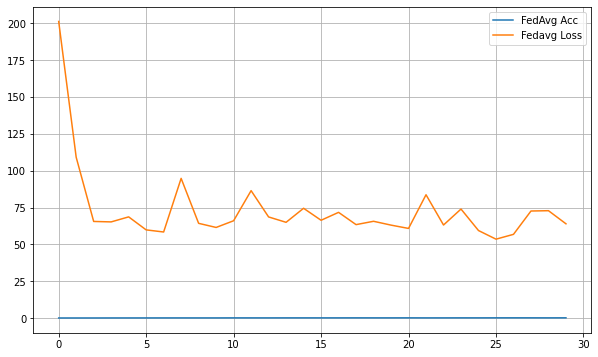

In [3]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(3):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

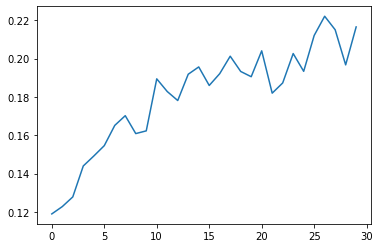

In [4]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [ ]:
print(average_acc_list,'\n') 
print(average_loss_list)

# FedSGD

In [5]:
acc0 = [[], [0.11100000143051147, 0.10040000081062317, 0.10000000149011612, 0.09700000286102295, 0.10000000149011612, 0.10000000149011612, 0.10790000110864639, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10849999636411667, 0.10000000149011612, 0.10000000149011612, 0.13770000636577606, 0.10000000149011612, 0.10000000149011612, 0.09939999878406525, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1152999997138977, 0.10000000149011612, 0.10769999772310257, 0.09969999641180038, 0.1185000017285347, 0.10000000149011612, 0.10580000281333923, 0.09210000187158585, 0.10000000149011612], [0.10000000149011612, 0.14730000495910645, 0.10639999806880951, 0.14820000529289246, 0.10000000149011612, 0.10000000149011612, 0.11129999905824661, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10899999737739563, 0.1298999935388565, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.11339999735355377, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10019999742507935, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10689999908208847, 0.12759999930858612, 0.10000000149011612, 0.10000000149011612, 0.10379999876022339, 0.10000000149011612, 0.10000000149011612, 0.10899999737739563, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.1501999944448471, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1096000000834465, 0.1581999957561493, 0.10610000044107437, 0.10100000351667404, 0.10010000318288803, 0.14959999918937683, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10199999809265137, 0.10000000149011612, 0.17180000245571136, 0.10559999942779541, 0.10000000149011612, 0.09989999979734421, 0.11909999698400497, 0.1005999967455864, 0.10339999943971634, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11460000276565552, 0.10000000149011612, 0.10010000318288803, 0.15719999372959137, 0.10639999806880951, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10209999978542328, 0.10189999639987946], [0.10000000149011612, 0.15449999272823334, 0.10599999874830246, 0.12919999659061432, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.17030000686645508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1565999984741211, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10289999842643738, 0.10000000149011612, 0.10000000149011612, 0.149399995803833], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12460000067949295, 0.11710000038146973, 0.10000000149011612, 0.10170000046491623, 0.10000000149011612, 0.13259999454021454, 0.10000000149011612, 0.10459999740123749, 0.11819999665021896, 0.10000000149011612, 0.1014999970793724, 0.13120000064373016, 0.10000000149011612, 0.10899999737739563, 0.10000000149011612, 0.18649999797344208, 0.10000000149011612, 0.1459999978542328, 0.10000000149011612, 0.10010000318288803, 0.11559999734163284, 0.13490000367164612, 0.10000000149011612, 0.10000000149011612, 0.1031000018119812, 0.11599999666213989, 0.12210000306367874], [0.10000000149011612, 0.14079999923706055, 0.10119999945163727, 0.10729999840259552, 0.09989999979734421, 0.10180000215768814, 0.10000000149011612, 0.10000000149011612, 0.13510000705718994, 0.12600000202655792, 0.10000000149011612, 0.13860000669956207, 0.10000000149011612, 0.1687999963760376, 0.10649999976158142, 0.10000000149011612, 0.10750000178813934, 0.10000000149011612, 0.10159999877214432, 0.10220000147819519, 0.10000000149011612, 0.14010000228881836, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612, 0.10490000247955322, 0.10000000149011612, 0.10000000149011612, 0.1006999984383583, 0.17479999363422394], [0.10400000214576721, 0.10000000149011612, 0.10000000149011612, 0.12939999997615814, 0.13699999451637268, 0.09730000048875809, 0.11020000278949738, 0.10000000149011612, 0.10000000149011612, 0.16750000417232513, 0.22300000488758087, 0.10000000149011612, 0.10000000149011612, 0.11020000278949738, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10639999806880951, 0.10000000149011612, 0.10000000149011612, 0.14339999854564667, 0.12160000205039978, 0.17069999873638153, 0.1712000072002411, 0.15850000083446503, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.210099995136261, 0.12380000203847885], [0.1216999962925911, 0.1599999964237213, 0.10000000149011612, 0.10000000149011612, 0.1858000010251999, 0.10010000318288803, 0.10000000149011612, 0.12759999930858612, 0.11150000244379044, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10559999942779541, 0.11749999970197678, 0.10949999839067459, 0.10000000149011612, 0.10000000149011612, 0.13840000331401825, 0.10000000149011612, 0.12240000069141388, 0.10570000112056732, 0.10000000149011612, 0.12520000338554382, 0.19300000369548798, 0.125, 0.10000000149011612, 0.10270000249147415, 0.16009999811649323, 0.13750000298023224], [0.10000000149011612, 0.08889999985694885, 0.15569999814033508, 0.10239999741315842, 0.1054999977350235, 0.13590000569820404, 0.10000000149011612, 0.1031000018119812, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19300000369548798, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10170000046491623, 0.14720000326633453, 0.10199999809265137, 0.10000000149011612, 0.10249999910593033, 0.10580000281333923, 0.1031000018119812, 0.10000000149011612, 0.16940000653266907, 0.1729000061750412, 0.10140000283718109, 0.15870000422000885, 0.10000000149011612, 0.10029999911785126, 0.16820000112056732], [0.10000000149011612, 0.10090000182390213, 0.10000000149011612, 0.10000000149011612, 0.12700000405311584, 0.13120000064373016, 0.10000000149011612, 0.1914999932050705, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16300000250339508, 0.10000000149011612, 0.10000000149011612, 0.10140000283718109, 0.10000000149011612, 0.12639999389648438, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.2029999941587448, 0.12839999794960022, 0.2321999967098236, 0.10130000114440918, 0.17870000004768372, 0.12210000306367874, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126], [0.10000000149011612, 0.10000000149011612, 0.1420000046491623, 0.10000000149011612, 0.10909999907016754, 0.10000000149011612, 0.10220000147819519, 0.11670000106096268, 0.1006999984383583, 0.17970000207424164, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16089999675750732, 0.10000000149011612, 0.11810000240802765, 0.10000000149011612, 0.1712000072002411, 0.10459999740123749, 0.22130000591278076, 0.10140000283718109, 0.18569999933242798, 0.1995999962091446, 0.10000000149011612, 0.14820000529289246, 0.10040000081062317, 0.10869999974966049, 0.10000000149011612, 0.10899999737739563, 0.10000000149011612], [0.10019999742507935, 0.10000000149011612, 0.1460999995470047, 0.20069999992847443, 0.1800999939441681, 0.1485999971628189, 0.10000000149011612, 0.14990000426769257, 0.10000000149011612, 0.10000000149011612, 0.14659999310970306, 0.10000000149011612, 0.14069999754428864, 0.155799999833107, 0.10000000149011612, 0.15800000727176666, 0.13750000298023224, 0.10239999741315842, 0.10239999741315842, 0.20160000026226044, 0.10000000149011612, 0.10040000081062317, 0.18719999492168427, 0.10000000149011612, 0.10000000149011612, 0.14259999990463257, 0.11150000244379044, 0.11810000240802765, 0.10000000149011612, 0.11729999631643295], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10890000313520432, 0.10000000149011612, 0.13600000739097595, 0.10000000149011612, 0.12870000302791595, 0.10000000149011612, 0.10000000149011612, 0.1965000033378601, 0.12409999966621399, 0.11710000038146973, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18140000104904175, 0.16990000009536743, 0.10000000149011612, 0.179299995303154, 0.13410000503063202, 0.15070000290870667, 0.10790000110864639, 0.23479999601840973, 0.19290000200271606, 0.10000000149011612, 0.16699999570846558, 0.1193000003695488, 0.17749999463558197], [0.14259999990463257, 0.14550000429153442, 0.10000000149011612, 0.1712999939918518, 0.1193000003695488, 0.10209999978542328, 0.19589999318122864, 0.1648000031709671, 0.10000000149011612, 0.1851000040769577, 0.10000000149011612, 0.10000000149011612, 0.16040000319480896, 0.13660000264644623, 0.13349999487400055, 0.20999999344348907, 0.10000000149011612, 0.1995999962091446, 0.17319999635219574, 0.10000000149011612, 0.1054999977350235, 0.10000000149011612, 0.10000000149011612, 0.15719999372959137, 0.10000000149011612, 0.10639999806880951, 0.1860000044107437, 0.1867000013589859, 0.15160000324249268, 0.13109999895095825], [0.16949999332427979, 0.2003999948501587, 0.10000000149011612, 0.10000000149011612, 0.13169999420642853, 0.10000000149011612, 0.20069999992847443, 0.11739999800920486, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16979999840259552, 0.12250000238418579, 0.1023000031709671, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10300000011920929, 0.1046999990940094, 0.10000000149011612, 0.22679999470710754, 0.19830000400543213, 0.10000000149011612, 0.15080000460147858, 0.1054999977350235, 0.19750000536441803, 0.10000000149011612, 0.16930000483989716, 0.10899999737739563], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20149999856948853, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1298999935388565, 0.10000000149011612, 0.10000000149011612, 0.1818999946117401, 0.10000000149011612, 0.10000000149011612, 0.1826000064611435, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2142000049352646, 0.10000000149011612, 0.1882999986410141, 0.1834000051021576, 0.10000000149011612, 0.10379999876022339, 0.10119999945163727, 0.10000000149011612, 0.2485000044107437], [0.11140000075101852, 0.13230000436306, 0.10000000149011612, 0.13079999387264252, 0.10000000149011612, 0.20600000023841858, 0.18549999594688416, 0.23669999837875366, 0.20630000531673431, 0.1746000051498413, 0.10000000149011612, 0.20880000293254852, 0.10000000149011612, 0.18610000610351562, 0.16769999265670776, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1420000046491623, 0.14650000631809235, 0.10980000346899033, 0.23890000581741333, 0.2628999948501587, 0.1412999927997589, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19200000166893005, 0.10000000149011612], [0.10000000149011612, 0.14190000295639038, 0.10000000149011612, 0.10000000149011612, 0.11590000241994858, 0.10999999940395355, 0.17339999973773956, 0.11559999734163284, 0.14000000059604645, 0.12060000002384186, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24210000038146973, 0.10000000149011612, 0.16930000483989716, 0.10000000149011612, 0.14820000529289246, 0.18250000476837158, 0.1518000066280365, 0.10000000149011612, 0.11249999701976776, 0.10000000149011612, 0.13860000669956207, 0.1006999984383583, 0.1485999971628189, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10999999940395355, 0.10000000149011612, 0.1378999948501587, 0.10000000149011612, 0.10000000149011612, 0.16140000522136688, 0.10000000149011612, 0.21220000088214874, 0.10000000149011612, 0.10090000182390213, 0.16750000417232513, 0.12960000336170197, 0.10000000149011612, 0.10000000149011612, 0.16369999945163727, 0.10000000149011612, 0.19449999928474426, 0.10000000149011612, 0.14970000088214874, 0.11349999904632568, 0.17919999361038208, 0.10000000149011612, 0.24089999496936798, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17569999396800995, 0.10000000149011612, 0.22139999270439148], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10689999908208847, 0.15489999949932098, 0.16779999434947968, 0.17730000615119934, 0.10689999908208847, 0.1590999960899353, 0.13989999890327454, 0.10000000149011612, 0.21709999442100525, 0.10000000149011612, 0.13189999759197235, 0.14470000565052032, 0.26919999718666077, 0.10000000149011612, 0.14190000295639038, 0.18310000002384186, 0.10000000149011612, 0.10000000149011612, 0.16529999673366547, 0.10000000149011612, 0.19519999623298645, 0.20440000295639038, 0.17180000245571136, 0.10000000149011612, 0.19859999418258667, 0.10000000149011612], [0.10000000149011612, 0.18330000340938568, 0.10000000149011612, 0.10209999978542328, 0.25, 0.22010000050067902, 0.1995999962091446, 0.15199999511241913, 0.19699999690055847, 0.12269999831914902, 0.1793999969959259, 0.10000000149011612, 0.10000000149011612, 0.17880000174045563, 0.10000000149011612, 0.211899995803833, 0.23070000112056732, 0.10000000149011612, 0.14399999380111694, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10779999941587448, 0.21220000088214874, 0.15539999306201935, 0.17560000717639923, 0.10000000149011612, 0.11599999666213989, 0.2160000056028366, 0.15919999778270721], [0.10419999808073044, 0.22210000455379486, 0.10000000149011612, 0.20029999315738678, 0.16500000655651093, 0.10000000149011612, 0.10000000149011612, 0.14749999344348907, 0.24789999425411224, 0.20550000667572021, 0.10000000149011612, 0.10000000149011612, 0.20029999315738678, 0.10000000149011612, 0.21799999475479126, 0.10000000149011612, 0.10000000149011612, 0.2054000049829483, 0.10000000149011612, 0.1559000015258789, 0.14069999754428864, 0.16449999809265137, 0.10000000149011612, 0.13819999992847443, 0.10559999942779541, 0.14419999718666077, 0.22360000014305115, 0.260699987411499, 0.21070000529289246, 0.17299999296665192], [0.12610000371932983, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22030000388622284, 0.16949999332427979, 0.1348000019788742, 0.10000000149011612, 0.10019999742507935, 0.17030000686645508, 0.20409999787807465, 0.15230000019073486, 0.10000000149011612, 0.1695999950170517, 0.15029999613761902, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24480000138282776, 0.13910000026226044, 0.13500000536441803, 0.1842000037431717, 0.10000000149011612, 0.19509999454021454, 0.10010000318288803, 0.2061000019311905], [0.10000000149011612, 0.13609999418258667, 0.22200000286102295, 0.15379999577999115, 0.20819999277591705, 0.10100000351667404, 0.21960000693798065, 0.18199999630451202, 0.17810000479221344, 0.2078000009059906, 0.14810000360012054, 0.10000000149011612, 0.19779999554157257, 0.10000000149011612, 0.10000000149011612, 0.21119999885559082, 0.12210000306367874, 0.18700000643730164, 0.1624000072479248, 0.10000000149011612, 0.12720000743865967, 0.10000000149011612, 0.13850000500679016, 0.1906999945640564, 0.10000000149011612, 0.20329999923706055, 0.10000000149011612, 0.1307000070810318, 0.19859999418258667, 0.10000000149011612], [0.1664000004529953, 0.20909999310970306, 0.1525000035762787, 0.21690000593662262, 0.14259999990463257, 0.26600000262260437, 0.13130000233650208, 0.2451000064611435, 0.10000000149011612, 0.16660000383853912, 0.15070000290870667, 0.10000000149011612, 0.15399999916553497, 0.10000000149011612, 0.20569999516010284, 0.10000000149011612, 0.21279999613761902, 0.10000000149011612, 0.10000000149011612, 0.1386999934911728, 0.10000000149011612, 0.10000000149011612, 0.10300000011920929, 0.13339999318122864, 0.10000000149011612, 0.14259999990463257, 0.16689999401569366, 0.11469999700784683, 0.10000000149011612, 0.16300000250339508], [0.17470000684261322, 0.20559999346733093, 0.10000000149011612, 0.10000000149011612, 0.13009999692440033, 0.10000000149011612, 0.27459999918937683, 0.10639999806880951, 0.271699994802475, 0.16189999878406525, 0.16249999403953552, 0.15809999406337738, 0.15569999814033508, 0.2985000014305115, 0.12430000305175781, 0.10339999943971634, 0.1371999979019165, 0.2655999958515167, 0.13699999451637268, 0.12389999628067017, 0.13249999284744263, 0.17890000343322754, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16259999573230743, 0.18770000338554382, 0.22269999980926514, 0.16769999265670776, 0.2775999903678894], [0.12880000472068787, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19709999859333038, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22179999947547913, 0.10000000149011612, 0.2777999937534332, 0.10000000149011612, 0.1867000013589859, 0.10000000149011612, 0.1867000013589859, 0.10000000149011612, 0.2029000073671341, 0.10000000149011612, 0.15569999814033508, 0.10000000149011612, 0.22519999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2273000031709671, 0.10000000149011612, 0.10000000149011612, 0.2045000046491623], [0.1738000065088272, 0.23409999907016754, 0.10000000149011612, 0.10000000149011612, 0.22609999775886536, 0.10000000149011612, 0.10000000149011612, 0.16689999401569366, 0.10000000149011612, 0.24079999327659607, 0.11550000309944153, 0.12399999797344208, 0.16580000519752502, 0.2102999985218048, 0.22579999268054962, 0.164900004863739, 0.22429999709129333, 0.16419999301433563, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13109999895095825, 0.18889999389648438, 0.10000000149011612, 0.10010000318288803, 0.13819999992847443, 0.2888999879360199, 0.10000000149011612, 0.1632000058889389, 0.10000000149011612], [0.24050000309944153, 0.10199999809265137, 0.16840000450611115, 0.1777999997138977, 0.10000000149011612, 0.24940000474452972, 0.10000000149011612, 0.20440000295639038, 0.10000000149011612, 0.15199999511241913, 0.2345000058412552, 0.10000000149011612, 0.2402999997138977, 0.16599999368190765, 0.1103999987244606, 0.13590000569820404, 0.21469999849796295, 0.18289999663829803, 0.22579999268054962, 0.10450000315904617, 0.12759999930858612, 0.23549999296665192, 0.10000000149011612, 0.1331000030040741, 0.10000000149011612, 0.1907999962568283, 0.10000000149011612, 0.24699999392032623, 0.10000000149011612, 0.10000000149011612]]
loss0 = [[], [2.3630354404449463, 2.302110433578491, 21.973371505737305, 2.3022773265838623, 2.3615336418151855, 3.3027219772338867, 2.3122708797454834, 25.530681610107422, 2.35844087600708, 2.919414520263672, 2.305219888687134, 121.37024688720703, 22.052534103393555, 2.307631492614746, 2.424623727798462, 26.918203353881836, 2.3829660415649414, 49.781681060791016, 2.3335065841674805, 4.471444606781006, 2.3201472759246826, 2.3018102645874023, 2.5407514572143555, 2.301107168197632, 2.546623945236206, 2.302225112915039, 49.3216667175293, 2.2998290061950684, 2.328603982925415, 145.61032104492188], [13.525491714477539, 2.3004584312438965, 2.3056318759918213, 2.3174679279327393, 4.50040864944458, 2.6632819175720215, 2.3102824687957764, 6.124763488769531, 2.309551954269409, 2.3170247077941895, 2.2996983528137207, 11.25289249420166, 3.7941086292266846, 24.909242630004883, 2.3023102283477783, 2.3287851810455322, 43.184207916259766, 2.303309202194214, 4.710879325866699, 2.390537977218628, 2.299257755279541, 8.45195484161377, 2.4304680824279785, 5.951855182647705, 5.44447660446167, 3.238420248031616, 2.3274641036987305, 28.37309455871582, 3.620223045349121, 2.4724137783050537], [2.31685209274292, 2.300633430480957, 5.897602558135986, 12.079660415649414, 2.3577778339385986, 2.29660701751709, 2.3753983974456787, 2.6196489334106445, 2.3034353256225586, 13.048256874084473, 2.446859836578369, 2.2878236770629883, 3.2671947479248047, 8.66478157043457, 2.3003227710723877, 2.8453173637390137, 40.2529182434082, 2.297605276107788, 2.300407648086548, 2.3214051723480225, 13.848804473876953, 2.322824001312256, 11.412900924682617, 2.29860520362854, 2.3456623554229736, 2.3088204860687256, 2.2913482189178467, 2.3010411262512207, 3.006269931793213, 19.996440887451172], [3.9263792037963867, 9.61544132232666, 2.332703113555908, 2.6529078483581543, 2.3208370208740234, 2.3016250133514404, 2.320220470428467, 2.347487211227417, 2.26850962638855, 2.3015553951263428, 2.2901594638824463, 2.5327675342559814, 3.0191144943237305, 2.350644111633301, 2.3878064155578613, 2.3531792163848877, 2.9615657329559326, 2.467557907104492, 2.9562392234802246, 24.191329956054688, 2.276085138320923, 2.365173101425171, 2.2949981689453125, 2.330425977706909, 2.307041645050049, 68.5464096069336, 19.4172420501709, 3.9440524578094482, 2.34005069732666, 2.311910629272461], [2.4879205226898193, 2.2809534072875977, 2.291172981262207, 2.337308645248413, 6.008388519287109, 5.2826385498046875, 2.3153789043426514, 5.937321186065674, 2.315187692642212, 18.61675262451172, 30.798831939697266, 27.487009048461914, 2.3049376010894775, 34.13174819946289, 2.285069465637207, 15.727497100830078, 2.7331013679504395, 28.81796646118164, 6.496617794036865, 14.83278751373291, 3.969048023223877, 28.0850772857666, 2.316394805908203, 6.03770112991333, 18.432348251342773, 2.3213086128234863, 2.665670156478882, 33.102176666259766, 2.4993736743927, 2.2459349632263184], [2.5295495986938477, 2.3020877838134766, 20.066816329956055, 2.2945315837860107, 2.3389718532562256, 2.2965710163116455, 2.4203836917877197, 21.186861038208008, 2.2843477725982666, 2.2990269660949707, 2.346978187561035, 2.3969132900238037, 65.98975372314453, 2.353271961212158, 2.4093899726867676, 6.451504230499268, 2.28200364112854, 2.824523448944092, 2.29693865776062, 11.066312789916992, 2.260734796524048, 2.3748717308044434, 2.3182485103607178, 2.2850797176361084, 2.2808327674865723, 19.414936065673828, 2.3852508068084717, 2.329130172729492, 2.2800190448760986, 2.2974886894226074], [25.812423706054688, 2.3122315406799316, 2.3101608753204346, 2.4397799968719482, 2.7609055042266846, 2.5800254344940186, 17.607301712036133, 53.78378677368164, 2.2912790775299072, 2.2901508808135986, 17.209827423095703, 2.245461940765381, 2.3649652004241943, 2.2518930435180664, 2.4959840774536133, 34.78179931640625, 2.2720348834991455, 16.82789421081543, 2.3253772258758545, 2.334291696548462, 12.007875442504883, 2.272364854812622, 2.3504278659820557, 2.589568853378296, 2.2942676544189453, 2.2930171489715576, 21.932214736938477, 11.878059387207031, 2.3403477668762207, 2.300464391708374], [2.283745288848877, 13.336536407470703, 2.298081159591675, 2.259908437728882, 2.3543660640716553, 2.9229979515075684, 2.446375846862793, 17.952547073364258, 22.56645393371582, 2.578894853591919, 2.230509042739868, 2.3881962299346924, 6.738352298736572, 2.35158634185791, 14.689834594726562, 46.43854904174805, 13.074640274047852, 2.625347137451172, 3.142523765563965, 2.508713960647583, 2.247757911682129, 2.282823324203491, 2.2237184047698975, 2.355816602706909, 2.2685422897338867, 21.700048446655273, 74.70812225341797, 10.183758735656738, 2.2054216861724854, 2.2715401649475098], [2.2438974380493164, 2.2755250930786133, 7.262394428253174, 36.007869720458984, 2.2114245891571045, 2.350710153579712, 2.8975279331207275, 2.3351476192474365, 2.3447299003601074, 20.35812759399414, 7.589979648590088, 105.25786590576172, 7.913992881774902, 2.42669939994812, 3.1218390464782715, 2.3346986770629883, 62.08017349243164, 24.32228660583496, 2.256765842437744, 7.273027420043945, 2.7852165699005127, 2.5591561794281006, 2.6397149562835693, 2.279306173324585, 2.240945816040039, 2.8741703033447266, 22.805158615112305, 2.909816265106201, 2.2505483627319336, 2.2572178840637207], [15.025786399841309, 2.33197283744812, 2.2566587924957275, 2.4346814155578613, 2.276944398880005, 2.277982711791992, 58.97629928588867, 2.3080520629882812, 17.348024368286133, 15.832695007324219, 47.74852752685547, 2.254749298095703, 2.293564558029175, 84.00848388671875, 82.85358428955078, 2.2817890644073486, 2.253446340560913, 2.297329902648926, 13.086492538452148, 2.270724296569824, 2.23126220703125, 2.291292667388916, 32.64327621459961, 2.272019624710083, 2.2567660808563232, 2.3070228099823, 2.24702787399292, 35.74148178100586, 2.2707741260528564, 2.2781829833984375], [4.251291275024414, 2.434213876724243, 11.631399154663086, 50.941673278808594, 2.302096366882324, 2.2643556594848633, 67.16585540771484, 2.262540340423584, 2.4640190601348877, 4.269189357757568, 2.94881010055542, 2.2789149284362793, 24.570446014404297, 2.5384743213653564, 2.539041042327881, 23.271039962768555, 2.299325942993164, 5.293140411376953, 2.4406511783599854, 2.436976432800293, 2.1898531913757324, 2.2638022899627686, 2.2538602352142334, 2.36537766456604, 2.2524077892303467, 2.320651054382324, 2.475809335708618, 10.955791473388672, 5.2115044593811035, 2.5842480659484863], [10.15111255645752, 32.31304931640625, 2.255678415298462, 24.813291549682617, 2.3185486793518066, 21.36554718017578, 2.3592495918273926, 2.242502212524414, 2.9956319332122803, 2.2863993644714355, 2.456544876098633, 8.13966178894043, 32.01154708862305, 2.216533660888672, 20.85655403137207, 2.2889366149902344, 22.2036190032959, 2.317478656768799, 2.357076644897461, 2.2494571208953857, 2.24890398979187, 2.2522222995758057, 2.213463306427002, 8.446925163269043, 2.3645501136779785, 2.8937606811523438, 2.5427942276000977, 36.95433044433594, 2.515713930130005, 53.03929901123047], [3.245230197906494, 3.460693836212158, 2.5452065467834473, 2.185774564743042, 2.1808018684387207, 2.3245184421539307, 13.512325286865234, 2.3245973587036133, 25.11995506286621, 48.01581954956055, 2.5631847381591797, 2.833108425140381, 2.2721993923187256, 2.4123945236206055, 40.9765510559082, 2.3156185150146484, 2.2610044479370117, 3.7725467681884766, 3.076453924179077, 2.180968761444092, 2.4823155403137207, 2.6477725505828857, 2.2180190086364746, 21.6402587890625, 113.6478271484375, 2.251756429672241, 2.6051321029663086, 2.3592779636383057, 20.793737411499023, 2.248124122619629], [26.385255813598633, 11.595967292785645, 23.4608097076416, 102.8585433959961, 2.252772569656372, 46.24842834472656, 2.420696258544922, 117.28485870361328, 2.7981014251708984, 24.652307510375977, 23.59310531616211, 2.224151372909546, 2.3104350566864014, 2.8380603790283203, 67.4867935180664, 19.70890998840332, 67.21658325195312, 2.662640333175659, 2.4538612365722656, 53.27214431762695, 2.197901725769043, 2.924211025238037, 2.2221627235412598, 2.5507025718688965, 2.132397174835205, 2.2042298316955566, 19.88980484008789, 2.2326266765594482, 2.3224477767944336, 2.305676221847534], [2.2420992851257324, 2.304959774017334, 18.871917724609375, 2.2273144721984863, 2.31176495552063, 2.620046615600586, 2.175499439239502, 2.2589731216430664, 21.30594253540039, 2.2451350688934326, 63.07455062866211, 15.064411163330078, 2.2707912921905518, 2.240866184234619, 2.7379512786865234, 2.1752707958221436, 14.85534954071045, 2.209120035171509, 2.248866319656372, 5.438672065734863, 2.471956729888916, 15.145390510559082, 16.0942440032959, 2.2780098915100098, 20.21145248413086, 2.840075731277466, 2.2690651416778564, 2.2052652835845947, 2.2439584732055664, 2.916658878326416], [2.227926254272461, 2.2199506759643555, 10.16230583190918, 8.867379188537598, 2.367363214492798, 8.419133186340332, 2.162348508834839, 2.3256540298461914, 39.41795349121094, 9.788578987121582, 45.37096405029297, 2.169795036315918, 2.239208698272705, 2.230750799179077, 8.646034240722656, 70.6299057006836, 27.649885177612305, 2.5187675952911377, 2.595022439956665, 3.357056140899658, 43.48756408691406, 2.1847076416015625, 2.197521448135376, 10.729560852050781, 3.145948886871338, 3.5733351707458496, 2.144090414047241, 61.76649475097656, 2.383173942565918, 2.529449462890625], [44.51948165893555, 3.582036256790161, 5.518282413482666, 19.62472152709961, 6.287925720214844, 28.657817840576172, 2.3400988578796387, 6.217682838439941, 86.33049011230469, 18.669376373291016, 2.3925700187683105, 6.626387596130371, 4.293468475341797, 2.2782211303710938, 20.327226638793945, 44.14910125732422, 2.1801140308380127, 16.75121307373047, 6.459905624389648, 3.407733917236328, 7.930549144744873, 2.154872417449951, 5.315175533294678, 2.198246955871582, 2.156586170196533, 44.85222244262695, 4.104851722717285, 2.7346136569976807, 71.30601501464844, 2.054337739944458], [2.637646436691284, 2.252033233642578, 34.18301773071289, 3.014341115951538, 8.045095443725586, 2.163511276245117, 2.3226675987243652, 2.1358044147491455, 2.095402956008911, 2.2165610790252686, 11.273569107055664, 2.161456346511841, 22.195064544677734, 2.4641411304473877, 2.2833034992218018, 31.1466121673584, 31.28315544128418, 36.85139465332031, 2.40036678314209, 2.263850212097168, 2.8447680473327637, 2.0558338165283203, 2.1768624782562256, 2.3394856452941895, 60.22177505493164, 84.23387145996094, 6.357783794403076, 52.69099426269531, 2.165571928024292, 9.027311325073242], [25.1230411529541, 2.293058395385742, 27.147212982177734, 25.135101318359375, 3.4231457710266113, 3.8919637203216553, 2.333165168762207, 2.662616729736328, 2.3013317584991455, 3.0314295291900635, 32.507118225097656, 43.72984313964844, 7.37788200378418, 2.0746912956237793, 22.316699981689453, 2.181164026260376, 9.458856582641602, 2.669419050216675, 2.1867730617523193, 2.3296282291412354, 3.710503101348877, 2.8538169860839844, 21.712059020996094, 3.0841360092163086, 2.5467255115509033, 2.4063563346862793, 72.78365325927734, 9.979815483093262, 22.208585739135742, 58.539180755615234], [2.8346025943756104, 67.93768310546875, 2.333310842514038, 15.16154956817627, 37.97914123535156, 2.1393237113952637, 4.531487941741943, 2.1197495460510254, 7.288415431976318, 2.378492593765259, 2.2002084255218506, 3.6932008266448975, 75.66471099853516, 37.2268180847168, 3.3089711666107178, 4.395745754241943, 2.1676182746887207, 9.883901596069336, 2.2439796924591064, 2.7004833221435547, 2.4037551879882812, 90.1103744506836, 2.1493148803710938, 58.043312072753906, 33.07282257080078, 75.14928436279297, 35.26996612548828, 2.392453193664551, 21.203760147094727, 2.1839799880981445], [11.775477409362793, 125.36228942871094, 86.04647827148438, 32.135738372802734, 3.4435553550720215, 2.2392590045928955, 2.240936040878296, 2.1903076171875, 2.4279677867889404, 2.2316322326660156, 2.262906551361084, 37.08755111694336, 2.1226112842559814, 55.840545654296875, 2.3957371711730957, 2.260847568511963, 1.990881085395813, 85.50699615478516, 2.24226450920105, 2.2801127433776855, 3.272684097290039, 61.16965103149414, 2.4090170860290527, 23.004058837890625, 2.564652919769287, 2.198134422302246, 2.1656455993652344, 32.813987731933594, 2.190845251083374, 23.638208389282227], [91.44471740722656, 2.4205946922302246, 89.09642791748047, 3.4784624576568604, 2.0741500854492188, 2.1322028636932373, 2.19871187210083, 2.2910492420196533, 2.5589869022369385, 2.398451089859009, 2.127650499343872, 123.96056365966797, 21.851335525512695, 2.2509074211120605, 40.26873016357422, 2.0645177364349365, 2.1019721031188965, 162.9673309326172, 3.1423020362854004, 23.017921447753906, 4.176140785217285, 21.052303314208984, 2.9717233180999756, 2.1775989532470703, 2.4486629962921143, 2.281876802444458, 28.198856353759766, 3.4227941036224365, 2.2169721126556396, 2.195488214492798], [3.2247087955474854, 2.1996195316314697, 44.09124755859375, 2.224179983139038, 2.2540082931518555, 29.642850875854492, 99.19947814941406, 2.465334892272949, 2.3262782096862793, 2.1582682132720947, 6.482586860656738, 57.356842041015625, 2.2839229106903076, 14.965656280517578, 2.162606954574585, 26.439369201660156, 43.974815368652344, 2.0721051692962646, 52.79668045043945, 2.3788750171661377, 2.1677911281585693, 2.154824733734131, 52.62865447998047, 2.6485161781311035, 3.989840507507324, 2.3574717044830322, 2.101069450378418, 2.0849313735961914, 2.1984288692474365, 2.97177791595459], [2.757870674133301, 20.579662322998047, 24.95295524597168, 67.80352783203125, 62.16144943237305, 42.96467208862305, 2.1264126300811768, 2.4896774291992188, 2.857426881790161, 23.360763549804688, 5.178040027618408, 2.2145586013793945, 2.6303629875183105, 2.5458250045776367, 9.973735809326172, 2.4811015129089355, 2.4692394733428955, 95.90868377685547, 33.94233703613281, 22.876344680786133, 26.639616012573242, 45.25273132324219, 2.3472061157226562, 2.5849764347076416, 2.666257381439209, 2.344313383102417, 4.574321269989014, 2.2874789237976074, 4.213754177093506, 2.3301169872283936], [43.893516540527344, 2.5822510719299316, 2.103928804397583, 2.363518238067627, 2.1303324699401855, 4.45261812210083, 2.118403911590576, 2.161182403564453, 2.7902002334594727, 2.0873231887817383, 2.3128442764282227, 21.396825790405273, 2.5521771907806396, 73.12422180175781, 46.80237579345703, 2.109973192214966, 2.357243061065674, 2.24969482421875, 2.143972158432007, 16.4658203125, 2.3504421710968018, 19.428363800048828, 2.306687355041504, 2.194707155227661, 50.1939811706543, 2.19543719291687, 7.811459541320801, 2.7428035736083984, 2.195221185684204, 75.14881896972656], [3.1810059547424316, 2.1982309818267822, 2.433147430419922, 2.2911970615386963, 2.5066375732421875, 2.0936598777770996, 2.710134983062744, 2.182372570037842, 8.410387992858887, 2.6016275882720947, 2.727137804031372, 37.860984802246094, 2.980043649673462, 57.74497985839844, 2.162686586380005, 15.301867485046387, 2.194457769393921, 31.347021102905273, 50.50022888183594, 4.109247207641602, 26.208168029785156, 58.35430145263672, 5.334850788116455, 2.4248526096343994, 62.09059524536133, 2.353616237640381, 4.091370105743408, 2.728945016860962, 27.30858039855957, 2.55861759185791], [2.3582024574279785, 2.0924227237701416, 115.92005920410156, 12.984347343444824, 2.939584970474243, 26.347896575927734, 2.029193639755249, 3.7034828662872314, 1.976112723350525, 2.6375746726989746, 2.8794443607330322, 2.326077461242676, 2.150846004486084, 2.0261051654815674, 4.247610092163086, 4.354477882385254, 2.5434577465057373, 2.075040578842163, 2.7445132732391357, 2.700244426727295, 4.03449010848999, 2.8104300498962402, 4.232507705688477, 71.81299591064453, 73.27249908447266, 3.5171515941619873, 2.156587600708008, 2.155444383621216, 2.418839454650879, 2.0546700954437256], [3.0467116832733154, 36.129695892333984, 119.40992736816406, 17.71915054321289, 46.79318618774414, 40.71445846557617, 2.5437703132629395, 19.778316497802734, 77.42501831054688, 74.39256286621094, 2.1201586723327637, 27.605371475219727, 2.00416898727417, 70.7899169921875, 2.209477424621582, 76.29986572265625, 2.388399124145508, 22.555919647216797, 2.2695655822753906, 16.98736000061035, 2.2303390502929688, 47.273475646972656, 2.1441385746002197, 91.78388214111328, 34.04825210571289, 45.005306243896484, 2.5991125106811523, 18.750213623046875, 112.67864990234375, 2.183476448059082], [2.3778042793273926, 2.151745557785034, 43.771121978759766, 19.28534698486328, 2.124220132827759, 27.43025016784668, 23.028047561645508, 2.6587977409362793, 19.881784439086914, 2.107534170150757, 3.2661373615264893, 3.1080100536346436, 2.719858407974243, 2.1665000915527344, 2.1532576084136963, 2.628474712371826, 2.2614524364471436, 2.4331071376800537, 59.2333984375, 14.848040580749512, 63.6349983215332, 2.9896345138549805, 2.394186019897461, 68.32117462158203, 5.565564155578613, 3.7825608253479004, 1.992679238319397, 65.03241729736328, 2.213271379470825, 20.192747116088867], [2.064236640930176, 4.399309158325195, 2.920877456665039, 2.5523900985717773, 17.01534652709961, 2.0416111946105957, 37.579341888427734, 2.2528398036956787, 40.71896743774414, 2.4956252574920654, 2.089127779006958, 43.68207550048828, 2.101890802383423, 2.230877637863159, 2.8705787658691406, 2.604173183441162, 2.1371302604675293, 2.2845475673675537, 2.1330082416534424, 2.6071839332580566, 5.049278259277344, 2.1482419967651367, 17.855234146118164, 2.681427240371704, 27.159284591674805, 2.4498538970947266, 44.40822982788086, 2.1153597831726074, 21.965774536132812, 126.49079895019531]] 

acc1 = [[], [0.1046999990940094, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14030000567436218, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10499999672174454, 0.10300000011920929, 0.10140000283718109, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13179999589920044, 0.10610000044107437, 0.10000000149011612, 0.10000000149011612, 0.1014999970793724, 0.10559999942779541, 0.10000000149011612, 0.15649999678134918, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803], [0.11029999703168869, 0.14730000495910645, 0.10000000149011612, 0.14259999990463257, 0.10000000149011612, 0.11060000211000443, 0.10000000149011612, 0.10000000149011612, 0.10170000046491623, 0.10849999636411667, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10100000351667404, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1014999970793724, 0.10000000149011612, 0.1006999984383583, 0.10000000149011612, 0.10209999978542328, 0.10000000149011612, 0.10400000214576721, 0.10159999877214432, 0.10000000149011612, 0.10270000249147415, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0997999981045723, 0.12530000507831573, 0.10000000149011612, 0.1177000030875206, 0.10189999639987946, 0.11029999703168869, 0.11810000240802765, 0.10000000149011612, 0.10899999737739563, 0.10000000149011612, 0.12250000238418579, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14300000667572021, 0.10339999943971634, 0.11069999635219574, 0.10000000149011612, 0.10000000149011612, 0.148499995470047], [0.10000000149011612, 0.1597999930381775, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.13040000200271606, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.15839999914169312, 0.09960000216960907, 0.13120000064373016, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10209999978542328, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12839999794960022, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612], [0.18000000715255737, 0.10000000149011612, 0.15119999647140503, 0.10750000178813934, 0.10679999738931656, 0.16949999332427979, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11240000277757645, 0.10000000149011612, 0.10000000149011612, 0.1378999948501587, 0.10010000318288803, 0.10130000114440918, 0.10000000149011612, 0.10689999908208847, 0.10000000149011612, 0.12120000272989273, 0.15600000321865082, 0.11729999631643295, 0.10000000149011612, 0.12330000102519989, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11230000108480453, 0.10000000149011612, 0.15620000660419464, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10490000247955322, 0.10000000149011612, 0.10000000149011612, 0.10119999945163727, 0.13930000364780426, 0.11389999836683273, 0.18569999933242798, 0.14139999449253082, 0.10000000149011612, 0.11330000311136246, 0.1468999981880188, 0.10000000149011612, 0.1695999950170517, 0.10000000149011612], [0.11420000344514847, 0.13660000264644623, 0.12219999730587006, 0.10000000149011612, 0.11540000140666962, 0.13120000064373016, 0.10509999841451645, 0.10000000149011612, 0.10000000149011612, 0.12380000203847885, 0.10019999742507935, 0.1307000070810318, 0.10350000113248825, 0.10000000149011612, 0.10000000149011612, 0.12720000743865967, 0.10000000149011612, 0.10000000149011612, 0.14810000360012054, 0.10000000149011612, 0.18029999732971191, 0.10400000214576721, 0.10170000046491623, 0.10000000149011612, 0.15060000121593475, 0.10000000149011612, 0.10719999670982361, 0.10000000149011612, 0.17080000042915344, 0.12039999663829803], [0.11630000174045563, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10750000178813934, 0.12070000171661377, 0.10000000149011612, 0.10119999945163727, 0.15539999306201935, 0.10369999706745148, 0.12380000203847885, 0.10000000149011612, 0.12610000371932983, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10499999672174454, 0.15950000286102295, 0.10939999669790268, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14090000092983246, 0.10000000149011612, 0.11640000343322754, 0.12070000171661377], [0.15440000593662262, 0.11309999972581863, 0.10000000149011612, 0.1274999976158142, 0.15150000154972076, 0.12129999697208405, 0.10000000149011612, 0.19020000100135803, 0.12210000306367874, 0.10000000149011612, 0.12919999659061432, 0.14480000734329224, 0.10000000149011612, 0.11969999969005585, 0.19300000369548798, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11729999631643295, 0.10000000149011612, 0.10010000318288803, 0.11060000211000443, 0.10000000149011612, 0.10580000281333923, 0.14300000667572021, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.14569999277591705, 0.10000000149011612, 0.13910000026226044, 0.1850000023841858, 0.18400000035762787, 0.1404999941587448, 0.15379999577999115, 0.10000000149011612, 0.13650000095367432, 0.10000000149011612, 0.14149999618530273, 0.10000000149011612, 0.21870000660419464, 0.10000000149011612, 0.10000000149011612, 0.13289999961853027, 0.10000000149011612, 0.10019999742507935, 0.1800999939441681, 0.11079999804496765, 0.13279999792575836, 0.17649999260902405, 0.16899999976158142, 0.10000000149011612, 0.1623000055551529, 0.14470000565052032, 0.10000000149011612, 0.15569999814033508], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20990000665187836, 0.18610000610351562, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1712999939918518, 0.10000000149011612, 0.10000000149011612, 0.18119999766349792, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10700000077486038, 0.10000000149011612, 0.16040000319480896, 0.19429999589920044, 0.15940000116825104, 0.19020000100135803, 0.14720000326633453, 0.10000000149011612, 0.13609999418258667, 0.1388999968767166], [0.1995999962091446, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1687999963760376, 0.10000000149011612, 0.10000000149011612, 0.21490000188350677, 0.10000000149011612, 0.13809999823570251, 0.10119999945163727, 0.10000000149011612, 0.164000004529953, 0.1868000030517578, 0.18160000443458557, 0.15620000660419464, 0.10000000149011612, 0.10000000149011612, 0.1412999927997589, 0.14740000665187836, 0.12729999423027039, 0.10000000149011612, 0.10000000149011612, 0.16369999945163727, 0.10000000149011612, 0.11400000005960464, 0.10000000149011612, 0.10000000149011612, 0.1331000030040741], [0.19089999794960022, 0.13910000026226044, 0.10000000149011612, 0.1979999989271164, 0.10000000149011612, 0.11919999867677689, 0.10000000149011612, 0.11320000141859055, 0.16519999504089355, 0.10010000318288803, 0.1387999951839447, 0.10000000149011612, 0.10000000149011612, 0.16279999911785126, 0.17800000309944153, 0.10909999907016754, 0.10000000149011612, 0.12720000743865967, 0.1445000022649765, 0.10000000149011612, 0.2062000036239624, 0.1607999950647354, 0.16940000653266907, 0.1348000019788742, 0.10930000245571136, 0.10000000149011612, 0.10000000149011612, 0.19470000267028809, 0.11810000240802765, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.1931000053882599, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2280000001192093, 0.10000000149011612, 0.10429999977350235, 0.10000000149011612, 0.17069999873638153, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20900000631809235, 0.24079999327659607, 0.10000000149011612, 0.21809999644756317, 0.19419999420642853, 0.10000000149011612, 0.10000000149011612, 0.15729999542236328, 0.12060000002384186, 0.10000000149011612, 0.2020999938249588, 0.15610000491142273, 0.25209999084472656, 0.10000000149011612, 0.1680999994277954, 0.19290000200271606], [0.1696999967098236, 0.19609999656677246, 0.10040000081062317, 0.24220000207424164, 0.1851000040769577, 0.10000000149011612, 0.18150000274181366, 0.13500000536441803, 0.1193000003695488, 0.2037000060081482, 0.10000000149011612, 0.20180000364780426, 0.10000000149011612, 0.20059999823570251, 0.25209999084472656, 0.22110000252723694, 0.10000000149011612, 0.18700000643730164, 0.11959999799728394, 0.10000000149011612, 0.10000000149011612, 0.14630000293254852, 0.10000000149011612, 0.13519999384880066, 0.12790000438690186, 0.17270000278949738, 0.10000000149011612, 0.10109999775886536, 0.10000000149011612, 0.19220000505447388], [0.2703999876976013, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1525000035762787, 0.12020000070333481, 0.10000000149011612, 0.15549999475479126, 0.18369999527931213, 0.18050000071525574, 0.10000000149011612, 0.21850000321865082, 0.1762000024318695, 0.10000000149011612, 0.22660000622272491, 0.1582999974489212, 0.10000000149011612, 0.10000000149011612, 0.15530000627040863, 0.10000000149011612, 0.11140000075101852, 0.13899999856948853, 0.10000000149011612, 0.1657000035047531, 0.18199999630451202, 0.10779999941587448, 0.14749999344348907, 0.19130000472068787, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.12690000236034393, 0.10000000149011612, 0.13429999351501465, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1467999964952469, 0.13220000267028809, 0.23270000517368317, 0.21199999749660492, 0.10000000149011612, 0.11460000276565552, 0.10000000149011612, 0.1615000069141388, 0.16529999673366547, 0.1590999960899353, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16459999978542328, 0.1460999995470047, 0.20110000669956207, 0.24869999289512634, 0.2037999927997589, 0.14139999449253082, 0.13030000030994415, 0.10000000149011612, 0.14589999616146088], [0.10909999907016754, 0.18719999492168427, 0.12070000171661377, 0.1468999981880188, 0.17299999296665192, 0.19619999825954437, 0.18809999525547028, 0.23680000007152557, 0.10000000149011612, 0.22550000250339508, 0.10000000149011612, 0.10000000149011612, 0.20180000364780426, 0.10000000149011612, 0.1996999979019165, 0.10000000149011612, 0.10509999841451645, 0.1956000030040741, 0.22949999570846558, 0.23389999568462372, 0.15809999406337738, 0.1898999959230423, 0.1915999948978424, 0.10000000149011612, 0.1542000025510788, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17190000414848328, 0.19429999589920044], [0.13940000534057617, 0.14569999277591705, 0.2079000025987625, 0.19429999589920044, 0.21879999339580536, 0.17080000042915344, 0.10000000149011612, 0.16529999673366547, 0.19689999520778656, 0.18529999256134033, 0.10000000149011612, 0.10000000149011612, 0.21960000693798065, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16410000622272491, 0.10029999911785126, 0.10000000149011612, 0.26600000262260437, 0.12630000710487366, 0.2061000019311905, 0.1080000028014183, 0.1193000003695488, 0.12039999663829803, 0.10109999775886536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14589999616146088], [0.23810000717639923, 0.10000000149011612, 0.10000000149011612, 0.10220000147819519, 0.10000000149011612, 0.25380000472068787, 0.22949999570846558, 0.23759999871253967, 0.19269999861717224, 0.15700000524520874, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19089999794960022, 0.10000000149011612, 0.10000000149011612, 0.2838999927043915, 0.22920000553131104, 0.10000000149011612, 0.10000000149011612, 0.193900004029274, 0.21439999341964722, 0.10000000149011612, 0.2752000093460083, 0.13379999995231628, 0.22609999775886536, 0.21199999749660492, 0.23240000009536743, 0.10000000149011612, 0.1891999989748001], [0.27090001106262207, 0.10000000149011612, 0.23999999463558197, 0.2053000032901764, 0.2176000028848648, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16279999911785126, 0.12449999898672104, 0.21310000121593475, 0.2922999858856201, 0.10000000149011612, 0.19920000433921814, 0.2290000021457672, 0.10000000149011612, 0.18490000069141388, 0.24130000174045563, 0.1347000002861023, 0.10000000149011612, 0.10000000149011612, 0.1356000006198883, 0.10000000149011612, 0.15320000052452087, 0.10000000149011612, 0.2223999947309494, 0.18469999730587006, 0.10000000149011612, 0.1509999930858612], [0.1923999935388565, 0.19169999659061432, 0.21930000185966492, 0.1670999974012375, 0.22830000519752502, 0.10000000149011612, 0.18459999561309814, 0.18299999833106995, 0.23469999432563782, 0.24539999663829803, 0.10000000149011612, 0.1940000057220459, 0.10000000149011612, 0.24279999732971191, 0.1972000002861023, 0.24250000715255737, 0.2102999985218048, 0.10000000149011612, 0.20489999651908875, 0.10000000149011612, 0.10000000149011612, 0.1598999947309494, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2304999977350235, 0.10000000149011612], [0.1956000030040741, 0.17900000512599945, 0.10000000149011612, 0.10000000149011612, 0.14749999344348907, 0.1987999975681305, 0.10000000149011612, 0.15919999778270721, 0.1023000031709671, 0.2020999938249588, 0.2354000061750412, 0.10000000149011612, 0.10119999945163727, 0.18140000104904175, 0.22609999775886536, 0.16439999639987946, 0.10000000149011612, 0.17159999907016754, 0.10000000149011612, 0.10000000149011612, 0.21379999816417694, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17350000143051147, 0.20839999616146088, 0.10000000149011612, 0.16769999265670776, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.18700000643730164, 0.10000000149011612, 0.20550000667572021, 0.24150000512599945, 0.20509999990463257, 0.2612000107765198, 0.20960000157356262, 0.2524000108242035, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2538999915122986, 0.16830000281333923, 0.10000000149011612, 0.1956000030040741, 0.29589998722076416, 0.10000000149011612, 0.25440001487731934, 0.29190000891685486, 0.10000000149011612, 0.164900004863739, 0.10000000149011612, 0.10000000149011612, 0.17419999837875366, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23109999299049377], [0.10000000149011612, 0.1340000033378601, 0.10000000149011612, 0.16140000522136688, 0.21770000457763672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2085999995470047, 0.17759999632835388, 0.18039999902248383, 0.1808999925851822, 0.10000000149011612, 0.2303999960422516, 0.10000000149011612, 0.19300000369548798, 0.27489998936653137, 0.10000000149011612, 0.16699999570846558, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1793999969959259, 0.23100000619888306, 0.24819999933242798, 0.10000000149011612, 0.10000000149011612, 0.1858000010251999, 0.25119999051094055], [0.164000004529953, 0.18639999628067017, 0.17090000212192535, 0.1460999995470047, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.23749999701976776, 0.10000000149011612, 0.155799999833107, 0.10000000149011612, 0.23589999973773956, 0.2531999945640564, 0.10000000149011612, 0.2248000055551529, 0.10180000215768814, 0.1981000006198883, 0.10000000149011612, 0.10000000149011612, 0.16329999268054962, 0.20909999310970306, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16089999675750732, 0.10000000149011612, 0.10000000149011612, 0.14959999918937683, 0.18880000710487366], [0.19979999959468842, 0.10000000149011612, 0.10000000149011612, 0.21469999849796295, 0.2939000129699707, 0.10000000149011612, 0.2720000147819519, 0.1525000035762787, 0.10000000149011612, 0.1835000067949295, 0.19830000400543213, 0.24500000476837158, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2685999870300293, 0.28200000524520874, 0.2069000005722046, 0.20440000295639038, 0.10000000149011612, 0.19949999451637268, 0.24420000612735748, 0.10000000149011612, 0.10000000149011612, 0.21359999477863312, 0.20020000636577606, 0.20250000059604645, 0.10000000149011612, 0.10000000149011612, 0.188400000333786], [0.10000000149011612, 0.1467999964952469, 0.10000000149011612, 0.1940000057220459, 0.1526000052690506, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24549999833106995, 0.10000000149011612, 0.10000000149011612, 0.227400004863739, 0.19460000097751617, 0.10000000149011612, 0.10000000149011612, 0.155799999833107, 0.10000000149011612, 0.1882999986410141, 0.1657000035047531, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25369998812675476, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16449999809265137, 0.17980000376701355], [0.179299995303154, 0.11599999666213989, 0.2451000064611435, 0.2257000058889389, 0.10000000149011612, 0.10000000149011612, 0.21729999780654907, 0.10000000149011612, 0.2669999897480011, 0.13179999589920044, 0.18709999322891235, 0.24169999361038208, 0.10000000149011612, 0.1745000034570694, 0.10000000149011612, 0.10000000149011612, 0.1615000069141388, 0.18310000002384186, 0.1598999947309494, 0.2053000032901764, 0.16339999437332153, 0.133200004696846, 0.23469999432563782, 0.16339999437332153, 0.10000000149011612, 0.20970000326633453, 0.28690001368522644, 0.10100000351667404, 0.10000000149011612, 0.18770000338554382], [0.2484000027179718, 0.19689999520778656, 0.18559999763965607, 0.10000000149011612, 0.10000000149011612, 0.22789999842643738, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24619999527931213, 0.10000000149011612, 0.23739999532699585, 0.20229999721050262, 0.10000000149011612, 0.27309998869895935, 0.10000000149011612, 0.10170000046491623, 0.2223999947309494, 0.14329999685287476, 0.10000000149011612, 0.10000000149011612, 0.18700000643730164, 0.10000000149011612, 0.25540000200271606, 0.10000000149011612, 0.10000000149011612, 0.27489998936653137, 0.10000000149011612, 0.13770000636577606, 0.2825999855995178]]
loss1 = [[], [2.319133758544922, 3.2680420875549316, 55.829036712646484, 2.5117571353912354, 13.671699523925781, 2.3147339820861816, 2.359262228012085, 2.3116049766540527, 4.95772123336792, 62.416080474853516, 38.272911071777344, 60.45539855957031, 2.6365668773651123, 2.3003385066986084, 2.3041975498199463, 2.345639705657959, 35.65019226074219, 84.28357696533203, 29.90435218811035, 2.300368070602417, 2.29386043548584, 2.370620012283325, 38.94159698486328, 2.3090949058532715, 2.3919296264648438, 2.3157362937927246, 2.2905938625335693, 7.1316728591918945, 83.63471984863281, 2.3020517826080322], [2.3001911640167236, 2.2873454093933105, 2.595259666442871, 2.348332643508911, 2.987009286880493, 2.319892168045044, 3.4404995441436768, 2.666060209274292, 2.3365941047668457, 2.362774610519409, 2.312304973602295, 2.671515703201294, 19.419530868530273, 2.2850308418273926, 21.692991256713867, 3.0646989345550537, 14.402933120727539, 30.763080596923828, 2.796651840209961, 2.293938398361206, 2.3448262214660645, 2.301246166229248, 2.3711256980895996, 2.3521556854248047, 31.36834144592285, 3.014387607574463, 2.4407670497894287, 10.00096321105957, 2.3324756622314453, 3.1791207790374756], [7.4183125495910645, 7.7184648513793945, 36.47880935668945, 13.249250411987305, 2.3354804515838623, 2.750476360321045, 13.398406028747559, 17.009157180786133, 9.527502059936523, 5.871267795562744, 2.318023204803467, 2.289940118789673, 9.247682571411133, 2.327425003051758, 2.2946536540985107, 2.35577392578125, 2.28306245803833, 7.822378158569336, 2.4255847930908203, 2.7303450107574463, 2.2982423305511475, 39.8114013671875, 7.915953159332275, 2.9231317043304443, 2.3064119815826416, 2.30203914642334, 2.2957863807678223, 2.305485248565674, 19.677879333496094, 2.3012542724609375], [28.374755859375, 2.306314706802368, 2.779601573944092, 2.3012211322784424, 2.3197827339172363, 2.309701919555664, 2.4631149768829346, 2.303607702255249, 2.284881830215454, 24.710716247558594, 2.262324333190918, 2.299941301345825, 2.269693374633789, 10.498226165771484, 2.4078054428100586, 7.409210205078125, 2.3384809494018555, 3.7545926570892334, 2.361246109008789, 2.3182506561279297, 2.44787859916687, 13.787282943725586, 2.3092875480651855, 51.64042663574219, 2.2949280738830566, 103.3794937133789, 2.620286226272583, 2.285886764526367, 2.3208887577056885, 18.911598205566406], [2.2590014934539795, 7.088908672332764, 2.2801122665405273, 2.3102900981903076, 2.3183131217956543, 2.272108554840088, 10.350177764892578, 2.3594961166381836, 50.82407760620117, 2.3511645793914795, 4.99697208404541, 2.6116011142730713, 2.264822006225586, 2.292771577835083, 2.2918901443481445, 24.63287925720215, 2.3616085052490234, 24.63437271118164, 2.310215711593628, 2.2976431846618652, 2.2880828380584717, 24.225061416625977, 2.297598123550415, 61.606605529785156, 4.233226776123047, 2.4955594539642334, 10.751360893249512, 2.990217447280884, 22.34951400756836, 22.40250587463379], [67.5003662109375, 18.666141510009766, 2.421072244644165, 72.85417175292969, 4.115367412567139, 50.548282623291016, 4.082882881164551, 69.1010971069336, 2.2907118797302246, 66.27262878417969, 2.264854669570923, 63.507301330566406, 2.310387372970581, 38.8132438659668, 8.330349922180176, 3.626866102218628, 2.283329486846924, 16.088069915771484, 15.220399856567383, 2.468461036682129, 2.251526355743408, 2.2921061515808105, 2.2433435916900635, 2.4997990131378174, 65.42507934570312, 2.310013771057129, 2.840876579284668, 7.768214702606201, 2.2418477535247803, 18.66893196105957], [2.407301664352417, 2.293299913406372, 2.770679473876953, 15.674295425415039, 2.295597553253174, 2.335146427154541, 4.970451354980469, 46.19197463989258, 15.323809623718262, 2.3720738887786865, 2.6657979488372803, 2.2552804946899414, 2.3504574298858643, 33.76487350463867, 47.315330505371094, 2.264113187789917, 47.178321838378906, 49.278038024902344, 2.2593634128570557, 33.67491912841797, 2.4352645874023438, 2.6058149337768555, 2.4063165187835693, 21.754470825195312, 2.285323143005371, 2.4154462814331055, 3.1743218898773193, 23.328060150146484, 2.8577659130096436, 2.2767977714538574], [2.270005941390991, 24.49003028869629, 3.630850076675415, 3.0850889682769775, 2.3054039478302, 2.402712106704712, 18.729248046875, 4.608344078063965, 2.267899513244629, 2.2917561531066895, 2.353287696838379, 24.751970291137695, 2.3031058311462402, 51.634517669677734, 8.675308227539062, 3.0632989406585693, 2.3364179134368896, 2.2762036323547363, 2.319385051727295, 8.770419120788574, 19.349889755249023, 20.63140296936035, 55.14927673339844, 16.447555541992188, 4.247725486755371, 20.637033462524414, 2.314962387084961, 8.518606185913086, 4.07167387008667, 2.7428526878356934], [2.2062087059020996, 2.3217389583587646, 20.842042922973633, 2.455165386199951, 2.2437868118286133, 2.253934144973755, 3.3321077823638916, 2.255816698074341, 2.291860818862915, 11.094121932983398, 2.335805654525757, 2.4750661849975586, 100.49568176269531, 2.8635711669921875, 2.2665908336639404, 104.76861572265625, 9.405909538269043, 57.82095718383789, 35.28230285644531, 3.618436336517334, 3.1826987266540527, 36.51553726196289, 2.313964605331421, 2.2997734546661377, 43.76478576660156, 4.469109535217285, 2.2259292602539062, 44.17085647583008, 11.79495906829834, 20.565629959106445], [30.515233993530273, 81.68029022216797, 2.234895706176758, 6.832241535186768, 2.2273426055908203, 2.202000379562378, 2.3008310794830322, 3.0325710773468018, 2.2393062114715576, 70.69833374023438, 2.2896854877471924, 3.7602360248565674, 2.240326404571533, 137.13412475585938, 2.198371648788452, 54.48733139038086, 6.945689678192139, 2.6914381980895996, 26.83489990234375, 2.308436155319214, 2.1712372303009033, 2.6610615253448486, 2.2529170513153076, 2.230313539505005, 2.2236075401306152, 93.57577514648438, 2.2671658992767334, 2.863848924636841, 11.914749145507812, 2.260713815689087], [122.99130249023438, 28.93058967590332, 28.221569061279297, 38.580848693847656, 55.72927474975586, 53.236061096191406, 2.1872212886810303, 2.20996356010437, 54.00401306152344, 7.067928314208984, 29.05679702758789, 2.3251659870147705, 8.25186824798584, 51.47002410888672, 2.2166666984558105, 63.394317626953125, 7.818431377410889, 13.740626335144043, 29.409334182739258, 18.020511627197266, 3.205995798110962, 17.326337814331055, 2.315234422683716, 2.1365528106689453, 2.8095409870147705, 2.250821113586426, 2.8733346462249756, 28.070781707763672, 2.4065897464752197, 2.2174644470214844], [2.214655876159668, 11.74896240234375, 4.438672065734863, 3.180335760116577, 41.428138732910156, 2.2653050422668457, 3.0729963779449463, 20.78220558166504, 2.163849115371704, 126.19268798828125, 2.2424614429473877, 2.7897567749023438, 2.5158910751342773, 2.2384729385375977, 2.20159912109375, 2.217606544494629, 2.2613112926483154, 90.99510955810547, 28.655275344848633, 2.2585065364837646, 2.217726469039917, 2.244734287261963, 11.028127670288086, 3.9492621421813965, 2.194748878479004, 58.18086242675781, 2.3649356365203857, 58.091819763183594, 2.3038532733917236, 2.2554285526275635], [2.187516927719116, 2.328113079071045, 90.54257202148438, 2.1324150562286377, 88.1102294921875, 4.690545082092285, 41.96697998046875, 2.8630189895629883, 2.3891732692718506, 7.624417781829834, 2.2505440711975098, 37.14850616455078, 36.75025939941406, 2.377779006958008, 2.285984516143799, 2.5050387382507324, 23.420368194580078, 2.3736743927001953, 2.673024892807007, 9.283397674560547, 2.130976438522339, 2.248788595199585, 2.2606303691864014, 2.2273178100585938, 2.3553621768951416, 19.363157272338867, 24.180448532104492, 2.1961441040039062, 2.6885464191436768, 42.112674713134766], [15.894781112670898, 21.529294967651367, 2.22200083732605, 55.2007942199707, 21.13552474975586, 50.96695327758789, 2.1036508083343506, 5.220296382904053, 2.6631414890289307, 96.71038818359375, 2.2653348445892334, 50.0166015625, 23.15667152404785, 41.21400833129883, 2.1988983154296875, 2.204068660736084, 15.342676162719727, 2.158341407775879, 2.1868574619293213, 27.585922241210938, 9.212486267089844, 2.7663075923919678, 2.3604917526245117, 41.33280944824219, 2.175058603286743, 2.221592426300049, 2.123746156692505, 64.11377716064453, 2.1783132553100586, 2.130185127258301], [2.4161558151245117, 2.1937601566314697, 3.828906536102295, 2.1028029918670654, 2.2197422981262207, 59.90933609008789, 2.1853995323181152, 2.4719083309173584, 3.842345714569092, 2.1559977531433105, 39.37099838256836, 2.7586264610290527, 93.81452178955078, 2.1748275756835938, 2.074263572692871, 2.2675070762634277, 41.15260696411133, 2.1906492710113525, 2.9478859901428223, 4.107116222381592, 62.80451202392578, 2.238737106323242, 59.99704360961914, 2.5494000911712646, 3.655564785003662, 2.224125862121582, 44.85549545288086, 4.252115249633789, 152.16677856445312, 2.2561042308807373], [2.054210901260376, 47.839229583740234, 67.0618896484375, 43.462364196777344, 2.2876808643341064, 2.2703030109405518, 51.691593170166016, 2.3320553302764893, 2.5126407146453857, 2.1834867000579834, 26.11992073059082, 2.4504916667938232, 2.1636886596679688, 20.160140991210938, 2.198610305786133, 2.2244155406951904, 12.12472915649414, 54.04473876953125, 3.546461343765259, 22.97840690612793, 2.2942285537719727, 2.222895383834839, 21.411596298217773, 2.2061572074890137, 2.5243732929229736, 2.673352003097534, 2.74139666557312, 2.2000226974487305, 22.372217178344727, 43.09809494018555], [54.115657806396484, 24.68032455444336, 3.51869797706604, 63.757144927978516, 2.246694803237915, 39.976436614990234, 64.88267517089844, 55.63420486450195, 3.083375930786133, 4.549737930297852, 2.132215976715088, 2.182368040084839, 31.581972122192383, 2.2942707538604736, 29.045150756835938, 2.937974691390991, 2.2277963161468506, 2.3166162967681885, 52.370689392089844, 25.735252380371094, 116.3035659790039, 2.198775053024292, 2.2539432048797607, 2.2381882667541504, 2.076855182647705, 2.2010879516601562, 3.8666317462921143, 2.397773027420044, 26.860353469848633, 2.275007724761963], [3.2521653175354004, 2.185184955596924, 2.4284801483154297, 2.3045201301574707, 2.186884641647339, 2.1369454860687256, 2.1947264671325684, 2.113746404647827, 7.3341827392578125, 2.1122918128967285, 22.101472854614258, 101.83639526367188, 2.162311315536499, 17.232826232910156, 2.1713552474975586, 36.32478713989258, 2.5343856811523438, 2.1471681594848633, 2.1804401874542236, 2.162757635116577, 2.3588204383850098, 2.1521010398864746, 2.1937291622161865, 7.43605375289917, 3.471348524093628, 56.14448928833008, 16.401622772216797, 150.8045196533203, 3.0855553150177, 2.142827033996582], [2.6580095291137695, 2.6848180294036865, 2.2208504676818848, 2.1864235401153564, 2.2756540775299072, 2.547898054122925, 20.13352394104004, 2.3090381622314453, 2.1573145389556885, 2.1942591667175293, 31.717449188232422, 136.71487426757812, 2.153024435043335, 27.640399932861328, 38.584999084472656, 5.590917110443115, 2.152200222015381, 3.0978200435638428, 73.51455688476562, 2.0895230770111084, 2.348290205001831, 2.0838067531585693, 2.665283679962158, 2.6483447551727295, 2.2468321323394775, 2.602161407470703, 28.3430118560791, 69.0837631225586, 22.7348690032959, 2.2371795177459717], [2.140585422515869, 31.18500328063965, 40.036102294921875, 2.6353678703308105, 13.674779891967773, 2.117570638656616, 2.080855131149292, 2.231391668319702, 2.2809059619903564, 2.2389638423919678, 175.89073181152344, 12.197613716125488, 46.0073356628418, 2.2000083923339844, 14.530388832092285, 37.76957321166992, 1.9807898998260498, 2.232492685317993, 125.46244049072266, 65.82127380371094, 2.1137094497680664, 2.2090842723846436, 63.24637985229492, 2.0884642601013184, 4.514697074890137, 2.22577166557312, 2.3910810947418213, 2.277041435241699, 82.46505737304688, 2.512446641921997], [2.098860502243042, 35.591922760009766, 2.130979299545288, 2.124843120574951, 2.1698055267333984, 119.5751724243164, 9.550002098083496, 17.825387954711914, 36.97956085205078, 2.3172714710235596, 4.613511562347412, 2.337005615234375, 1.9918490648269653, 77.09410858154297, 2.2954928874969482, 2.1756763458251953, 91.2619400024414, 2.5682597160339355, 2.023087978363037, 2.731173276901245, 28.8908634185791, 19.6726131439209, 3.351414918899536, 22.84869956970215, 2.3421618938446045, 8.714280128479004, 2.1551811695098877, 2.224327564239502, 71.17980194091797, 2.5727124214172363], [2.2333576679229736, 2.1720571517944336, 2.1529736518859863, 2.246410846710205, 2.175126075744629, 65.26710510253906, 2.3507559299468994, 2.357353687286377, 2.0954177379608154, 2.200782537460327, 63.8719367980957, 2.206779718399048, 9.61888313293457, 2.0807502269744873, 2.1524219512939453, 2.103898286819458, 2.108937978744507, 55.593505859375, 2.1241493225097656, 7.438574314117432, 47.280616760253906, 2.8624911308288574, 111.33871459960938, 33.50602340698242, 57.011837005615234, 27.98027801513672, 91.75963592529297, 116.26448822021484, 2.140604019165039, 111.53413391113281], [2.13354754447937, 2.1872828006744385, 115.69972229003906, 35.898338317871094, 2.4681267738342285, 2.1888628005981445, 20.640403747558594, 2.2655725479125977, 3.2704293727874756, 2.10440731048584, 2.0819201469421387, 11.456100463867188, 2.654311418533325, 2.247199058532715, 2.0743179321289062, 2.2209720611572266, 42.41083908081055, 2.2621026039123535, 112.2802963256836, 20.961660385131836, 2.4185125827789307, 17.0356388092041, 19.30691146850586, 54.25840759277344, 13.938278198242188, 2.1833479404449463, 2.1806411743164062, 146.4654541015625, 2.548144817352295, 6.748713970184326], [17.008922576904297, 78.22184753417969, 3.8032703399658203, 7.09670877456665, 2.252826690673828, 2.0008654594421387, 2.324791431427002, 2.0452990531921387, 2.1798834800720215, 2.215848445892334, 10.550553321838379, 18.15365219116211, 4.520413875579834, 2.0918476581573486, 3.0684704780578613, 75.87522888183594, 2.2418763637542725, 2.157083511352539, 49.29975509643555, 2.09763765335083, 1.973768949508667, 57.719757080078125, 3.404561996459961, 23.226444244384766, 37.34172058105469, 2.634796380996704, 11.089875221252441, 120.88311004638672, 17.17766761779785, 2.1838340759277344], [116.69066619873047, 5.562551975250244, 45.06613540649414, 2.6375012397766113, 2.1969006061553955, 14.14732837677002, 2.8595385551452637, 60.53946304321289, 2.223208427429199, 2.1698217391967773, 2.539874315261841, 2.077742099761963, 64.74696350097656, 2.1561200618743896, 26.58873748779297, 2.163541078567505, 1.9744949340820312, 39.985504150390625, 3.1092987060546875, 34.90758514404297, 37.75475311279297, 30.176021575927734, 46.22042465209961, 3.460481643676758, 2.270275592803955, 2.110356330871582, 16.353416442871094, 17.958816528320312, 2.2945868968963623, 2.0064034461975098], [2.3838350772857666, 2.2281341552734375, 2.5807461738586426, 2.789996385574341, 8.59915828704834, 43.60197830200195, 24.12830352783203, 2.1390743255615234, 30.21492576599121, 2.31359601020813, 23.77210235595703, 2.077768325805664, 2.2922656536102295, 61.495201110839844, 2.4780685901641846, 4.239675521850586, 2.671009063720703, 45.82730484008789, 32.2962646484375, 2.707134485244751, 2.1377904415130615, 97.42471313476562, 100.68238830566406, 21.136682510375977, 92.81507110595703, 3.4468166828155518, 28.22159767150879, 44.22431564331055, 3.166775703430176, 2.137821674346924], [2.0543582439422607, 114.1296615600586, 55.09469985961914, 2.6279678344726562, 1.9893138408660889, 9.723139762878418, 2.0122408866882324, 3.0732226371765137, 5.013946533203125, 2.937772750854492, 2.2075393199920654, 2.2058143615722656, 59.866539001464844, 37.611209869384766, 52.98699188232422, 2.005741596221924, 1.9779120683670044, 2.139462947845459, 3.2209157943725586, 57.76307678222656, 2.203829288482666, 2.0292067527770996, 32.79528045654297, 146.39840698242188, 4.173018932342529, 2.2526135444641113, 2.284308671951294, 7.684380531311035, 21.830101013183594, 2.481804132461548], [91.49659729003906, 3.303631544113159, 42.834693908691406, 2.385303020477295, 2.771921396255493, 54.29444885253906, 80.81321716308594, 86.79704284667969, 2.4628758430480957, 30.567968368530273, 116.84590911865234, 2.075451135635376, 2.210545778274536, 104.51128387451172, 4.277158737182617, 2.2760791778564453, 21.352500915527344, 2.491483688354492, 3.0274527072906494, 122.80167388916016, 9.140302658081055, 53.052818298339844, 2.4225871562957764, 58.861724853515625, 25.188005447387695, 34.9200325012207, 11.015737533569336, 49.62580108642578, 2.4694457054138184, 2.1559407711029053], [2.458106517791748, 2.2697551250457764, 2.1329047679901123, 2.0833635330200195, 16.567157745361328, 100.87014770507812, 2.136937141418457, 15.20677375793457, 2.1414217948913574, 2.4729788303375244, 2.229473352432251, 2.1119699478149414, 155.88278198242188, 2.2771334648132324, 21.61634635925293, 13.170553207397461, 2.358072280883789, 2.2544820308685303, 2.2404239177703857, 2.1250598430633545, 2.602725028991699, 2.448706865310669, 2.1474783420562744, 2.201685905456543, 17.945558547973633, 2.267195463180542, 2.032317638397217, 3.530508518218994, 26.95515251159668, 2.1653313636779785], [2.1084723472595215, 2.4963276386260986, 3.0713014602661133, 61.55946350097656, 51.850711822509766, 2.288825750350952, 9.894819259643555, 34.47084426879883, 9.668213844299316, 2.073781728744507, 35.56467056274414, 2.1246068477630615, 2.2950875759124756, 40.09717559814453, 1.9959447383880615, 49.043888092041016, 3.1184468269348145, 2.085684061050415, 2.8323991298675537, 42.67893981933594, 42.85255813598633, 2.252354860305786, 12.263919830322266, 2.0948550701141357, 29.579010009765625, 16.233158111572266, 2.0610172748565674, 28.887706756591797, 3.569363594055176, 2.3952038288116455]] 

acc2 = [[], [0.10000000149011612, 0.10000000149011612, 0.10830000042915344, 0.10000000149011612, 0.13670000433921814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10750000178813934, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10350000113248825, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13130000233650208, 0.12240000069141388, 0.10000000149011612, 0.10000000149011612, 0.09969999641180038, 0.09989999979734421, 0.10000000149011612, 0.09809999912977219, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.14489999413490295, 0.10019999742507935, 0.10000000149011612, 0.09960000216960907, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14890000224113464, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16439999639987946, 0.10239999741315842, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10090000182390213, 0.10000000149011612, 0.10329999774694443, 0.10000000149011612], [0.14830000698566437, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864, 0.10000000149011612, 0.15049999952316284, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12129999697208405, 0.10000000149011612, 0.10000000149011612, 0.11569999903440475, 0.09929999709129333, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1031000018119812, 0.10000000149011612, 0.1451999992132187, 0.10000000149011612, 0.09870000183582306], [0.10000000149011612, 0.09920000284910202, 0.10000000149011612, 0.10000000149011612, 0.16949999332427979, 0.10790000110864639, 0.14239999651908875, 0.09910000115633011, 0.10000000149011612, 0.10729999840259552, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11169999837875366, 0.11540000140666962, 0.10000000149011612, 0.10339999943971634, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13259999454021454, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13220000267028809, 0.10000000149011612, 0.10000000149011612, 0.11410000175237656], [0.10000000149011612, 0.12470000237226486, 0.10530000180006027, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10100000351667404, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10040000081062317, 0.11079999804496765, 0.1005999967455864, 0.09989999979734421, 0.10930000245571136, 0.1006999984383583, 0.10000000149011612, 0.10000000149011612, 0.10409999638795853, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10670000314712524, 0.10000000149011612], [0.1429000049829483, 0.10000000149011612, 0.1316000074148178, 0.11909999698400497, 0.17880000174045563, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11699999868869781, 0.10000000149011612, 0.18809999525547028, 0.10559999942779541, 0.10000000149011612, 0.10000000149011612, 0.10649999976158142, 0.10000000149011612, 0.10000000149011612, 0.12919999659061432, 0.11469999700784683, 0.10000000149011612, 0.10580000281333923, 0.11599999666213989, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612], [0.1597999930381775, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.10119999945163727, 0.1678999960422516, 0.10000000149011612, 0.16910000145435333, 0.1023000031709671, 0.10859999805688858, 0.10000000149011612, 0.10000000149011612, 0.10130000114440918, 0.1534000039100647, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1599999964237213, 0.12759999930858612, 0.10000000149011612, 0.1656000018119812, 0.10000000149011612, 0.1655000001192093, 0.10779999941587448, 0.10000000149011612, 0.11860000342130661, 0.1152999997138977, 0.10000000149011612], [0.10000000149011612, 0.10130000114440918, 0.10400000214576721, 0.10350000113248825, 0.10000000149011612, 0.10000000149011612, 0.1543000042438507, 0.16210000216960907, 0.10400000214576721, 0.2184000015258789, 0.10320000350475311, 0.11469999700784683, 0.10000000149011612, 0.10499999672174454, 0.15039999783039093, 0.1670999974012375, 0.10000000149011612, 0.16249999403953552, 0.12150000035762787, 0.10000000149011612, 0.1005999967455864, 0.11829999834299088, 0.10170000046491623, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10130000114440918, 0.10000000149011612], [0.11959999799728394, 0.15760000050067902, 0.1216999962925911, 0.10010000318288803, 0.10000000149011612, 0.12309999763965607, 0.10000000149011612, 0.10000000149011612, 0.1290999948978424, 0.10029999911785126, 0.11739999800920486, 0.10050000250339508, 0.10000000149011612, 0.17219999432563782, 0.12800000607967377, 0.1451999992132187, 0.20759999752044678, 0.10320000350475311, 0.10000000149011612, 0.10000000149011612, 0.17839999496936798, 0.10000000149011612, 0.10000000149011612, 0.10599999874830246, 0.10750000178813934, 0.10000000149011612, 0.10000000149011612, 0.09960000216960907, 0.10130000114440918, 0.20340000092983246], [0.10000000149011612, 0.10000000149011612, 0.1265999972820282, 0.12319999933242798, 0.10000000149011612, 0.12919999659061432, 0.12039999663829803, 0.1363999992609024, 0.10000000149011612, 0.10000000149011612, 0.11309999972581863, 0.10700000077486038, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10750000178813934, 0.10000000149011612, 0.10010000318288803, 0.16899999976158142, 0.10000000149011612, 0.10000000149011612, 0.10830000042915344, 0.11169999837875366, 0.10000000149011612, 0.10000000149011612, 0.12999999523162842, 0.10000000149011612, 0.10279999673366547], [0.1500999927520752, 0.17219999432563782, 0.11569999903440475, 0.10000000149011612, 0.1454000025987625, 0.15760000050067902, 0.10000000149011612, 0.10000000149011612, 0.16089999675750732, 0.13279999792575836, 0.12439999729394913, 0.1476999968290329, 0.12770000100135803, 0.14419999718666077, 0.17010000348091125, 0.14489999413490295, 0.15760000050067902, 0.10750000178813934, 0.10000000149011612, 0.12399999797344208, 0.09969999641180038, 0.1664000004529953, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12110000103712082, 0.10019999742507935, 0.16439999639987946, 0.14730000495910645, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1915999948978424, 0.11479999870061874, 0.10000000149011612, 0.11209999769926071, 0.10000000149011612, 0.1485999971628189, 0.10000000149011612, 0.12530000507831573, 0.10000000149011612, 0.23350000381469727, 0.17829999327659607, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19200000166893005, 0.10000000149011612, 0.16410000622272491, 0.10000000149011612, 0.15049999952316284, 0.10000000149011612, 0.1559000015258789, 0.21240000426769257, 0.10130000114440918, 0.1386999934911728, 0.10000000149011612], [0.10010000318288803, 0.10000000149011612, 0.19930000603199005, 0.13529999554157257, 0.10000000149011612, 0.164000004529953, 0.1266999989748001, 0.10000000149011612, 0.17399999499320984, 0.16750000417232513, 0.1307000070810318, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18479999899864197, 0.1459999978542328, 0.10000000149011612, 0.10100000351667404, 0.10999999940395355, 0.10000000149011612, 0.15039999783039093, 0.10719999670982361, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16009999811649323], [0.16590000689029694, 0.14890000224113464, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21789999306201935, 0.15549999475479126, 0.13619999587535858, 0.12139999866485596, 0.10000000149011612, 0.1826999932527542, 0.10000000149011612, 0.10369999706745148, 0.17249999940395355, 0.10000000149011612, 0.13189999759197235, 0.10000000149011612, 0.1574999988079071, 0.1589999943971634, 0.16850000619888306, 0.17900000512599945, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16290000081062317, 0.10000000149011612, 0.2126999944448471, 0.10000000149011612, 0.10000000149011612, 0.14350000023841858], [0.2102999985218048, 0.1257999986410141, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13689999282360077, 0.10000000149011612, 0.1574999988079071, 0.10000000149011612, 0.10000000149011612, 0.14920000731945038, 0.15760000050067902, 0.10000000149011612, 0.21140000224113464, 0.15049999952316284, 0.10000000149011612, 0.10000000149011612, 0.1371999979019165, 0.10000000149011612, 0.10000000149011612, 0.14350000023841858, 0.10000000149011612, 0.15530000627040863, 0.10000000149011612, 0.1590999960899353, 0.10000000149011612, 0.18129999935626984, 0.15780000388622284, 0.10000000149011612, 0.16030000150203705], [0.20509999990463257, 0.15520000457763672, 0.10000000149011612, 0.1582999974489212, 0.18250000476837158, 0.10980000346899033, 0.12479999661445618, 0.10000000149011612, 0.10000000149011612, 0.148499995470047, 0.1728000044822693, 0.20640000700950623, 0.21649999916553497, 0.10000000149011612, 0.10000000149011612, 0.19580000638961792, 0.10000000149011612, 0.2117999941110611, 0.2054000049829483, 0.13189999759197235, 0.10000000149011612, 0.10490000247955322, 0.10000000149011612, 0.18320000171661377, 0.10000000149011612, 0.17059999704360962, 0.11320000141859055, 0.16899999976158142, 0.11339999735355377, 0.22439999878406525], [0.10000000149011612, 0.10000000149011612, 0.15320000052452087, 0.24040000140666962, 0.15729999542236328, 0.10000000149011612, 0.1679999977350235, 0.1264999955892563, 0.10000000149011612, 0.20999999344348907, 0.10000000149011612, 0.2198999971151352, 0.10000000149011612, 0.10000000149011612, 0.10939999669790268, 0.11890000104904175, 0.1808999925851822, 0.11569999903440475, 0.10000000149011612, 0.1307000070810318, 0.15780000388622284, 0.15629999339580536, 0.10480000078678131, 0.10000000149011612, 0.10000000149011612, 0.1559000015258789, 0.10000000149011612, 0.10000000149011612, 0.21610000729560852, 0.1899999976158142], [0.10000000149011612, 0.13729999959468842, 0.10000000149011612, 0.1679999977350235, 0.2143000066280365, 0.10790000110864639, 0.17239999771118164, 0.10540000349283218, 0.10000000149011612, 0.10000000149011612, 0.11580000072717667, 0.10570000112056732, 0.147599995136261, 0.18070000410079956, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.12110000103712082, 0.15449999272823334, 0.10090000182390213, 0.21040000021457672, 0.17520000040531158, 0.13189999759197235, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18559999763965607, 0.10000000149011612, 0.10119999945163727], [0.14239999651908875, 0.10000000149011612, 0.15690000355243683, 0.13289999961853027, 0.10000000149011612, 0.10499999672174454, 0.17739999294281006, 0.20589999854564667, 0.10000000149011612, 0.1378999948501587, 0.13449999690055847, 0.11050000041723251, 0.17440000176429749, 0.10000000149011612, 0.18940000236034393, 0.1793999969959259, 0.10000000149011612, 0.1348000019788742, 0.10000000149011612, 0.155799999833107, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17960000038146973, 0.19760000705718994, 0.2092999964952469, 0.21140000224113464, 0.10000000149011612, 0.10000000149011612], [0.1768999993801117, 0.10000000149011612, 0.16820000112056732, 0.10000000149011612, 0.1347000002861023, 0.10000000149011612, 0.10000000149011612, 0.1387999951839447, 0.10000000149011612, 0.10000000149011612, 0.13699999451637268, 0.10000000149011612, 0.2151000052690506, 0.15049999952316284, 0.11680000275373459, 0.19030000269412994, 0.10000000149011612, 0.10000000149011612, 0.12120000272989273, 0.10000000149011612, 0.1290999948978424, 0.17319999635219574, 0.19750000536441803, 0.17829999327659607, 0.10000000149011612, 0.10570000112056732, 0.18250000476837158, 0.19349999725818634, 0.17190000414848328, 0.20900000631809235], [0.10000000149011612, 0.10000000149011612, 0.22050000727176666, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13779999315738678, 0.17560000717639923, 0.19930000603199005, 0.24639999866485596, 0.2298000007867813, 0.2304999977350235, 0.15320000052452087, 0.10000000149011612, 0.11949999630451202, 0.10000000149011612, 0.10000000149011612, 0.17139999568462372, 0.12439999729394913, 0.13740000128746033, 0.11249999701976776, 0.16449999809265137, 0.2662999927997589, 0.11550000309944153, 0.15320000052452087, 0.22939999401569366, 0.10000000149011612, 0.10000000149011612], [0.2134999930858612, 0.10000000149011612, 0.19439999759197235, 0.10000000149011612, 0.20509999990463257, 0.19140000641345978, 0.1662999987602234, 0.16680000722408295, 0.1573999971151352, 0.18000000715255737, 0.23819999396800995, 0.10000000149011612, 0.24639999866485596, 0.10000000149011612, 0.2304999977350235, 0.10000000149011612, 0.10000000149011612, 0.20679999887943268, 0.20329999923706055, 0.164000004529953, 0.10000000149011612, 0.17350000143051147, 0.21819999814033508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2264000028371811, 0.19850000739097595, 0.16940000653266907, 0.12520000338554382], [0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10350000113248825, 0.17669999599456787, 0.21070000529289246, 0.2046000063419342, 0.19169999659061432, 0.13609999418258667, 0.14920000731945038, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23749999701976776, 0.10000000149011612, 0.18410000205039978, 0.18219999969005585, 0.20200000703334808, 0.11379999667406082, 0.10000000149011612, 0.17309999465942383, 0.25099998712539673, 0.20309999585151672, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.266400009393692, 0.22550000250339508, 0.12240000069141388, 0.10000000149011612, 0.23340000212192535, 0.10000000149011612, 0.10000000149011612, 0.12929999828338623, 0.10159999877214432, 0.10000000149011612, 0.17090000212192535, 0.20059999823570251, 0.19539999961853027, 0.16369999945163727, 0.10000000149011612, 0.10000000149011612, 0.12600000202655792, 0.10000000149011612, 0.19249999523162842, 0.17489999532699585, 0.10000000149011612, 0.13660000264644623, 0.11890000104904175, 0.10000000149011612, 0.14920000731945038, 0.13199999928474426, 0.17110000550746918, 0.21690000593662262, 0.1054999977350235, 0.10000000149011612], [0.16060000658035278, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.17430000007152557, 0.10000000149011612, 0.19910000264644623, 0.12110000103712082, 0.21140000224113464, 0.10000000149011612, 0.10000000149011612, 0.13449999690055847, 0.24699999392032623, 0.10000000149011612, 0.195700004696846, 0.14350000023841858, 0.10000000149011612, 0.19599999487400055, 0.12880000472068787, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24250000715255737, 0.10000000149011612, 0.10000000149011612, 0.15559999644756317, 0.10000000149011612, 0.12449999898672104, 0.1972000002861023], [0.15299999713897705, 0.226500004529953, 0.10000000149011612, 0.10000000149011612, 0.10559999942779541, 0.10000000149011612, 0.11100000143051147, 0.133200004696846, 0.11159999668598175, 0.10000000149011612, 0.10000000149011612, 0.2290000021457672, 0.10000000149011612, 0.10000000149011612, 0.2312999963760376, 0.10000000149011612, 0.14159999787807465, 0.10000000149011612, 0.17679999768733978, 0.10000000149011612, 0.22120000422000885, 0.19769999384880066, 0.25529998540878296, 0.1754000037908554, 0.1582999974489212, 0.20559999346733093, 0.1467999964952469, 0.179299995303154, 0.16269999742507935, 0.11029999703168869], [0.13189999759197235, 0.2590000033378601, 0.10000000149011612, 0.2199999988079071, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20229999721050262, 0.10000000149011612, 0.22429999709129333, 0.16030000150203705, 0.27320000529289246, 0.18250000476837158, 0.14550000429153442, 0.10000000149011612, 0.2143000066280365, 0.22390000522136688, 0.13699999451637268, 0.20149999856948853, 0.10000000149011612, 0.10000000149011612, 0.23810000717639923, 0.10000000149011612, 0.1437000036239624, 0.1476999968290329, 0.10000000149011612, 0.10000000149011612], [0.1256999969482422, 0.22660000622272491, 0.20999999344348907, 0.10000000149011612, 0.210999995470047, 0.10000000149011612, 0.18150000274181366, 0.260699987411499, 0.16979999840259552, 0.10000000149011612, 0.19869999587535858, 0.26190000772476196, 0.147599995136261, 0.10000000149011612, 0.258899986743927, 0.10000000149011612, 0.2223999947309494, 0.18170000612735748, 0.23250000178813934, 0.10000000149011612, 0.2924000024795532, 0.10000000149011612, 0.19609999656677246, 0.10000000149011612, 0.12129999697208405, 0.10000000149011612, 0.13510000705718994, 0.10080000013113022, 0.24639999866485596, 0.10000000149011612], [0.20839999616146088, 0.16680000722408295, 0.27309998869895935, 0.10000000149011612, 0.19449999928474426, 0.14350000023841858, 0.10000000149011612, 0.10000000149011612, 0.10040000081062317, 0.27230000495910645, 0.10000000149011612, 0.23000000417232513, 0.17499999701976776, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18700000643730164, 0.22849999368190765, 0.10000000149011612, 0.21789999306201935, 0.12860000133514404, 0.10000000149011612, 0.21889999508857727, 0.11810000240802765, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.1679999977350235, 0.1826000064611435, 0.2425999939441681, 0.10000000149011612, 0.10000000149011612, 0.29739999771118164, 0.18000000715255737, 0.1395999938249588, 0.20440000295639038, 0.10000000149011612, 0.21299999952316284, 0.16979999840259552, 0.11349999904632568, 0.10000000149011612, 0.1679999977350235, 0.19830000400543213, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.18889999389648438, 0.25929999351501465, 0.23119999468326569, 0.14429999887943268, 0.20749999582767487, 0.155799999833107, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612]]
loss2 = [[], [42.644691467285156, 2.478917360305786, 2.3755929470062256, 15.72987174987793, 2.3188438415527344, 2.454367160797119, 20.17286491394043, 2.336923360824585, 2.4645090103149414, 21.709922790527344, 2.3146233558654785, 2.5650670528411865, 46.905242919921875, 2.505720376968384, 2.2963924407958984, 21.19533348083496, 92.493896484375, 2.3033084869384766, 2.3131065368652344, 2.358567714691162, 44.574642181396484, 19.383941650390625, 2.305915594100952, 2.3742928504943848, 2.310171365737915, 2.3506968021392822, 33.78803634643555, 19.632099151611328, 3.3368828296661377, 2.3046960830688477], [2.769385814666748, 2.3113651275634766, 2.3057491779327393, 2.574418783187866, 2.4306559562683105, 3.0045523643493652, 2.304248332977295, 14.856352806091309, 2.426518678665161, 2.3086342811584473, 31.804927825927734, 2.309540033340454, 16.352373123168945, 2.3102025985717773, 2.363816976547241, 3.5033769607543945, 2.8086419105529785, 2.640132188796997, 2.3194479942321777, 6.414063453674316, 2.320068597793579, 2.3042025566101074, 2.45898699760437, 2.3310203552246094, 5.212408065795898, 2.3226301670074463, 2.3019959926605225, 33.48182678222656, 2.301809310913086, 2.6436219215393066], [2.302588939666748, 2.3141324520111084, 2.3188765048980713, 2.3540637493133545, 4.051234245300293, 2.3676064014434814, 13.062795639038086, 2.298973321914673, 30.636146545410156, 9.677606582641602, 2.3131375312805176, 2.3171045780181885, 2.330994129180908, 12.09900951385498, 3.068232774734497, 5.553743362426758, 2.490327835083008, 12.184754371643066, 2.307708263397217, 2.370332956314087, 2.32705020904541, 2.8858132362365723, 25.980825424194336, 2.2999446392059326, 2.3031909465789795, 2.3021762371063232, 2.3774495124816895, 2.301420211791992, 25.823678970336914, 2.332415819168091], [10.566488265991211, 2.3180220127105713, 2.509242296218872, 7.790703773498535, 2.300370693206787, 2.3067147731781006, 2.2991952896118164, 2.345837116241455, 50.468265533447266, 2.30588698387146, 2.2919695377349854, 34.43479537963867, 16.04762077331543, 2.2917659282684326, 2.303765296936035, 26.305177688598633, 2.331566572189331, 2.5135819911956787, 3.5468995571136475, 24.100130081176758, 2.2998485565185547, 53.818050384521484, 2.312345027923584, 41.62020492553711, 3.191394329071045, 2.3046388626098633, 2.2940261363983154, 2.3092143535614014, 6.5944366455078125, 2.2924063205718994], [6.11020565032959, 2.3049676418304443, 2.305161714553833, 2.5269477367401123, 2.490292549133301, 4.333060264587402, 2.291210651397705, 3.1099798679351807, 10.314847946166992, 39.93387985229492, 2.4658052921295166, 2.3264968395233154, 2.2958574295043945, 2.420168876647949, 2.2984769344329834, 2.2949137687683105, 2.678919792175293, 41.29275131225586, 2.289640188217163, 2.8344383239746094, 2.931098222732544, 6.194090366363525, 25.303009033203125, 2.4024295806884766, 6.724491596221924, 6.530566215515137, 2.322052478790283, 2.376038074493408, 2.3635993003845215, 10.8333158493042], [2.330881357192993, 54.779720306396484, 2.2586543560028076, 2.27862811088562, 2.2772340774536133, 2.3379764556884766, 13.951333045959473, 5.517488479614258, 18.27063751220703, 16.62224769592285, 2.325836420059204, 6.06386661529541, 2.293898344039917, 2.296265125274658, 24.643985748291016, 34.913822174072266, 2.317359209060669, 2.804854154586792, 4.600794315338135, 2.4197866916656494, 2.794098138809204, 3.0652661323547363, 2.3770670890808105, 2.2893216609954834, 2.4296627044677734, 5.587642669677734, 2.635516405105591, 2.308598756790161, 5.947778701782227, 16.851604461669922], [2.2896692752838135, 2.3537166118621826, 14.825904846191406, 2.305839776992798, 14.879281044006348, 2.414668083190918, 2.284578323364258, 2.309870958328247, 2.281977891921997, 2.4372711181640625, 2.299740791320801, 2.676180601119995, 2.3006763458251953, 2.2971606254577637, 2.260042428970337, 2.3927323818206787, 25.0830078125, 2.704396963119507, 13.553409576416016, 2.291785717010498, 2.488924980163574, 6.252459526062012, 2.280503034591675, 14.341381072998047, 2.3401477336883545, 2.3461544513702393, 2.300848960876465, 2.290497303009033, 2.307232141494751, 2.6878979206085205], [6.800006866455078, 2.4988136291503906, 2.3124732971191406, 2.3902409076690674, 11.79055118560791, 13.683021545410156, 2.2902750968933105, 2.4274842739105225, 2.593942165374756, 2.269315004348755, 2.3563191890716553, 2.314345121383667, 16.67304801940918, 2.2985243797302246, 2.2420284748077393, 2.2679288387298584, 3.600731134414673, 2.3196027278900146, 2.9085500240325928, 7.414118766784668, 2.282632350921631, 2.371951103210449, 2.6332790851593018, 12.703739166259766, 24.024133682250977, 3.7340972423553467, 27.514860153198242, 2.309814929962158, 2.9251506328582764, 25.242387771606445], [2.741605043411255, 2.2265381813049316, 2.3828070163726807, 2.3798465728759766, 17.939359664916992, 2.267228603363037, 31.093183517456055, 2.8509514331817627, 2.553128719329834, 2.658895492553711, 2.2793033123016357, 2.4258906841278076, 2.3924241065979004, 2.2522122859954834, 2.2719647884368896, 2.2587623596191406, 2.203583240509033, 2.441708564758301, 3.1210391521453857, 2.7699458599090576, 2.2291696071624756, 2.4940412044525146, 30.002849578857422, 2.3825557231903076, 2.274491548538208, 8.446592330932617, 19.47239875793457, 2.8766772747039795, 2.3524434566497803, 2.3438661098480225], [27.442331314086914, 16.92669677734375, 2.247354507446289, 2.664400339126587, 32.22227478027344, 2.2858920097351074, 2.335325002670288, 2.266511917114258, 2.633511781692505, 17.35601234436035, 2.2612645626068115, 2.4963676929473877, 26.270153045654297, 43.4360466003418, 18.585371017456055, 2.5185494422912598, 2.8941898345947266, 2.284363269805908, 4.966344356536865, 3.1129443645477295, 2.570239782333374, 17.566696166992188, 17.547245025634766, 2.3672709465026855, 2.293536424636841, 18.223478317260742, 2.433316230773926, 2.345916748046875, 32.948585510253906, 2.307929515838623], [2.367814064025879, 2.2139687538146973, 2.260892391204834, 6.1099019050598145, 2.336059093475342, 2.57610821723938, 2.4079842567443848, 11.701483726501465, 2.2400271892547607, 2.3279261589050293, 2.2657723426818848, 2.2514469623565674, 2.243865489959717, 2.271512031555176, 2.2412900924682617, 2.266650915145874, 2.5394904613494873, 2.263195037841797, 5.439436912536621, 2.2755656242370605, 3.12243390083313, 2.278006076812744, 29.675628662109375, 5.351531505584717, 11.298893928527832, 3.3791186809539795, 2.2792065143585205, 2.2427353858947754, 2.25288987159729, 5.637969970703125], [27.405784606933594, 12.868395805358887, 12.834451675415039, 7.857529640197754, 2.2056541442871094, 2.284778594970703, 7.567710876464844, 2.3652427196502686, 3.9287784099578857, 2.2949678897857666, 95.90849304199219, 2.2340362071990967, 18.64653205871582, 2.273130416870117, 2.3483922481536865, 13.523476600646973, 73.54295349121094, 18.626386642456055, 7.521489143371582, 2.232140302658081, 5.123577117919922, 2.2250518798828125, 2.58807635307312, 2.67883038520813, 30.202678680419922, 2.3517842292785645, 2.216665744781494, 2.5083889961242676, 2.226900577545166, 13.440431594848633], [3.271986246109009, 22.42789649963379, 2.172394037246704, 2.2232680320739746, 17.34458351135254, 2.244818925857544, 2.349652051925659, 23.420425415039062, 2.1957924365997314, 2.205477237701416, 2.2254278659820557, 55.73079299926758, 46.267555236816406, 10.660252571105957, 40.785438537597656, 38.858795166015625, 26.667802810668945, 2.241295337677002, 2.4077048301696777, 39.58180618286133, 2.5046894550323486, 2.257188081741333, 112.37268829345703, 2.4012110233306885, 2.3857669830322266, 3.485508680343628, 35.54262161254883, 8.11716079711914, 22.36709213256836, 2.3702452182769775], [2.3442904949188232, 2.2438604831695557, 44.6795654296875, 19.87403678894043, 3.131960868835449, 2.2086849212646484, 2.3581416606903076, 2.21655011177063, 2.3171133995056152, 18.81352424621582, 2.8036727905273438, 7.1999101638793945, 2.439354658126831, 2.2673726081848145, 30.342775344848633, 2.2431554794311523, 93.04553985595703, 2.2076923847198486, 2.220672607421875, 2.2353577613830566, 2.20904278755188, 94.17929077148438, 30.269330978393555, 14.609504699707031, 2.2636282444000244, 3.6556835174560547, 2.274240016937256, 9.554874420166016, 18.566280364990234, 2.2699193954467773], [2.165863513946533, 2.294430732727051, 2.455836057662964, 2.361795663833618, 85.62349700927734, 2.3696794509887695, 123.54808807373047, 2.319974184036255, 14.495315551757812, 27.032512664794922, 2.4419920444488525, 2.2049381732940674, 51.95163345336914, 2.215487480163574, 2.225085973739624, 72.50724029541016, 5.315988063812256, 2.2941300868988037, 37.12177276611328, 3.111499547958374, 2.2486891746520996, 13.80154800415039, 2.4527206420898438, 78.71891784667969, 2.4847869873046875, 80.99874877929688, 2.239969253540039, 2.83815336227417, 45.35853576660156, 2.6467788219451904], [2.190824508666992, 2.238454580307007, 52.80091857910156, 2.248202085494995, 2.290160655975342, 2.3577866554260254, 2.278064250946045, 104.88506317138672, 11.885329246520996, 2.314821481704712, 2.143768072128296, 2.172154188156128, 2.126570224761963, 8.623519897460938, 46.86787796020508, 2.243104934692383, 4.169195652008057, 2.4419333934783936, 2.221886157989502, 2.2662575244903564, 26.94332504272461, 3.3962531089782715, 70.91179656982422, 2.2402329444885254, 26.474397659301758, 2.232469081878662, 2.9082791805267334, 2.2119624614715576, 2.402867078781128, 2.293255567550659], [12.49691390991211, 18.724279403686523, 2.2397048473358154, 2.152250289916992, 2.1586427688598633, 77.10883331298828, 2.5658278465270996, 2.4397075176239014, 20.28339195251465, 2.0945796966552734, 5.729343891143799, 2.134420156478882, 114.02851104736328, 17.736360549926758, 3.320735216140747, 2.5060195922851562, 2.2519235610961914, 2.861309051513672, 103.73613739013672, 2.2758212089538574, 2.476109027862549, 2.159264087677002, 3.53094482421875, 2.731433391571045, 6.472899436950684, 2.3070480823516846, 9.25614070892334, 2.694528818130493, 2.1589741706848145, 2.191771984100342], [56.31117630004883, 3.033966302871704, 16.613845825195312, 2.166755199432373, 2.106837511062622, 3.968611717224121, 2.2179975509643555, 3.5307774543762207, 16.431928634643555, 82.28520202636719, 2.536888599395752, 3.7101519107818604, 2.2496888637542725, 2.177056312561035, 13.722112655639648, 104.81671142578125, 50.566226959228516, 61.01670455932617, 2.2448065280914307, 2.445201873779297, 3.849324941635132, 2.1613645553588867, 2.1642870903015137, 2.6437370777130127, 27.52035903930664, 54.361236572265625, 11.539472579956055, 2.569732666015625, 21.920183181762695, 3.02644944190979], [2.2318716049194336, 10.057171821594238, 2.7587075233459473, 2.4138684272766113, 47.3241081237793, 4.256902694702148, 2.229341506958008, 2.107867479324341, 11.170533180236816, 2.224642753601074, 2.264094829559326, 3.474137544631958, 2.150284767150879, 16.081270217895508, 2.1789112091064453, 2.258481740951538, 61.32166290283203, 2.583883047103882, 13.365215301513672, 2.3634192943573, 61.31486892700195, 9.957239151000977, 78.02521514892578, 20.075468063354492, 2.3369085788726807, 2.214832067489624, 2.596815347671509, 2.138005018234253, 61.9924430847168, 11.51522445678711], [2.1653876304626465, 46.427608489990234, 2.2601585388183594, 53.98298263549805, 2.248455762863159, 4.258368968963623, 20.233091354370117, 2.5774474143981934, 2.638998031616211, 25.83008575439453, 2.2353668212890625, 27.34695053100586, 2.172609567642212, 2.362283229827881, 2.354191541671753, 2.190312147140503, 15.02841854095459, 60.16152572631836, 2.4305078983306885, 21.16098403930664, 2.276124954223633, 2.2334506511688232, 2.1570894718170166, 2.4395086765289307, 98.40310668945312, 2.335195541381836, 2.6267457008361816, 2.335845470428467, 2.309833526611328, 2.2138731479644775], [32.62692642211914, 28.08283805847168, 2.1019389629364014, 42.647281646728516, 61.992698669433594, 35.8224983215332, 24.24983787536621, 51.22162628173828, 2.6408348083496094, 2.226024866104126, 2.124518632888794, 2.1454427242279053, 2.1144063472747803, 2.2094039916992188, 2.166409730911255, 11.266987800598145, 2.2274346351623535, 52.68470001220703, 53.072635650634766, 2.2360103130340576, 2.719116687774658, 2.9967455863952637, 2.984975576400757, 2.4079935550689697, 2.0766096115112305, 2.299651861190796, 2.1338770389556885, 2.2136120796203613, 20.663076400756836, 5.7008137702941895], [2.114454984664917, 32.659332275390625, 2.124948740005493, 46.92912673950195, 2.0610687732696533, 2.151735544204712, 2.3159377574920654, 2.2604928016662598, 2.1792774200439453, 2.4282314777374268, 2.1070823669433594, 28.191627502441406, 2.077601432800293, 42.04316711425781, 2.0991532802581787, 34.93244171142578, 23.44569969177246, 2.1427671909332275, 2.304490327835083, 2.256812572479248, 84.16295623779297, 2.0981180667877197, 2.248891830444336, 41.09503173828125, 61.68650436401367, 7.079171657562256, 2.205367088317871, 2.244479179382324, 2.5465662479400635, 4.946132659912109], [9.315186500549316, 60.96348571777344, 4.8829426765441895, 107.66986083984375, 36.07977294921875, 11.56767463684082, 83.62845611572266, 5.062075138092041, 2.265735149383545, 2.1603775024414062, 2.089097261428833, 2.3732171058654785, 2.7147655487060547, 2.881758689880371, 23.29972267150879, 81.9864273071289, 54.66205596923828, 2.069701910018921, 48.34783172607422, 2.188230037689209, 2.195772647857666, 2.1854753494262695, 3.314995288848877, 53.858158111572266, 2.47448468208313, 2.0547211170196533, 2.1483116149902344, 37.68224334716797, 28.511587142944336, 18.361358642578125], [2.1372830867767334, 2.2317347526550293, 2.2116715908050537, 30.539731979370117, 2.128023147583008, 49.43852996826172, 31.50199317932129, 3.394852638244629, 3.3216617107391357, 48.59387969970703, 2.2090184688568115, 2.12127423286438, 2.181091785430908, 2.2692325115203857, 17.62683868408203, 68.72419738769531, 2.559994697570801, 3.2974839210510254, 2.146796703338623, 2.2276391983032227, 69.17520141601562, 2.3282313346862793, 2.3252696990966797, 73.84193420410156, 2.448173999786377, 3.1992027759552, 2.4028067588806152, 2.1556553840637207, 3.2057766914367676, 17.988155364990234], [2.195951461791992, 23.04991340637207, 8.591132164001465, 53.0666389465332, 2.194795608520508, 101.91478729248047, 2.1853160858154297, 2.6624770164489746, 2.1598305702209473, 97.27440643310547, 27.443119049072266, 2.283879280090332, 2.0906829833984375, 10.956665992736816, 2.139000415802002, 2.2392866611480713, 3.82370662689209, 2.1123268604278564, 2.7745983600616455, 26.044689178466797, 79.80530548095703, 57.13478088378906, 100.00807189941406, 2.1117265224456787, 5.304742336273193, 8.089608192443848, 2.2318828105926514, 60.933631896972656, 2.413715124130249, 2.251749277114868], [2.1425182819366455, 2.2886385917663574, 20.178234100341797, 67.2436752319336, 2.4573967456817627, 26.76462173461914, 5.278937816619873, 2.479135036468506, 2.9123570919036865, 7.493899345397949, 30.418899536132812, 2.7796499729156494, 114.13134002685547, 20.585073471069336, 2.137587785720825, 23.053680419921875, 2.296628952026367, 45.468143463134766, 2.159255027770996, 38.95206069946289, 2.101222515106201, 2.2377729415893555, 2.0545217990875244, 2.172394037246704, 2.285402536392212, 2.248420000076294, 3.1123580932617188, 3.099444627761841, 2.2257354259490967, 3.156299114227295], [2.9466333389282227, 2.0316286087036133, 8.124505996704102, 2.093324899673462, 9.953093528747559, 3.6649866104125977, 71.08946228027344, 13.903006553649902, 23.291248321533203, 22.59674072265625, 2.2409443855285645, 6.290598392486572, 2.119910478591919, 3.0438308715820312, 2.0207910537719727, 2.134903907775879, 2.1876142024993896, 30.4609432220459, 2.224332332611084, 2.1597795486450195, 3.264859437942505, 2.1797468662261963, 20.41201400756836, 54.83472442626953, 2.209717035293579, 56.46234893798828, 2.264608860015869, 2.565669059753418, 27.436359405517578, 9.292380332946777], [4.4773406982421875, 2.1369104385375977, 2.107530117034912, 102.24405670166016, 2.3230245113372803, 30.333284378051758, 2.3169944286346436, 2.0505430698394775, 2.17920184135437, 22.381139755249023, 2.3242883682250977, 2.0204124450683594, 2.9712071418762207, 33.81416320800781, 2.002744436264038, 16.661935806274414, 2.1444931030273438, 2.3035755157470703, 1.9951562881469727, 60.9515380859375, 2.0150136947631836, 91.59645080566406, 2.0910189151763916, 47.531314849853516, 5.445408821105957, 13.720027923583984, 4.240092754364014, 4.270271301269531, 2.481696844100952, 41.63385772705078], [2.3618271350860596, 2.510573148727417, 1.9848803281784058, 106.2667236328125, 2.6148488521575928, 2.8858234882354736, 6.927563190460205, 48.1180534362793, 4.706967830657959, 1.9839279651641846, 62.4501953125, 2.494217872619629, 2.235474109649658, 75.36074829101562, 23.580020904541016, 15.717881202697754, 49.903560638427734, 48.70962905883789, 86.91238403320312, 2.3474183082580566, 2.3041858673095703, 11.030767440795898, 2.391202211380005, 2.2401368618011475, 24.09036636352539, 2.3896877765655518, 3.2137062549591064, 7.613389015197754, 9.88016414642334, 4.837045192718506], [2.295753240585327, 3.647718667984009, 2.093505382537842, 168.99490356445312, 25.921642303466797, 2.054698944091797, 2.12097430229187, 3.7797868251800537, 2.2921509742736816, 10.836953163146973, 2.023974895477295, 2.43778920173645, 2.628045082092285, 110.12255096435547, 2.2151105403900146, 3.097615957260132, 118.77300262451172, 5.899719715118408, 36.71235656738281, 12.73688793182373, 2.288118600845337, 1.9737956523895264, 2.521153688430786, 2.8397579193115234, 2.2371628284454346, 2.5893542766571045, 17.958349227905273, 21.486324310302734, 28.393781661987305, 28.777528762817383]] 


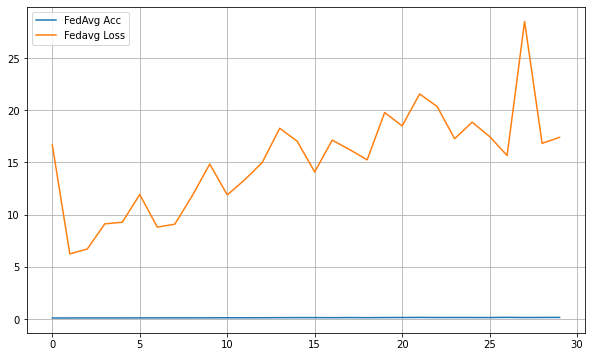

In [6]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

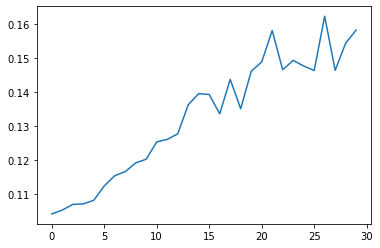

In [7]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [ ]:
print(average_acc_list,'\n') 
print(average_loss_list)

# Our algorithm

In [8]:
acc0 = [[], [0.10000000149011612, 0.10400000214576721, 0.11680000275373459, 0.14419999718666077, 0.1776999980211258, 0.13269999623298645, 0.14830000698566437, 0.1728000044822693, 0.11249999701976776, 0.10050000250339508, 0.1290999948978424, 0.12139999866485596, 0.15039999783039093, 0.1014999970793724, 0.1543000042438507, 0.17419999837875366, 0.11240000277757645, 0.10980000346899033, 0.13680000603199005, 0.1623000055551529, 0.13130000233650208, 0.1535000056028366, 0.17569999396800995, 0.19189999997615814, 0.14010000228881836, 0.1597999930381775, 0.1460999995470047, 0.10540000349283218, 0.12309999763965607, 0.15320000052452087], [0.15889999270439148, 0.13230000436306, 0.14980000257492065, 0.16769999265670776, 0.1428000032901764, 0.1485999971628189, 0.15230000019073486, 0.21330000460147858, 0.1468999981880188, 0.16410000622272491, 0.1657000035047531, 0.15060000121593475, 0.11580000072717667, 0.12680000066757202, 0.1459999978542328, 0.1436000019311905, 0.09939999878406525, 0.18000000715255737, 0.16349999606609344, 0.15780000388622284, 0.1014999970793724, 0.15600000321865082, 0.17790000140666962, 0.21770000457763672, 0.1793999969959259, 0.13289999961853027, 0.13330000638961792, 0.16140000522136688, 0.17560000717639923, 0.16699999570846558], [0.17239999771118164, 0.18940000236034393, 0.10670000314712524, 0.1696999967098236, 0.18289999663829803, 0.18060000240802765, 0.1420000046491623, 0.20170000195503235, 0.2287999987602234, 0.19380000233650208, 0.20819999277591705, 0.17870000004768372, 0.25209999084472656, 0.11590000241994858, 0.15479999780654907, 0.17409999668598175, 0.13379999995231628, 0.13590000569820404, 0.2206999957561493, 0.18279999494552612, 0.22689999639987946, 0.2020999938249588, 0.1777999997138977, 0.188400000333786, 0.19869999587535858, 0.19370000064373016, 0.15549999475479126, 0.13510000705718994, 0.19189999997615814, 0.15330000221729279], [0.22439999878406525, 0.17960000038146973, 0.17509999871253967, 0.19220000505447388, 0.23090000450611115, 0.21480000019073486, 0.2711000144481659, 0.23019999265670776, 0.2037999927997589, 0.2680000066757202, 0.2621000111103058, 0.21979999542236328, 0.17970000207424164, 0.21580000221729279, 0.23330000042915344, 0.20559999346733093, 0.1680999994277954, 0.2671999931335449, 0.20900000631809235, 0.20579999685287476, 0.14949999749660492, 0.25369998812675476, 0.25589999556541443, 0.2190999984741211, 0.23849999904632568, 0.2556999921798706, 0.17990000545978546, 0.22859999537467957, 0.1940000057220459, 0.23600000143051147], [0.20430000126361847, 0.19990000128746033, 0.25220000743865967, 0.11389999836683273, 0.23149999976158142, 0.23819999396800995, 0.2199999988079071, 0.24289999902248383, 0.22460000216960907, 0.1565999984741211, 0.16940000653266907, 0.26989999413490295, 0.21449999511241913, 0.18449999392032623, 0.22110000252723694, 0.19460000097751617, 0.20239999890327454, 0.193900004029274, 0.1509999930858612, 0.27970001101493835, 0.17409999668598175, 0.20340000092983246, 0.23759999871253967, 0.23010000586509705, 0.23810000717639923, 0.25600001215934753, 0.188400000333786, 0.20759999752044678, 0.2168000042438507, 0.2117999941110611], [0.23589999973773956, 0.2515999972820282, 0.2644999921321869, 0.2231999933719635, 0.2554999887943268, 0.23720000684261322, 0.19480000436306, 0.1889999955892563, 0.22830000519752502, 0.29679998755455017, 0.23420000076293945, 0.24379999935626984, 0.18690000474452972, 0.1712000072002411, 0.2078000009059906, 0.2529999911785126, 0.2535000145435333, 0.243599995970726, 0.20469999313354492, 0.23559999465942383, 0.2655999958515167, 0.20389999449253082, 0.25589999556541443, 0.2535000145435333, 0.23980000615119934, 0.22910000383853912, 0.15070000290870667, 0.23119999468326569, 0.2328999936580658, 0.26499998569488525], [0.2117999941110611, 0.259799987077713, 0.2071000039577484, 0.22460000216960907, 0.30059999227523804, 0.24719999730587006, 0.15960000455379486, 0.163100004196167, 0.271699994802475, 0.24269999563694, 0.24719999730587006, 0.21950000524520874, 0.17419999837875366, 0.28110000491142273, 0.25940001010894775, 0.2632000148296356, 0.2782000005245209, 0.2815000116825104, 0.24560000002384186, 0.21739999949932098, 0.24420000612735748, 0.24529999494552612, 0.2818000018596649, 0.26409998536109924, 0.2709999978542328, 0.23399999737739563, 0.2955000102519989, 0.1915999948978424, 0.2053000032901764, 0.2248000055551529], [0.1914999932050705, 0.2782000005245209, 0.2858000099658966, 0.26440000534057617, 0.28380000591278076, 0.2809999883174896, 0.17419999837875366, 0.24230000376701355, 0.30230000615119934, 0.259799987077713, 0.2849000096321106, 0.24639999866485596, 0.2766000032424927, 0.27379998564720154, 0.2685000002384186, 0.25870001316070557, 0.2660999894142151, 0.2476000040769577, 0.27709999680519104, 0.24210000038146973, 0.23090000450611115, 0.2578999996185303, 0.21979999542236328, 0.27090001106262207, 0.12219999730587006, 0.2994999885559082, 0.2531000077724457, 0.2849999964237213, 0.27309998869895935, 0.20200000703334808], [0.2671999931335449, 0.2345000058412552, 0.23389999568462372, 0.2393999993801117, 0.27720001339912415, 0.2669999897480011, 0.23510000109672546, 0.26440000534057617, 0.30790001153945923, 0.2921000123023987, 0.23600000143051147, 0.2563999891281128, 0.2705000042915344, 0.3091999888420105, 0.29010000824928284, 0.24570000171661377, 0.25220000743865967, 0.2621000111103058, 0.26600000262260437, 0.2583000063896179, 0.2467000037431717, 0.2240000069141388, 0.30329999327659607, 0.296099990606308, 0.2500999867916107, 0.3181999921798706, 0.27239999175071716, 0.23800000548362732, 0.2574000060558319, 0.29750001430511475], [0.29660001397132874, 0.26980000734329224, 0.20880000293254852, 0.2669999897480011, 0.25369998812675476, 0.2703999876976013, 0.2874000072479248, 0.251800000667572, 0.23080000281333923, 0.20659999549388885, 0.31940001249313354, 0.28200000524520874, 0.19030000269412994, 0.29600000381469727, 0.2287999987602234, 0.2110999971628189, 0.2533999979496002, 0.24860000610351562, 0.2734000086784363, 0.24220000207424164, 0.2662999927997589, 0.3052000105381012, 0.3061000108718872, 0.29159998893737793, 0.28130000829696655, 0.26589998602867126, 0.28119999170303345, 0.25690001249313354, 0.29440000653266907, 0.25780001282691956], [0.26570001244544983, 0.3077999949455261, 0.2930999994277954, 0.2842999994754791, 0.28220000863075256, 0.2831999957561493, 0.2921999990940094, 0.31349998712539673, 0.2572000026702881, 0.2784000039100647, 0.18930000066757202, 0.25040000677108765, 0.27300000190734863, 0.26660001277923584, 0.2896000146865845, 0.33899998664855957, 0.24899999797344208, 0.2425999939441681, 0.30399999022483826, 0.28760001063346863, 0.2809000015258789, 0.30480000376701355, 0.3122999966144562, 0.2888000011444092, 0.3073999881744385, 0.2102999985218048, 0.2799000144004822, 0.27730000019073486, 0.218299999833107, 0.3402000069618225], [0.32330000400543213, 0.21819999814033508, 0.28049999475479126, 0.3138999938964844, 0.27970001101493835, 0.2680000066757202, 0.15649999678134918, 0.29660001397132874, 0.27720001339912415, 0.2750000059604645, 0.28200000524520874, 0.32409998774528503, 0.27129998803138733, 0.27239999175071716, 0.2531999945640564, 0.3206999897956848, 0.27950000762939453, 0.3174999952316284, 0.288100004196167, 0.30550000071525574, 0.30070000886917114, 0.2946000099182129, 0.3197000026702881, 0.3037000000476837, 0.23409999907016754, 0.28529998660087585, 0.3287999927997589, 0.27880001068115234, 0.2815999984741211, 0.19499999284744263], [0.2590999901294708, 0.29490000009536743, 0.2750000059604645, 0.29750001430511475, 0.2912999987602234, 0.3018999993801117, 0.3343999981880188, 0.2667999863624573, 0.2621999979019165, 0.304500013589859, 0.2572000026702881, 0.3012000024318695, 0.2533000111579895, 0.2897000014781952, 0.28929999470710754, 0.2257000058889389, 0.2930000126361847, 0.25540000200271606, 0.3037000000476837, 0.3052000105381012, 0.31869998574256897, 0.32010000944137573, 0.3001999855041504, 0.2782999873161316, 0.3246999979019165, 0.23569999635219574, 0.3163999915122986, 0.28679999709129333, 0.31299999356269836, 0.25029999017715454], [0.2547000050544739, 0.30799999833106995, 0.21629999577999115, 0.2630999982357025, 0.3149000108242035, 0.34439998865127563, 0.26339998841285706, 0.3215000033378601, 0.3540000021457672, 0.287200003862381, 0.29840001463890076, 0.2761000096797943, 0.3125999867916107, 0.2768999934196472, 0.29319998621940613, 0.32190001010894775, 0.3456999957561493, 0.32089999318122864, 0.2937000095844269, 0.2874000072479248, 0.3203999996185303, 0.32359999418258667, 0.26159998774528503, 0.24580000340938568, 0.29120001196861267, 0.32589998841285706, 0.31859999895095825, 0.30070000886917114, 0.33230000734329224, 0.2906000018119812], [0.30790001153945923, 0.3093000054359436, 0.3483000099658966, 0.2621000111103058, 0.30880001187324524, 0.2896000146865845, 0.287200003862381, 0.27250000834465027, 0.30630001425743103, 0.2924000024795532, 0.2280000001192093, 0.3407000005245209, 0.3336000144481659, 0.2572000026702881, 0.2976999878883362, 0.26759999990463257, 0.321399986743927, 0.2759999930858612, 0.28119999170303345, 0.3009999990463257, 0.2915000021457672, 0.2655999958515167, 0.25459998846054077, 0.28209999203681946, 0.3197999894618988, 0.310699999332428, 0.28870001435279846, 0.267300009727478, 0.3255999982357025, 0.249099999666214], [0.22939999401569366, 0.30570000410079956, 0.3400000035762787, 0.24230000376701355, 0.27559998631477356, 0.2912999987602234, 0.32330000400543213, 0.3334999978542328, 0.23000000417232513, 0.3181000053882599, 0.34790000319480896, 0.31520000100135803, 0.27140000462532043, 0.3027999997138977, 0.2508000135421753, 0.2996000051498413, 0.2921999990940094, 0.2904999852180481, 0.24979999661445618, 0.34119999408721924, 0.2937999963760376, 0.3000999987125397, 0.31850001215934753, 0.3122999966144562, 0.30379998683929443, 0.22519999742507935, 0.31049999594688416, 0.23849999904632568, 0.33070001006126404, 0.28690001368522644], [0.2694000005722046, 0.335999995470047, 0.26499998569488525, 0.3199999928474426, 0.2944999933242798, 0.30630001425743103, 0.29440000653266907, 0.25040000677108765, 0.2939999997615814, 0.28790000081062317, 0.25380000472068787, 0.33169999718666077, 0.32749998569488525, 0.314300000667572, 0.3098999857902527, 0.2906000018119812, 0.34220001101493835, 0.31380000710487366, 0.3386000096797943, 0.3043000102043152, 0.2793999910354614, 0.33719998598098755, 0.3009999990463257, 0.34060001373291016, 0.31769999861717224, 0.34299999475479126, 0.32690000534057617, 0.3327000141143799, 0.2766999900341034, 0.2766999900341034], [0.30140000581741333, 0.30820000171661377, 0.26109999418258667, 0.3253999948501587, 0.3292999863624573, 0.25220000743865967, 0.32030001282691956, 0.30660000443458557, 0.29330000281333923, 0.30140000581741333, 0.2782999873161316, 0.30079999566078186, 0.3508000075817108, 0.30239999294281006, 0.2928999960422516, 0.32659998536109924, 0.311599999666214, 0.31929999589920044, 0.3100000023841858, 0.2971999943256378, 0.32899999618530273, 0.24879999458789825, 0.2930999994277954, 0.27219998836517334, 0.258899986743927, 0.3012999892234802, 0.302700012922287, 0.30720001459121704, 0.288100004196167, 0.2529999911785126], [0.3294999897480011, 0.3411000072956085, 0.25589999556541443, 0.3165000081062317, 0.28060001134872437, 0.29440000653266907, 0.2863999903202057, 0.3463999927043915, 0.36149999499320984, 0.2912999987602234, 0.32429999113082886, 0.33180001378059387, 0.267300009727478, 0.31119999289512634, 0.30140000581741333, 0.2361000031232834, 0.31040000915527344, 0.30230000615119934, 0.28700000047683716, 0.34220001101493835, 0.3472999930381775, 0.27390000224113464, 0.2906999886035919, 0.3314000070095062, 0.33009999990463257, 0.32739999890327454, 0.25360000133514404, 0.2896000146865845, 0.3352000117301941, 0.2696000039577484], [0.2660999894142151, 0.30889999866485596, 0.351500004529953, 0.31310001015663147, 0.29409998655319214, 0.27880001068115234, 0.24539999663829803, 0.29269999265670776, 0.320499986410141, 0.29840001463890076, 0.2888999879360199, 0.30090001225471497, 0.28220000863075256, 0.3278999924659729, 0.32280001044273376, 0.3230000138282776, 0.2818000018596649, 0.26260000467300415, 0.35420000553131104, 0.2531999945640564, 0.2761000096797943, 0.3492000102996826, 0.3125, 0.3061000108718872, 0.33820000290870667, 0.3337000012397766, 0.3384000062942505, 0.3154999911785126, 0.320499986410141, 0.2858999967575073], [0.3310000002384186, 0.3490999937057495, 0.28529998660087585, 0.2987000048160553, 0.3003999888896942, 0.3249000012874603, 0.28519999980926514, 0.2840000092983246, 0.28360000252723694, 0.2863999903202057, 0.3336000144481659, 0.2964000105857849, 0.2865000069141388, 0.2718000113964081, 0.30149999260902405, 0.3287000060081482, 0.31040000915527344, 0.2653000056743622, 0.27810001373291016, 0.3353999853134155, 0.2858999967575073, 0.2184000015258789, 0.31200000643730164, 0.35580000281333923, 0.26919999718666077, 0.24210000038146973, 0.34369999170303345, 0.2946999967098236, 0.3296999931335449, 0.321399986743927], [0.3093000054359436, 0.3197000026702881, 0.3188000023365021, 0.2867000102996826, 0.3472999930381775, 0.3167000114917755, 0.3508000075817108, 0.3231000006198883, 0.3497999906539917, 0.27129998803138733, 0.21780000627040863, 0.34060001373291016, 0.3310000002384186, 0.319599986076355, 0.31380000710487366, 0.3190000057220459, 0.33970001339912415, 0.3393000066280365, 0.32350000739097595, 0.28380000591278076, 0.2865000069141388, 0.2565999925136566, 0.3183000087738037, 0.3165999948978424, 0.3407000005245209, 0.3246999979019165, 0.3310999870300293, 0.3001999855041504, 0.29429998993873596, 0.31029999256134033], [0.2705000042915344, 0.32820001244544983, 0.3197000026702881, 0.2992999851703644, 0.33880001306533813, 0.3312000036239624, 0.3172000050544739, 0.3303000032901764, 0.36149999499320984, 0.334199994802475, 0.3384999930858612, 0.2921999990940094, 0.32409998774528503, 0.2793000042438507, 0.2615000009536743, 0.3479999899864197, 0.2824000120162964, 0.29109999537467957, 0.3393999934196472, 0.3319999873638153, 0.3328000009059906, 0.2973000109195709, 0.2976999878883362, 0.3544999957084656, 0.3578000068664551, 0.34279999136924744, 0.26809999346733093, 0.3028999865055084, 0.3626999855041504, 0.3050999939441681], [0.3725999891757965, 0.26820001006126404, 0.3174999952316284, 0.3077000081539154, 0.2703000009059906, 0.3393999934196472, 0.34040001034736633, 0.2994000017642975, 0.2354000061750412, 0.298799991607666, 0.2483000010251999, 0.34529998898506165, 0.35089999437332153, 0.326200008392334, 0.31700000166893005, 0.30230000615119934, 0.3208000063896179, 0.3070000112056732, 0.3240000009536743, 0.3068999946117401, 0.35519999265670776, 0.32510000467300415, 0.3197000026702881, 0.3005000054836273, 0.3107999861240387, 0.26989999413490295, 0.27489998936653137, 0.31130000948905945, 0.29510000348091125, 0.3188000023365021], [0.28949999809265137, 0.31929999589920044, 0.3269999921321869, 0.2847999930381775, 0.32350000739097595, 0.3357999920845032, 0.3131999969482422, 0.3156999945640564, 0.33880001306533813, 0.2395000010728836, 0.3149000108242035, 0.34310001134872437, 0.2906000018119812, 0.28040000796318054, 0.3021000027656555, 0.288100004196167, 0.3199000060558319, 0.33629998564720154, 0.2777999937534332, 0.35670000314712524, 0.353300005197525, 0.31779998540878296, 0.31769999861717224, 0.33719998598098755, 0.37220001220703125, 0.3467999994754791, 0.3050999939441681, 0.3100000023841858, 0.329800009727478, 0.32659998536109924], [0.37059998512268066, 0.2320999950170517, 0.2809000015258789, 0.34200000762939453, 0.31869998574256897, 0.27559998631477356, 0.289000004529953, 0.3068999946117401, 0.3425000011920929, 0.32019999623298645, 0.3246999979019165, 0.299699991941452, 0.302700012922287, 0.32010000944137573, 0.36469998955726624, 0.32670000195503235, 0.2718999981880188, 0.3093000054359436, 0.30090001225471497, 0.33239999413490295, 0.3409999907016754, 0.35370001196861267, 0.31520000100135803, 0.36640000343322754, 0.29030001163482666, 0.3366999924182892, 0.35899999737739563, 0.2711000144481659, 0.299699991941452, 0.3158999979496002], [0.35510000586509705, 0.32269999384880066, 0.33230000734329224, 0.29339998960494995, 0.32829999923706055, 0.3025999963283539, 0.2508000135421753, 0.33889999985694885, 0.32089999318122864, 0.3903000056743622, 0.3529999852180481, 0.31200000643730164, 0.3215000033378601, 0.36329999566078186, 0.2574999928474426, 0.32330000400543213, 0.319599986076355, 0.30390000343322754, 0.314300000667572, 0.349700003862381, 0.2669000029563904, 0.34529998898506165, 0.34619998931884766, 0.3163999915122986, 0.3398999869823456, 0.3140000104904175, 0.2888999879360199, 0.34769999980926514, 0.34200000762939453, 0.29589998722076416], [0.33309999108314514, 0.33649998903274536, 0.28679999709129333, 0.3325999975204468, 0.32670000195503235, 0.3391000032424927, 0.2903999984264374, 0.3379000127315521, 0.28380000591278076, 0.30000001192092896, 0.3093999922275543, 0.34470000863075256, 0.33799999952316284, 0.2858999967575073, 0.31459999084472656, 0.29980000853538513, 0.36149999499320984, 0.3476000130176544, 0.34929999709129333, 0.37119999527931213, 0.3637999892234802, 0.3910999894142151, 0.31450000405311584, 0.26919999718666077, 0.33730000257492065, 0.28189998865127563, 0.3476000130176544, 0.33250001072883606, 0.3605000078678131, 0.31279999017715454], [0.3246000111103058, 0.32100000977516174, 0.27480000257492065, 0.3400999903678894, 0.2766999900341034, 0.33500000834465027, 0.3571999967098236, 0.33219999074935913, 0.320499986410141, 0.3481000065803528, 0.3626999855041504, 0.34599998593330383, 0.34369999170303345, 0.3091000020503998, 0.3230000138282776, 0.28870001435279846, 0.32820001244544983, 0.3587999939918518, 0.3605000078678131, 0.33009999990463257, 0.33550000190734863, 0.3817000091075897, 0.34049999713897705, 0.3228999972343445, 0.3190999925136566, 0.32690000534057617, 0.3160000145435333, 0.313400000333786, 0.3257000148296356, 0.3393000066280365], [0.3529999852180481, 0.32179999351501465, 0.30809998512268066, 0.32409998774528503, 0.31380000710487366, 0.3763999938964844, 0.24770000576972961, 0.3619999885559082, 0.34290000796318054, 0.30979999899864197, 0.3127000033855438, 0.3440000116825104, 0.3402000069618225, 0.35010001063346863, 0.28049999475479126, 0.2865999937057495, 0.3296999931335449, 0.3711000084877014, 0.3075000047683716, 0.28029999136924744, 0.34200000762939453, 0.3361000120639801, 0.3700999915599823, 0.3077000081539154, 0.3073999881744385, 0.3553999960422516, 0.33869999647140503, 0.353300005197525, 0.28450000286102295, 0.3483000099658966]]
loss0 = [[], [2.4273602962493896, 2.326733112335205, 2.3728795051574707, 3.204547166824341, 2.648799180984497, 2.415226936340332, 2.423851490020752, 2.485675096511841, 2.3896429538726807, 2.5426464080810547, 2.3998188972473145, 2.3704428672790527, 2.4181785583496094, 2.288419246673584, 2.485631227493286, 2.6420724391937256, 2.368680477142334, 2.75937557220459, 2.4933457374572754, 2.2889153957366943, 3.0108611583709717, 2.3648874759674072, 2.33866024017334, 2.5492632389068604, 2.6560120582580566, 2.4729089736938477, 2.6005468368530273, 2.730231523513794, 2.2947325706481934, 2.385099172592163], [2.5540547370910645, 2.494265556335449, 2.845012664794922, 2.861797332763672, 2.9960203170776367, 2.362027168273926, 2.3542227745056152, 2.258624315261841, 2.34237003326416, 2.3057093620300293, 2.4643807411193848, 2.3717501163482666, 2.448096990585327, 3.648425340652466, 2.4546959400177, 2.274801254272461, 2.580829381942749, 2.1932551860809326, 2.3935985565185547, 2.653552293777466, 2.791550874710083, 2.222942590713501, 2.2517473697662354, 2.279519557952881, 2.355365514755249, 2.4386165142059326, 2.2591867446899414, 2.5339314937591553, 2.3619470596313477, 2.3252041339874268], [2.5374832153320312, 2.5213232040405273, 2.8202052116394043, 3.180358648300171, 2.3187386989593506, 2.405357599258423, 2.308670997619629, 2.573394298553467, 2.3025004863739014, 2.4099650382995605, 2.3028218746185303, 2.557981252670288, 2.229673147201538, 2.668508291244507, 2.589508295059204, 3.2491254806518555, 2.3423497676849365, 2.451589345932007, 2.162388563156128, 2.6757631301879883, 2.1518828868865967, 2.3498785495758057, 2.4314002990722656, 2.4938197135925293, 2.426058292388916, 2.3618924617767334, 2.793128728866577, 2.3195228576660156, 2.3199682235717773, 2.5421385765075684], [2.3732781410217285, 2.184210777282715, 2.408628225326538, 2.2546138763427734, 2.149801015853882, 2.4711577892303467, 2.663240671157837, 2.5083131790161133, 2.233409881591797, 2.219752788543701, 2.2334377765655518, 2.579725503921509, 2.4330790042877197, 2.225088357925415, 2.3112268447875977, 2.388916492462158, 2.5816256999969482, 2.599501132965088, 2.1015560626983643, 2.2693374156951904, 3.0935871601104736, 2.1289782524108887, 2.6509974002838135, 2.4364051818847656, 2.2282655239105225, 2.4441237449645996, 2.2694804668426514, 2.4490301609039307, 2.847325325012207, 2.4846396446228027], [2.763659715652466, 3.947993040084839, 2.38468074798584, 4.121133804321289, 2.480360507965088, 2.552705764770508, 2.696063995361328, 2.9506514072418213, 2.8007190227508545, 2.9076125621795654, 2.7621524333953857, 2.603916645050049, 2.2030627727508545, 3.155426025390625, 2.3320112228393555, 2.379411220550537, 2.164989948272705, 2.4146625995635986, 2.55245304107666, 2.161545753479004, 2.2760417461395264, 2.9774410724639893, 2.545212507247925, 2.21291184425354, 2.318254232406616, 2.392374038696289, 2.5239994525909424, 2.321361780166626, 2.2217893600463867, 2.669804573059082], [2.283994197845459, 2.208386182785034, 2.7009799480438232, 2.222978353500366, 2.5622456073760986, 2.5501670837402344, 2.8319151401519775, 2.2513628005981445, 2.800985813140869, 2.5151450634002686, 3.2500290870666504, 2.489600896835327, 2.6550345420837402, 2.9462528228759766, 2.0543885231018066, 2.5063674449920654, 2.627117156982422, 2.3446362018585205, 2.7685325145721436, 3.598663568496704, 2.355457305908203, 2.503260374069214, 2.405874729156494, 2.5123696327209473, 3.1041252613067627, 3.0169999599456787, 2.4942610263824463, 2.5801944732666016, 2.4313833713531494, 2.2217555046081543], [2.4447686672210693, 2.8726630210876465, 4.080738067626953, 2.2248172760009766, 2.1642186641693115, 2.677846670150757, 3.6939504146575928, 4.365136623382568, 2.429142475128174, 2.446373701095581, 2.4288229942321777, 2.597576856613159, 3.2813823223114014, 2.6431615352630615, 2.263324737548828, 2.298222064971924, 2.4345643520355225, 2.2472240924835205, 2.250577926635742, 3.4650371074676514, 2.2382662296295166, 2.4598042964935303, 2.3274130821228027, 2.6319024562835693, 2.604423999786377, 2.5405333042144775, 2.6803696155548096, 2.2846908569335938, 3.7044472694396973, 2.6317288875579834], [2.6301567554473877, 2.652160406112671, 2.557137966156006, 2.127692461013794, 2.24649715423584, 2.3803305625915527, 2.587918281555176, 2.4889209270477295, 2.636983871459961, 2.637493848800659, 2.5712242126464844, 2.537649154663086, 2.4837164878845215, 2.1467978954315186, 2.971381425857544, 2.741267442703247, 2.6964528560638428, 2.735955238342285, 3.1058788299560547, 2.409985065460205, 2.774766683578491, 2.8149280548095703, 2.3264377117156982, 2.151320457458496, 3.2912182807922363, 2.26998233795166, 2.3245182037353516, 2.5065441131591797, 2.510054349899292, 2.8952441215515137], [3.070112705230713, 2.4859678745269775, 2.8899872303009033, 2.544306755065918, 2.3299882411956787, 2.3369064331054688, 3.550818681716919, 2.473209857940674, 2.2535393238067627, 2.5017926692962646, 4.202115058898926, 2.217970371246338, 2.576345682144165, 2.5163440704345703, 2.291130304336548, 2.4092085361480713, 2.4799606800079346, 3.6889843940734863, 2.7996671199798584, 3.3243422508239746, 2.8542561531066895, 2.7542622089385986, 2.401336431503296, 2.5281155109405518, 2.8763160705566406, 2.338658332824707, 2.2640624046325684, 2.743640899658203, 2.6860013008117676, 2.367116689682007], [2.42303204536438, 2.6648216247558594, 3.662795305252075, 3.2010111808776855, 2.928020477294922, 2.81380295753479, 2.7891948223114014, 2.610562801361084, 2.991893768310547, 3.3089523315429688, 2.6604936122894287, 2.599159002304077, 2.7916371822357178, 2.433347225189209, 3.8795347213745117, 2.4439308643341064, 2.316659927368164, 2.9874935150146484, 2.6091723442077637, 2.791917562484741, 2.675487995147705, 2.3977789878845215, 2.4394960403442383, 2.4923095703125, 2.7237660884857178, 2.3241589069366455, 2.7003657817840576, 2.5735645294189453, 2.4462876319885254, 3.0557169914245605], [2.852792739868164, 2.2461180686950684, 2.3012888431549072, 2.9515695571899414, 2.5185070037841797, 3.4168362617492676, 2.521238088607788, 2.4424118995666504, 3.9437930583953857, 2.4354476928710938, 3.213484048843384, 4.34094762802124, 2.460677146911621, 2.748021364212036, 2.7052295207977295, 2.3142101764678955, 2.9611315727233887, 2.5574631690979004, 2.7004897594451904, 2.503368854522705, 3.488163948059082, 2.2814784049987793, 2.5575733184814453, 2.28861403465271, 2.110731363296509, 2.767779588699341, 2.713390350341797, 2.6719093322753906, 3.572687864303589, 2.3685827255249023], [2.315350294113159, 3.960139751434326, 2.6019017696380615, 2.675699234008789, 3.0779666900634766, 2.799283027648926, 3.8688461780548096, 2.2574987411499023, 3.274991750717163, 2.5600786209106445, 2.89261531829834, 2.3480544090270996, 2.571998119354248, 2.73699951171875, 2.2381234169006348, 2.894501209259033, 2.356086492538452, 2.558417320251465, 2.556086540222168, 2.3502509593963623, 2.6009156703948975, 2.847529649734497, 3.441561222076416, 3.087416887283325, 3.3118035793304443, 2.4111640453338623, 2.258223295211792, 2.966022253036499, 2.6314141750335693, 5.0533552169799805], [3.8882296085357666, 3.3398053646087646, 3.627976655960083, 2.874762535095215, 2.1984598636627197, 2.2771854400634766, 2.5888211727142334, 3.368342638015747, 2.5077030658721924, 2.7529776096343994, 2.6938700675964355, 4.496500492095947, 3.829991102218628, 2.991891860961914, 2.775439977645874, 3.341060161590576, 2.5932915210723877, 2.7574331760406494, 2.3014438152313232, 3.7161617279052734, 2.641334056854248, 2.7720491886138916, 2.982804298400879, 2.3454439640045166, 2.7306809425354004, 3.2158563137054443, 2.605198860168457, 2.8014984130859375, 3.3601715564727783, 3.0995895862579346], [4.508681297302246, 3.181978225708008, 3.345616340637207, 2.770432949066162, 2.686875820159912, 2.0958030223846436, 3.203272581100464, 2.43912935256958, 2.0744545459747314, 3.4027678966522217, 2.708134412765503, 2.822962760925293, 2.465237855911255, 2.6620073318481445, 2.4950506687164307, 2.373441457748413, 2.543490409851074, 2.467916250228882, 2.9541585445404053, 3.1872785091400146, 2.4180073738098145, 2.4106407165527344, 2.6385321617126465, 3.310790538787842, 2.777702569961548, 2.3769538402557373, 2.1352410316467285, 2.468137264251709, 2.4389638900756836, 2.6964170932769775], [2.585644245147705, 3.0222790241241455, 2.6669857501983643, 2.977354049682617, 2.594813585281372, 2.727635383605957, 2.707237958908081, 2.853956699371338, 2.9154698848724365, 3.210918426513672, 3.7971534729003906, 2.4422051906585693, 2.3601105213165283, 2.8614344596862793, 3.141806125640869, 2.766711711883545, 2.4302077293395996, 2.655362606048584, 3.7815043926239014, 2.5682976245880127, 2.3985986709594727, 3.391062021255493, 2.4647483825683594, 2.931156635284424, 2.9334704875946045, 2.4415857791900635, 2.59865403175354, 2.8915913105010986, 2.3109114170074463, 3.920579195022583], [4.829180717468262, 3.4330499172210693, 2.971198081970215, 4.091895580291748, 3.0165209770202637, 3.64949369430542, 2.2916767597198486, 2.4761288166046143, 4.635047912597656, 2.3748185634613037, 2.5245230197906494, 2.7850632667541504, 3.003958225250244, 2.6955437660217285, 4.306131839752197, 2.875847816467285, 2.5848476886749268, 2.8281424045562744, 2.89953875541687, 2.849973678588867, 2.9085986614227295, 2.597649335861206, 2.391669750213623, 3.3586182594299316, 2.671391487121582, 3.64314603805542, 2.484212875366211, 2.8909549713134766, 3.1335556507110596, 2.943848133087158], [3.747466802597046, 2.6548144817352295, 3.814868688583374, 3.0183839797973633, 2.523324489593506, 2.74143385887146, 2.656615972518921, 2.7439157962799072, 3.1964118480682373, 2.8550736904144287, 2.7477869987487793, 2.2401700019836426, 2.4798169136047363, 2.5314671993255615, 3.55399227142334, 2.536842107772827, 2.153945207595825, 2.6065127849578857, 2.4592318534851074, 2.706760883331299, 3.2810628414154053, 2.3533036708831787, 2.8201847076416016, 2.6622812747955322, 3.1755969524383545, 2.336768388748169, 2.2618558406829834, 2.932711124420166, 3.2398016452789307, 2.880747079849243], [2.4120774269104004, 2.7453088760375977, 2.4948570728302, 2.4926819801330566, 3.436286211013794, 3.3038456439971924, 3.099656105041504, 3.3771448135375977, 2.996450185775757, 3.9305500984191895, 3.8530163764953613, 3.271024703979492, 2.754218578338623, 3.695810556411743, 2.8022611141204834, 2.8690810203552246, 3.2493515014648438, 2.492166757583618, 2.937147617340088, 3.874391794204712, 2.849266290664673, 3.4954183101654053, 3.087240219116211, 3.429243803024292, 3.3604984283447266, 2.8685410022735596, 2.5682766437530518, 2.22335147857666, 2.4575719833374023, 2.890038251876831], [2.6606698036193848, 2.88297176361084, 3.261121988296509, 2.6112372875213623, 2.937877655029297, 3.122424602508545, 2.5885238647460938, 2.9109063148498535, 2.1680235862731934, 3.308846950531006, 2.283299684524536, 2.604172945022583, 2.7994658946990967, 2.5008292198181152, 3.009054183959961, 3.3659467697143555, 3.0203049182891846, 3.2637104988098145, 2.6733713150024414, 3.0397210121154785, 2.3822214603424072, 3.247299909591675, 3.555453062057495, 2.6781458854675293, 2.9457287788391113, 2.227792501449585, 3.3629581928253174, 2.841708183288574, 2.474760055541992, 3.016388177871704], [3.4501054286956787, 2.763723611831665, 2.638078212738037, 3.043337106704712, 3.1762256622314453, 2.5643301010131836, 3.7013206481933594, 2.6242835521698, 2.5673694610595703, 2.8899543285369873, 2.963841438293457, 3.1926956176757812, 2.952802896499634, 2.8361082077026367, 2.542381525039673, 2.7798972129821777, 2.50087833404541, 2.5804009437561035, 2.9609792232513428, 4.78975248336792, 3.35046124458313, 2.3067407608032227, 2.962772846221924, 3.0591118335723877, 2.891178607940674, 2.845442771911621, 2.4416024684906006, 2.3820042610168457, 2.743619680404663, 3.3320820331573486], [2.9205639362335205, 2.646712064743042, 2.721346616744995, 3.1161413192749023, 3.3035011291503906, 2.9807090759277344, 3.202719211578369, 3.641707420349121, 4.697588920593262, 2.8788342475891113, 2.453706979751587, 2.465843439102173, 3.334280490875244, 3.9917867183685303, 3.332564353942871, 2.6941096782684326, 3.74353289604187, 4.569372177124023, 3.9281086921691895, 2.910698652267456, 3.0792837142944336, 3.631340980529785, 2.9478228092193604, 2.488666296005249, 2.5472776889801025, 4.449265003204346, 2.4449102878570557, 2.9468133449554443, 2.5652413368225098, 2.6268575191497803], [3.014893054962158, 3.261138916015625, 2.8377063274383545, 4.326942443847656, 2.8190956115722656, 2.236421585083008, 1.9786924123764038, 2.6267447471618652, 2.886469841003418, 3.644160270690918, 4.124666213989258, 2.463787794113159, 2.720604419708252, 2.808084726333618, 2.837491512298584, 2.777588367462158, 2.678123950958252, 2.7560548782348633, 2.697187900543213, 3.145184278488159, 5.406188011169434, 2.956387996673584, 2.474048137664795, 2.3453688621520996, 2.9359254837036133, 2.4023287296295166, 3.3808183670043945, 3.4599344730377197, 3.116703987121582, 2.7128851413726807], [3.1293535232543945, 2.922353982925415, 2.8394370079040527, 2.9887917041778564, 2.873014211654663, 2.6962428092956543, 3.1440389156341553, 3.0569276809692383, 3.091545581817627, 2.8122191429138184, 2.5005061626434326, 3.0326476097106934, 3.353426456451416, 3.819719076156616, 3.0397934913635254, 2.615692377090454, 3.0186028480529785, 3.1805419921875, 2.270761489868164, 2.719827890396118, 3.248271942138672, 3.5139660835266113, 2.9320688247680664, 3.425583600997925, 2.50506329536438, 2.573288679122925, 3.798884868621826, 3.0811989307403564, 2.6949288845062256, 3.057809352874756], [2.7068300247192383, 3.278374671936035, 2.6834969520568848, 2.967522621154785, 3.0479283332824707, 2.725250482559204, 2.891892194747925, 2.8696484565734863, 5.1621599197387695, 2.974334478378296, 3.931074619293213, 2.930229425430298, 2.98410701751709, 3.657588005065918, 2.9666199684143066, 3.2806379795074463, 4.2515974044799805, 2.7177200317382812, 3.4450206756591797, 3.03214693069458, 2.827620506286621, 2.518111228942871, 2.535216808319092, 3.082061529159546, 3.6559500694274902, 4.180999279022217, 2.955322742462158, 2.8221678733825684, 3.3771777153015137, 3.1077733039855957], [3.8421106338500977, 2.8023810386657715, 3.3046815395355225, 3.2509822845458984, 3.001793384552002, 2.8898518085479736, 3.3129944801330566, 2.7690975666046143, 2.4441912174224854, 3.6862707138061523, 3.520529270172119, 2.491234302520752, 4.578521251678467, 3.6296043395996094, 2.651047706604004, 2.3468713760375977, 2.843301773071289, 2.495912790298462, 2.9643478393554688, 2.574584484100342, 2.943145990371704, 3.345247983932495, 2.9747092723846436, 2.4777331352233887, 2.836270570755005, 2.8021883964538574, 2.741494655609131, 2.803983688354492, 2.6497116088867188, 2.885171890258789], [2.857302665710449, 5.0019001960754395, 3.131162405014038, 2.8365797996520996, 3.166642189025879, 4.494417190551758, 3.5216972827911377, 3.717571973800659, 3.214719772338867, 2.3908896446228027, 3.6683809757232666, 2.913078546524048, 3.021322011947632, 2.916879177093506, 2.6860573291778564, 3.3791730403900146, 3.6324710845947266, 3.1788129806518555, 3.1527116298675537, 3.204852819442749, 2.563964605331421, 2.681577205657959, 3.6799774169921875, 3.1040854454040527, 4.026506423950195, 3.0501933097839355, 2.537149667739868, 3.905985116958618, 2.5722293853759766, 3.314446210861206], [3.1291165351867676, 2.6473920345306396, 3.4382007122039795, 3.506441116333008, 3.3509156703948975, 2.9427404403686523, 4.003902912139893, 2.6171751022338867, 3.575326919555664, 2.717132806777954, 2.6129062175750732, 3.0539073944091797, 2.7450919151306152, 2.303293228149414, 3.057846784591675, 2.943906545639038, 2.9305498600006104, 3.1065609455108643, 3.0475566387176514, 3.2158782482147217, 3.754565715789795, 2.581474542617798, 3.521793842315674, 3.4832165241241455, 2.6482431888580322, 2.8642172813415527, 3.240161657333374, 2.7625434398651123, 2.520730972290039, 3.0068023204803467], [2.7020633220672607, 3.066056966781616, 2.5542073249816895, 3.1814370155334473, 3.767688274383545, 3.2484962940216064, 3.010857343673706, 3.330301523208618, 2.7095630168914795, 3.2433454990386963, 2.9679338932037354, 3.1259543895721436, 2.8765640258789062, 3.9099488258361816, 3.2618889808654785, 3.6389858722686768, 2.5255026817321777, 2.771582841873169, 3.894643783569336, 2.550741672515869, 2.947967290878296, 2.742755174636841, 3.0773110389709473, 3.628999710083008, 2.763140916824341, 3.4303581714630127, 2.5788233280181885, 2.944955825805664, 3.322438955307007, 3.1693267822265625], [3.9154772758483887, 2.717135429382324, 3.727562189102173, 3.2277371883392334, 3.868419647216797, 2.4967715740203857, 2.6355936527252197, 3.5621516704559326, 2.879910469055176, 2.625791311264038, 2.601529598236084, 2.534569025039673, 3.299316883087158, 2.5463201999664307, 2.904571771621704, 3.5660035610198975, 2.648454427719116, 2.6470701694488525, 2.955570697784424, 2.927855968475342, 2.619896650314331, 2.0877621173858643, 2.442650318145752, 2.9577088356018066, 3.7811641693115234, 3.596515655517578, 3.2488696575164795, 2.854936361312866, 2.7960026264190674, 2.5552186965942383], [2.832456588745117, 3.6874804496765137, 3.115959405899048, 3.254737615585327, 3.2599644660949707, 2.3904221057891846, 3.9238531589508057, 3.0476529598236084, 2.837014675140381, 3.3814992904663086, 2.857050895690918, 2.8047993183135986, 2.6467723846435547, 3.553741455078125, 3.3284175395965576, 4.979181289672852, 3.12817120552063, 2.6958813667297363, 2.5084500312805176, 3.4568023681640625, 3.0388505458831787, 3.1208653450012207, 2.814917802810669, 3.9617807865142822, 3.547919988632202, 2.428237199783325, 3.6332883834838867, 3.141542434692383, 3.8636393547058105, 3.3820223808288574]] 

acc1 = [[], [0.20640000700950623, 0.13259999454021454, 0.12399999797344208, 0.10170000046491623, 0.09830000251531601, 0.12139999866485596, 0.1517000049352646, 0.16089999675750732, 0.10029999911785126, 0.1388999968767166, 0.18240000307559967, 0.11140000075101852, 0.10050000250339508, 0.1949000060558319, 0.10000000149011612, 0.10620000213384628, 0.2079000025987625, 0.10760000348091125, 0.11110000312328339, 0.12139999866485596, 0.19220000505447388, 0.10000000149011612, 0.11320000141859055, 0.15039999783039093, 0.11800000071525574, 0.1468999981880188, 0.16030000150203705, 0.09950000047683716, 0.18060000240802765, 0.16130000352859497], [0.12370000034570694, 0.17790000140666962, 0.1517000049352646, 0.1363999992609024, 0.10000000149011612, 0.15289999544620514, 0.19740000367164612, 0.17560000717639923, 0.2125999927520752, 0.2295999974012375, 0.1525000035762787, 0.21050000190734863, 0.12150000035762787, 0.12189999967813492, 0.20669999718666077, 0.11469999700784683, 0.1542000025510788, 0.16279999911785126, 0.14650000631809235, 0.13420000672340393, 0.16050000488758087, 0.20020000636577606, 0.11640000343322754, 0.10570000112056732, 0.14259999990463257, 0.14090000092983246, 0.1386999934911728, 0.1542000025510788, 0.11869999766349792, 0.14239999651908875], [0.23019999265670776, 0.18459999561309814, 0.19769999384880066, 0.20900000631809235, 0.14560000598430634, 0.10000000149011612, 0.18520000576972961, 0.23749999701976776, 0.22619999945163727, 0.21080000698566437, 0.1656000018119812, 0.18240000307559967, 0.2290000021457672, 0.15119999647140503, 0.20229999721050262, 0.2337999939918518, 0.1712000072002411, 0.14920000731945038, 0.18539999425411224, 0.19499999284744263, 0.19740000367164612, 0.1898999959230423, 0.15530000627040863, 0.17239999771118164, 0.1469999998807907, 0.17229999601840973, 0.14270000159740448, 0.18389999866485596, 0.15039999783039093, 0.14810000360012054], [0.2093999981880188, 0.24560000002384186, 0.2363000065088272, 0.25189998745918274, 0.19429999589920044, 0.14579999446868896, 0.23960000276565552, 0.218299999833107, 0.19009999930858612, 0.23409999907016754, 0.19820000231266022, 0.1632000058889389, 0.2070000022649765, 0.26510000228881836, 0.18780000507831573, 0.23649999499320984, 0.19939999282360077, 0.24570000171661377, 0.2696000039577484, 0.18070000410079956, 0.23749999701976776, 0.18860000371932983, 0.27810001373291016, 0.22869999706745148, 0.2337999939918518, 0.23999999463558197, 0.26030001044273376, 0.23340000212192535, 0.23899999260902405, 0.17270000278949738], [0.21119999885559082, 0.24860000610351562, 0.24959999322891235, 0.26019999384880066, 0.2078000009059906, 0.21279999613761902, 0.28700000047683716, 0.2815000116825104, 0.2572999894618988, 0.2305999994277954, 0.24529999494552612, 0.16750000417232513, 0.2662000060081482, 0.21940000355243683, 0.2160000056028366, 0.2303999960422516, 0.26159998774528503, 0.2535000145435333, 0.25679999589920044, 0.25189998745918274, 0.2554999887943268, 0.23810000717639923, 0.26759999990463257, 0.274399995803833, 0.23270000517368317, 0.21780000627040863, 0.16019999980926514, 0.26339998841285706, 0.2395000010728836, 0.21960000693798065], [0.25380000472068787, 0.2727999985218048, 0.27459999918937683, 0.2624000012874603, 0.2687999904155731, 0.25, 0.29429998993873596, 0.1914999932050705, 0.26100000739097595, 0.23270000517368317, 0.22499999403953552, 0.26510000228881836, 0.18080000579357147, 0.23649999499320984, 0.30979999899864197, 0.2946999967098236, 0.20190000534057617, 0.24609999358654022, 0.21299999952316284, 0.188400000333786, 0.2206999957561493, 0.2467000037431717, 0.26190000772476196, 0.2533000111579895, 0.2736000120639801, 0.21449999511241913, 0.27399998903274536, 0.22349999845027924, 0.2574999928474426, 0.28060001134872437], [0.2533999979496002, 0.25589999556541443, 0.22619999945163727, 0.22750000655651093, 0.2743000090122223, 0.23980000615119934, 0.21330000460147858, 0.27950000762939453, 0.26179999113082886, 0.27320000529289246, 0.23819999396800995, 0.31380000710487366, 0.24660000205039978, 0.19580000638961792, 0.2460000067949295, 0.23469999432563782, 0.21639999747276306, 0.2475000023841858, 0.28450000286102295, 0.23090000450611115, 0.2883000075817108, 0.21050000190734863, 0.25369998812675476, 0.22010000050067902, 0.24459999799728394, 0.2574000060558319, 0.25220000743865967, 0.2944999933242798, 0.23639999330043793, 0.2442999929189682], [0.3012000024318695, 0.2743000090122223, 0.2619999945163727, 0.257099986076355, 0.2554999887943268, 0.25780001282691956, 0.31310001015663147, 0.22190000116825104, 0.2621000111103058, 0.23680000007152557, 0.3133000135421753, 0.2517000138759613, 0.2840999960899353, 0.25619998574256897, 0.24869999289512634, 0.20520000159740448, 0.3091000020503998, 0.28139999508857727, 0.28450000286102295, 0.28450000286102295, 0.2680000066757202, 0.2784999907016754, 0.3010999858379364, 0.26330000162124634, 0.27570000290870667, 0.28029999136924744, 0.29910001158714294, 0.29499998688697815, 0.250900000333786, 0.25029999017715454], [0.2533999979496002, 0.2754000127315521, 0.2930999994277954, 0.28949999809265137, 0.2621000111103058, 0.2563000023365021, 0.2451000064611435, 0.23669999837875366, 0.32089999318122864, 0.3192000091075897, 0.2752000093460083, 0.2962000072002411, 0.28999999165534973, 0.25119999051094055, 0.28929999470710754, 0.22669999301433563, 0.22599999606609344, 0.3077000081539154, 0.2667999863624573, 0.24560000002384186, 0.3012999892234802, 0.26030001044273376, 0.2818000018596649, 0.2337999939918518, 0.28130000829696655, 0.2822999954223633, 0.28839999437332153, 0.2410999983549118, 0.27149999141693115, 0.2863999903202057], [0.3003999888896942, 0.2815999984741211, 0.2777999937534332, 0.2955999970436096, 0.26649999618530273, 0.26840001344680786, 0.2906999886035919, 0.2603999972343445, 0.2363000065088272, 0.21780000627040863, 0.22949999570846558, 0.2768999934196472, 0.2718000113964081, 0.29750001430511475, 0.29350000619888306, 0.24330000579357147, 0.2720000147819519, 0.24560000002384186, 0.23929999768733978, 0.2865999937057495, 0.23639999330043793, 0.28439998626708984, 0.23989999294281006, 0.25450000166893005, 0.26019999384880066, 0.26170000433921814, 0.27320000529289246, 0.27810001373291016, 0.25119999051094055, 0.3093999922275543], [0.29750001430511475, 0.22689999639987946, 0.2395000010728836, 0.29910001158714294, 0.2442999929189682, 0.24120000004768372, 0.28790000081062317, 0.25209999084472656, 0.2526000142097473, 0.27790001034736633, 0.2732999920845032, 0.27649998664855957, 0.21930000185966492, 0.2425999939441681, 0.2329999953508377, 0.23999999463558197, 0.26269999146461487, 0.26429998874664307, 0.23430000245571136, 0.28459998965263367, 0.26080000400543213, 0.29350000619888306, 0.2337999939918518, 0.22949999570846558, 0.29179999232292175, 0.30219998955726624, 0.2529999911785126, 0.2775000035762787, 0.2685000002384186, 0.28619998693466187], [0.2443999946117401, 0.2946999967098236, 0.3154999911785126, 0.2542000114917755, 0.2863999903202057, 0.24009999632835388, 0.25870001316070557, 0.30329999327659607, 0.23810000717639923, 0.2897999882698059, 0.26809999346733093, 0.21899999678134918, 0.2953999936580658, 0.2535000145435333, 0.2354000061750412, 0.29330000281333923, 0.30309998989105225, 0.26570001244544983, 0.2475000023841858, 0.2897000014781952, 0.2847999930381775, 0.3052000105381012, 0.24789999425411224, 0.25029999017715454, 0.2615000009536743, 0.21860000491142273, 0.22689999639987946, 0.3165999948978424, 0.2142000049352646, 0.2361000031232834], [0.27219998836517334, 0.2653000056743622, 0.2535000145435333, 0.2635999917984009, 0.31130000948905945, 0.24279999732971191, 0.2815999984741211, 0.2768999934196472, 0.32739999890327454, 0.30799999833106995, 0.2745000123977661, 0.28279998898506165, 0.2989000082015991, 0.2800000011920929, 0.30790001153945923, 0.23720000684261322, 0.31619998812675476, 0.2955999970436096, 0.2874999940395355, 0.3084000051021576, 0.3050999939441681, 0.2718999981880188, 0.26840001344680786, 0.27790001034736633, 0.3021000027656555, 0.2483000010251999, 0.27480000257492065, 0.30329999327659607, 0.27090001106262207, 0.2883000075817108], [0.24629999697208405, 0.3149999976158142, 0.2985999882221222, 0.3000999987125397, 0.3149999976158142, 0.2621999979019165, 0.2906999886035919, 0.29499998688697815, 0.2648000121116638, 0.28439998626708984, 0.3091999888420105, 0.2851000130176544, 0.2475000023841858, 0.27799999713897705, 0.26809999346733093, 0.2791999876499176, 0.301800012588501, 0.25540000200271606, 0.3059999942779541, 0.3000999987125397, 0.3098999857902527, 0.32350000739097595, 0.25209999084472656, 0.29120001196861267, 0.3043999969959259, 0.2912999987602234, 0.2847999930381775, 0.2678999900817871, 0.25060001015663147, 0.3190000057220459], [0.27709999680519104, 0.22339999675750732, 0.28220000863075256, 0.2574000060558319, 0.3046000003814697, 0.29809999465942383, 0.2989000082015991, 0.29100000858306885, 0.29820001125335693, 0.25920000672340393, 0.23010000586509705, 0.2522999942302704, 0.2824999988079071, 0.29739999771118164, 0.27730000019073486, 0.2750999927520752, 0.3269999921321869, 0.26969999074935913, 0.3116999864578247, 0.29589998722076416, 0.2370000034570694, 0.32429999113082886, 0.2662999927997589, 0.29269999265670776, 0.30469998717308044, 0.2946999967098236, 0.3012000024318695, 0.304500013589859, 0.3073999881744385, 0.23749999701976776], [0.26910001039505005, 0.301800012588501, 0.3230000138282776, 0.2498999983072281, 0.27639999985694885, 0.326200008392334, 0.27559998631477356, 0.2761000096797943, 0.2883000075817108, 0.30469998717308044, 0.32510000467300415, 0.3199000060558319, 0.30230000615119934, 0.3239000141620636, 0.30149999260902405, 0.2847000062465668, 0.31610000133514404, 0.295199990272522, 0.33219999074935913, 0.33059999346733093, 0.17100000381469727, 0.32659998536109924, 0.3156000077724457, 0.2806999981403351, 0.2630000114440918, 0.30489999055862427, 0.29179999232292175, 0.3093000054359436, 0.23070000112056732, 0.2863999903202057], [0.34209999442100525, 0.29249998927116394, 0.3077000081539154, 0.2667999863624573, 0.3046000003814697, 0.2768999934196472, 0.2847999930381775, 0.3327000141143799, 0.28760001063346863, 0.29350000619888306, 0.2953999936580658, 0.34709998965263367, 0.32820001244544983, 0.3301999866962433, 0.29499998688697815, 0.2939000129699707, 0.31130000948905945, 0.34209999442100525, 0.35899999737739563, 0.29120001196861267, 0.3034999966621399, 0.29510000348091125, 0.3073999881744385, 0.27480000257492065, 0.2231999933719635, 0.2827000021934509, 0.29179999232292175, 0.2840999960899353, 0.263700008392334, 0.2637999951839447], [0.26089999079704285, 0.29330000281333923, 0.29159998893737793, 0.28690001368522644, 0.31690001487731934, 0.3174999952316284, 0.32429999113082886, 0.3273000121116638, 0.32190001010894775, 0.31150001287460327, 0.26460000872612, 0.2614000141620636, 0.3050000071525574, 0.22120000422000885, 0.3343000113964081, 0.3149000108242035, 0.26170000433921814, 0.32989999651908875, 0.2669999897480011, 0.3027999997138977, 0.31869998574256897, 0.3447999954223633, 0.32420000433921814, 0.24899999797344208, 0.27959999442100525, 0.3127000033855438, 0.31929999589920044, 0.311599999666214, 0.26190000772476196, 0.2752000093460083], [0.3224000036716461, 0.31310001015663147, 0.31119999289512634, 0.23350000381469727, 0.3260999917984009, 0.2946999967098236, 0.2809999883174896, 0.33009999990463257, 0.2597000002861023, 0.32190001010894775, 0.2987000048160553, 0.2892000079154968, 0.28519999980926514, 0.27469998598098755, 0.2312999963760376, 0.28760001063346863, 0.3061000108718872, 0.27309998869895935, 0.33230000734329224, 0.2969000041484833, 0.3319999873638153, 0.2648000121116638, 0.30390000343322754, 0.32600000500679016, 0.2549000084400177, 0.31690001487731934, 0.3052000105381012, 0.32120001316070557, 0.299699991941452, 0.2825999855995178], [0.30480000376701355, 0.301800012588501, 0.31619998812675476, 0.33570000529289246, 0.3037000000476837, 0.2703999876976013, 0.30480000376701355, 0.3197999894618988, 0.2903999984264374, 0.2924000024795532, 0.30630001425743103, 0.32330000400543213, 0.2743000090122223, 0.31619998812675476, 0.2700999975204468, 0.30070000886917114, 0.3192000091075897, 0.3402000069618225, 0.2773999869823456, 0.2948000133037567, 0.3181999921798706, 0.33320000767707825, 0.31940001249313354, 0.2685999870300293, 0.2750000059604645, 0.3052000105381012, 0.28600001335144043, 0.22779999673366547, 0.3255000114440918, 0.31049999594688416], [0.3431999981403351, 0.3052999973297119, 0.3009999990463257, 0.3269999921321869, 0.31520000100135803, 0.29190000891685486, 0.2393999993801117, 0.2937999963760376, 0.2694000005722046, 0.31529998779296875, 0.28049999475479126, 0.3199000060558319, 0.3244999945163727, 0.30970001220703125, 0.2987000048160553, 0.29789999127388, 0.3319000005722046, 0.35760000348091125, 0.2761000096797943, 0.3181000053882599, 0.3043000102043152, 0.2759000062942505, 0.35899999737739563, 0.31130000948905945, 0.28760001063346863, 0.33239999413490295, 0.35109999775886536, 0.29330000281333923, 0.23199999332427979, 0.2799000144004822], [0.3116999864578247, 0.36399999260902405, 0.35100001096725464, 0.30469998717308044, 0.30250000953674316, 0.31380000710487366, 0.25429999828338623, 0.25870001316070557, 0.32409998774528503, 0.28139999508857727, 0.34150001406669617, 0.2475000023841858, 0.3206000030040741, 0.32899999618530273, 0.24549999833106995, 0.3345000147819519, 0.31299999356269836, 0.2797999978065491, 0.3224000036716461, 0.2800999879837036, 0.310699999332428, 0.3059000074863434, 0.3068000078201294, 0.290800005197525, 0.2978000044822693, 0.32600000500679016, 0.3012999892234802, 0.31459999084472656, 0.29019999504089355, 0.3206999897956848], [0.2727999985218048, 0.30809998512268066, 0.29600000381469727, 0.3190999925136566, 0.32499998807907104, 0.28630000352859497, 0.29089999198913574, 0.2822999954223633, 0.29989999532699585, 0.25440001487731934, 0.3237000107765198, 0.35089999437332153, 0.29249998927116394, 0.21690000593662262, 0.26350000500679016, 0.3019999861717224, 0.23999999463558197, 0.27799999713897705, 0.34850001335144043, 0.23929999768733978, 0.328900009393692, 0.3061999976634979, 0.2955999970436096, 0.3118000030517578, 0.2973000109195709, 0.25360000133514404, 0.334199994802475, 0.3174000084400177, 0.2872999906539917, 0.35530000925064087], [0.2922999858856201, 0.3199999928474426, 0.2978000044822693, 0.27730000019073486, 0.2646999955177307, 0.33820000290870667, 0.3578999936580658, 0.33149999380111694, 0.32359999418258667, 0.2989000082015991, 0.31769999861717224, 0.3012000024318695, 0.2784999907016754, 0.3057999908924103, 0.31679999828338623, 0.27889999747276306, 0.33309999108314514, 0.31610000133514404, 0.3212999999523163, 0.2874000072479248, 0.31060001254081726, 0.33640000224113464, 0.29490000009536743, 0.32910001277923584, 0.26579999923706055, 0.27549999952316284, 0.24719999730587006, 0.3280999958515167, 0.3174999952316284, 0.3084999918937683], [0.3034999966621399, 0.2953000068664551, 0.3328000009059906, 0.25679999589920044, 0.31450000405311584, 0.27790001034736633, 0.36070001125335693, 0.26510000228881836, 0.29820001125335693, 0.3328999876976013, 0.3075000047683716, 0.2976999878883362, 0.34119999408721924, 0.3012000024318695, 0.3197999894618988, 0.29750001430511475, 0.33980000019073486, 0.29409998655319214, 0.3418000042438507, 0.31790000200271606, 0.31540000438690186, 0.2969000041484833, 0.36090001463890076, 0.31380000710487366, 0.336899995803833, 0.34630000591278076, 0.3506999909877777, 0.3003999888896942, 0.328000009059906, 0.3264000117778778], [0.3407000005245209, 0.30140000581741333, 0.3605000078678131, 0.3165000081062317, 0.32120001316070557, 0.27649998664855957, 0.2890999913215637, 0.2287999987602234, 0.3125, 0.29330000281333923, 0.2671999931335449, 0.20800000429153442, 0.3093000054359436, 0.3646000027656555, 0.31610000133514404, 0.32170000672340393, 0.26739999651908875, 0.32249999046325684, 0.29510000348091125, 0.28790000081062317, 0.30059999227523804, 0.30140000581741333, 0.3330000042915344, 0.3091000020503998, 0.3560999929904938, 0.3093999922275543, 0.3037000000476837, 0.3504999876022339, 0.3061999976634979, 0.29490000009536743], [0.3183000087738037, 0.2718000113964081, 0.24300000071525574, 0.23190000653266907, 0.31310001015663147, 0.2953000068664551, 0.3172999918460846, 0.3398999869823456, 0.33899998664855957, 0.2881999909877777, 0.3425999879837036, 0.3411000072956085, 0.3343000113964081, 0.3659999966621399, 0.35420000553131104, 0.3582000136375427, 0.3034000098705292, 0.33809998631477356, 0.3269999921321869, 0.26600000262260437, 0.3610999882221222, 0.25760000944137573, 0.34380000829696655, 0.32710000872612, 0.30790001153945923, 0.3303000032901764, 0.3208000063896179, 0.3142000138759613, 0.32499998807907104, 0.3456999957561493], [0.2915000021457672, 0.26829999685287476, 0.3370000123977661, 0.28279998898506165, 0.21690000593662262, 0.30399999022483826, 0.36719998717308044, 0.32820001244544983, 0.30230000615119934, 0.29750001430511475, 0.299699991941452, 0.3650999963283539, 0.31209999322891235, 0.31439998745918274, 0.30709999799728394, 0.30059999227523804, 0.2890999913215637, 0.2971999943256378, 0.28999999165534973, 0.2612000107765198, 0.3131999969482422, 0.3197999894618988, 0.30640000104904175, 0.2955999970436096, 0.3427000045776367, 0.24199999868869781, 0.3386000096797943, 0.2987000048160553, 0.3086000084877014, 0.3262999951839447], [0.33169999718666077, 0.35010001063346863, 0.3626999855041504, 0.29249998927116394, 0.3982999920845032, 0.29679998755455017, 0.27219998836517334, 0.34700000286102295, 0.32820001244544983, 0.3416999876499176, 0.3319999873638153, 0.3287000060081482, 0.2840000092983246, 0.36550000309944153, 0.31779998540878296, 0.32269999384880066, 0.3472999930381775, 0.35989999771118164, 0.3328999876976013, 0.33660000562667847, 0.32199999690055847, 0.3434000015258789, 0.26190000772476196, 0.296999990940094, 0.3264000117778778, 0.3199000060558319, 0.3377000093460083, 0.3449000120162964, 0.30970001220703125, 0.3131999969482422], [0.2978000044822693, 0.30090001225471497, 0.271699994802475, 0.3458999991416931, 0.38199999928474426, 0.3147999942302704, 0.3749000132083893, 0.3147999942302704, 0.3138999938964844, 0.3278000056743622, 0.30059999227523804, 0.34450000524520874, 0.31679999828338623, 0.34389999508857727, 0.3075999915599823, 0.25450000166893005, 0.29989999532699585, 0.2782999873161316, 0.3418000042438507, 0.34619998931884766, 0.26010000705718994, 0.31029999256134033, 0.3122999966144562, 0.28049999475479126, 0.3199000060558319, 0.3156999945640564, 0.36169999837875366, 0.33000001311302185, 0.3273000121116638, 0.3206000030040741]]
loss1 = [[], [2.384796380996704, 2.3181331157684326, 2.461613893508911, 2.5726823806762695, 2.452650785446167, 3.2262120246887207, 4.085841655731201, 2.7409372329711914, 2.8624112606048584, 2.40171217918396, 2.400176525115967, 2.653958320617676, 2.3765923976898193, 2.2116270065307617, 2.4950203895568848, 2.541686773300171, 2.3367514610290527, 3.137869358062744, 2.4016056060791016, 2.406287431716919, 2.4837803840637207, 4.599577903747559, 2.4402012825012207, 2.42435884475708, 2.3659791946411133, 2.2490808963775635, 2.5997395515441895, 2.4260401725769043, 2.5260040760040283, 2.48478102684021], [2.315218210220337, 2.5598573684692383, 2.3132662773132324, 3.091315269470215, 2.323930263519287, 2.335575819015503, 2.279386520385742, 2.376966714859009, 2.2470359802246094, 2.1397783756256104, 2.424821615219116, 2.208798408508301, 2.3175065517425537, 2.568024158477783, 2.223633050918579, 2.6617093086242676, 2.3040611743927, 2.2857558727264404, 2.5527052879333496, 2.3489131927490234, 2.2945377826690674, 2.594712972640991, 2.4740612506866455, 2.3418049812316895, 2.3123886585235596, 2.5679991245269775, 2.345306634902954, 2.350735664367676, 2.641122579574585, 2.4069981575012207], [2.426248788833618, 2.4794764518737793, 2.6720986366271973, 2.2759318351745605, 2.5377840995788574, 2.7479546070098877, 2.494640350341797, 2.3985631465911865, 2.273136615753174, 2.361396312713623, 2.7476446628570557, 2.4896440505981445, 2.2479777336120605, 2.4858031272888184, 2.4140546321868896, 2.2039012908935547, 2.874966621398926, 2.264608383178711, 2.317037343978882, 2.611542224884033, 2.382632255554199, 2.4918951988220215, 2.3966031074523926, 2.683344602584839, 2.4632794857025146, 2.3678107261657715, 2.648660659790039, 2.364743709564209, 2.4766809940338135, 2.264821767807007], [2.2554774284362793, 2.4966979026794434, 2.208437204360962, 2.1655266284942627, 2.7345986366271973, 3.754307746887207, 2.2795205116271973, 2.4894938468933105, 2.442251205444336, 2.4698262214660645, 2.6917264461517334, 3.049989700317383, 2.4276881217956543, 2.489656686782837, 2.533017635345459, 2.242478609085083, 2.6756186485290527, 2.355595588684082, 2.2885825634002686, 2.538740634918213, 2.453145742416382, 2.8964622020721436, 2.140793800354004, 2.297187328338623, 2.4530985355377197, 2.3299896717071533, 2.286902666091919, 2.2827892303466797, 2.5922608375549316, 2.1981897354125977], [2.816740036010742, 2.0647244453430176, 2.3278415203094482, 2.6746459007263184, 3.461207866668701, 2.3387386798858643, 2.4463236331939697, 2.5083258152008057, 2.911041736602783, 2.4550771713256836, 2.210256576538086, 2.4493021965026855, 2.1748738288879395, 2.3731985092163086, 2.2015464305877686, 2.7704854011535645, 2.321073293685913, 2.3825950622558594, 2.1766576766967773, 2.438690662384033, 2.292006492614746, 2.15554141998291, 2.6645114421844482, 2.221766948699951, 2.9779512882232666, 2.28934645652771, 2.9638991355895996, 2.8013696670532227, 2.7245235443115234, 2.2383909225463867], [2.553419828414917, 2.8495070934295654, 2.6989667415618896, 3.2733798027038574, 2.518150806427002, 2.1383864879608154, 2.4184348583221436, 2.2214462757110596, 2.6527440547943115, 2.8486170768737793, 2.940946578979492, 2.193270206451416, 3.3699538707733154, 2.4615256786346436, 2.277393341064453, 2.5020530223846436, 3.5371110439300537, 3.3158793449401855, 2.718310832977295, 2.899524688720703, 2.62341046333313, 2.6213395595550537, 2.7797276973724365, 2.7238128185272217, 2.4442548751831055, 2.97755765914917, 2.8717737197875977, 2.558687686920166, 2.3039729595184326, 2.3649256229400635], [2.3113760948181152, 2.742591381072998, 2.551286220550537, 2.9237496852874756, 3.2020187377929688, 2.7927963733673096, 2.6038057804107666, 3.062408685684204, 2.5302956104278564, 2.311997413635254, 3.5194199085235596, 2.474285840988159, 2.2477188110351562, 2.502725124359131, 2.2791683673858643, 3.5225348472595215, 3.0998241901397705, 2.146238327026367, 2.6922876834869385, 2.48042631149292, 2.4606552124023438, 3.947072982788086, 2.609041690826416, 3.8426432609558105, 2.512854814529419, 2.736877679824829, 2.538149118423462, 2.17217755317688, 2.5118815898895264, 2.6672842502593994], [2.1042473316192627, 2.8944859504699707, 2.7318451404571533, 2.782975912094116, 2.119102954864502, 2.798375129699707, 3.3762714862823486, 3.3555121421813965, 2.5951287746429443, 2.81001877784729, 2.289057493209839, 2.7950825691223145, 2.608199119567871, 3.5601768493652344, 3.2741363048553467, 3.667778491973877, 2.412801504135132, 2.53377628326416, 2.972364664077759, 3.639124631881714, 2.7878239154815674, 2.966259002685547, 2.2572708129882812, 1.984873652458191, 2.9171667098999023, 2.793259859085083, 2.491919755935669, 3.4989311695098877, 3.8309578895568848, 2.687594413757324], [2.757408857345581, 2.883812189102173, 2.147740602493286, 2.6814956665039062, 2.8116989135742188, 2.9917562007904053, 2.812311887741089, 3.039522171020508, 2.818441152572632, 2.689523696899414, 3.6995582580566406, 2.81368350982666, 2.943420886993408, 2.8184094429016113, 2.7378125190734863, 3.8914430141448975, 3.0249621868133545, 2.277758836746216, 2.878618001937866, 5.020884990692139, 2.844619035720825, 2.8032665252685547, 2.5782980918884277, 3.115502119064331, 2.28135347366333, 2.3079349994659424, 2.5968055725097656, 2.6280558109283447, 3.1208770275115967, 2.631688117980957], [2.97141170501709, 4.225903034210205, 3.6299660205841064, 2.7255356311798096, 3.0212526321411133, 3.6345901489257812, 3.0777626037597656, 3.525330066680908, 3.184331178665161, 3.514183282852173, 3.2621653079986572, 2.8681297302246094, 2.448164939880371, 2.8087174892425537, 2.3663125038146973, 3.1592206954956055, 2.6394481658935547, 2.896777629852295, 4.986485004425049, 3.8602089881896973, 2.7117114067077637, 2.4666740894317627, 2.8869223594665527, 2.6302149295806885, 3.141710042953491, 3.0598080158233643, 3.149394989013672, 2.8391575813293457, 2.507620096206665, 3.5742616653442383], [2.793987512588501, 3.8929238319396973, 3.6034913063049316, 2.448920726776123, 3.235769271850586, 4.458090782165527, 3.162046194076538, 3.5630710124969482, 3.333662509918213, 2.8441827297210693, 3.6237034797668457, 3.2249860763549805, 3.9471213817596436, 3.3933258056640625, 4.138512134552002, 3.690866708755493, 3.3068370819091797, 3.0484116077423096, 4.124797821044922, 2.970688581466675, 3.2948203086853027, 2.7630653381347656, 4.167407035827637, 3.0720155239105225, 2.773026943206787, 3.6105854511260986, 3.7171573638916016, 3.503309726715088, 2.9450273513793945, 2.7874858379364014], [3.2590036392211914, 2.7092342376708984, 3.0356040000915527, 2.5149686336517334, 2.727365732192993, 3.804346799850464, 2.6421453952789307, 2.5015766620635986, 3.899508476257324, 3.191373348236084, 3.3725366592407227, 3.4882237911224365, 3.95524263381958, 3.805720329284668, 2.6159324645996094, 3.92533016204834, 3.9412479400634766, 3.0613975524902344, 3.404463768005371, 2.837296724319458, 3.3175840377807617, 3.0649468898773193, 2.6636688709259033, 2.61954665184021, 2.884904623031616, 3.83602237701416, 2.541212320327759, 2.285308599472046, 3.649447202682495, 2.4945366382598877], [3.541246175765991, 3.7767372131347656, 3.37799072265625, 4.024925231933594, 4.346064567565918, 2.925446033477783, 3.252481460571289, 3.118636131286621, 2.837162733078003, 3.9463632106781006, 3.489391326904297, 3.330726146697998, 2.793837785720825, 3.74348521232605, 3.11506986618042, 3.460130453109741, 2.7982215881347656, 3.0608294010162354, 2.6690502166748047, 2.122469425201416, 3.815251111984253, 3.1443562507629395, 5.955142974853516, 3.03764271736145, 3.3351476192474365, 3.240957260131836, 3.0543949604034424, 3.7730605602264404, 2.8194479942321777, 3.0790200233459473], [4.71609354019165, 3.133018732070923, 2.8936009407043457, 2.7383038997650146, 2.684992790222168, 3.716747760772705, 2.923698902130127, 4.041269302368164, 3.4820895195007324, 3.3443527221679688, 2.8510074615478516, 2.945789098739624, 4.210572719573975, 2.6290359497070312, 3.5725274085998535, 3.07377290725708, 5.655364990234375, 3.1610617637634277, 3.2769155502319336, 2.5908091068267822, 2.9710679054260254, 2.5909171104431152, 2.657928228378296, 3.0323004722595215, 2.4108898639678955, 2.89123797416687, 3.0040085315704346, 2.920391082763672, 2.5670764446258545, 3.2128078937530518], [3.513540267944336, 5.27219820022583, 2.828089952468872, 4.465518474578857, 2.843705892562866, 2.582866668701172, 5.181273937225342, 2.6112401485443115, 2.3607969284057617, 4.405306816101074, 3.790987968444824, 3.678319215774536, 2.9145424365997314, 2.880967140197754, 3.703688621520996, 3.6332952976226807, 2.791121244430542, 3.5717735290527344, 2.93222975730896, 2.5271565914154053, 4.244865894317627, 2.7876641750335693, 3.42626690864563, 2.9505763053894043, 3.4612038135528564, 2.8688297271728516, 2.845242500305176, 3.426865339279175, 2.319580316543579, 3.6232175827026367], [4.523943901062012, 2.649205446243286, 3.0176143646240234, 5.326780319213867, 3.621269941329956, 2.5759618282318115, 3.201272964477539, 2.701887369155884, 3.5762152671813965, 2.6510913372039795, 2.1406211853027344, 2.8378236293792725, 2.979159355163574, 2.866619825363159, 2.8034791946411133, 2.6548428535461426, 2.7482547760009766, 3.93052339553833, 3.3249082565307617, 2.560812473297119, 6.5954813957214355, 2.7341856956481934, 3.053171157836914, 3.341445207595825, 4.335892200469971, 2.5733044147491455, 3.945992946624756, 3.5596518516540527, 3.3052327632904053, 2.819049596786499], [2.6871161460876465, 3.1073062419891357, 2.3936350345611572, 3.709764003753662, 2.7420120239257812, 2.757540225982666, 2.461569309234619, 2.4664559364318848, 3.1825637817382812, 3.197129964828491, 3.4147117137908936, 2.438546895980835, 3.9640567302703857, 2.7809972763061523, 3.536137580871582, 2.7663023471832275, 2.7715277671813965, 3.4400413036346436, 2.6716294288635254, 2.8008177280426025, 2.6116831302642822, 3.0598056316375732, 3.251063823699951, 2.850579023361206, 3.724194049835205, 3.498337507247925, 3.1054859161376953, 4.201513767242432, 2.9216346740722656, 3.0757508277893066], [4.326379776000977, 3.2060019969940186, 3.091646909713745, 3.7711164951324463, 2.66821026802063, 2.792466163635254, 3.3864710330963135, 2.8866450786590576, 2.864121913909912, 2.8412744998931885, 2.3318541049957275, 3.4234862327575684, 2.9181294441223145, 5.643824100494385, 3.4054434299468994, 3.8843801021575928, 3.2443459033966064, 2.5141100883483887, 2.9236176013946533, 2.8039469718933105, 2.933152914047241, 3.9405288696289062, 3.5709893703460693, 4.508034706115723, 3.8419437408447266, 2.384521484375, 3.2495527267456055, 2.8071868419647217, 5.109631061553955, 3.228135347366333], [3.7298476696014404, 3.3149688243865967, 3.137162923812866, 3.440196990966797, 3.572782039642334, 3.304102659225464, 4.338925361633301, 2.7902345657348633, 2.8835842609405518, 3.014695644378662, 3.2849793434143066, 3.647897243499756, 2.847374439239502, 3.0462467670440674, 3.442908525466919, 3.250744342803955, 2.971761465072632, 2.972822666168213, 2.6024491786956787, 2.6813340187072754, 3.06687068939209, 3.8201584815979004, 2.430114507675171, 2.42621111869812, 4.850208282470703, 2.8653292655944824, 2.584716558456421, 2.974423408508301, 3.3216254711151123, 3.22421932220459], [3.9710042476654053, 3.3037636280059814, 2.728123426437378, 3.0284883975982666, 3.110130548477173, 2.874889850616455, 3.441220283508301, 3.157041072845459, 4.107657432556152, 4.695511817932129, 3.547609806060791, 2.7502546310424805, 3.1812281608581543, 2.863212823867798, 3.373812437057495, 3.0025086402893066, 2.6090633869171143, 3.0635790824890137, 4.632987022399902, 3.87935733795166, 3.454998731613159, 2.980137825012207, 3.3761520385742188, 3.076707601547241, 4.294731140136719, 3.700592279434204, 3.7529120445251465, 3.5346245765686035, 2.763227701187134, 4.218942165374756], [2.5436110496520996, 2.9835190773010254, 3.3420233726501465, 3.719571113586426, 2.969414472579956, 4.3826775550842285, 6.861412525177002, 3.635120391845703, 4.971473217010498, 2.796736717224121, 3.877824306488037, 3.3694539070129395, 2.6817574501037598, 3.0912816524505615, 3.1555073261260986, 3.1102068424224854, 3.0492796897888184, 2.7213282585144043, 3.3049418926239014, 2.8994076251983643, 2.6618528366088867, 3.2751994132995605, 2.5773653984069824, 2.6440465450286865, 3.898175001144409, 3.2346394062042236, 2.684955358505249, 3.665069580078125, 5.236379623413086, 3.9805309772491455], [3.655151128768921, 2.6582751274108887, 3.1848528385162354, 2.775963068008423, 3.554710865020752, 3.135392904281616, 2.9661672115325928, 3.234036922454834, 3.0269620418548584, 4.726480007171631, 2.4972004890441895, 3.9928340911865234, 3.5873026847839355, 3.895693063735962, 4.133649826049805, 2.96661376953125, 3.3745522499084473, 3.6027824878692627, 2.9016849994659424, 4.217004776000977, 2.991885185241699, 3.7692694664001465, 3.383976936340332, 4.235970497131348, 3.050760269165039, 2.9345524311065674, 3.3282010555267334, 3.7809081077575684, 2.9463329315185547, 2.5349903106689453], [3.4231855869293213, 2.8795125484466553, 4.031200885772705, 3.4042153358459473, 3.170661687850952, 3.8526387214660645, 3.677631139755249, 3.6826703548431396, 4.223215103149414, 4.022477149963379, 3.5106558799743652, 2.5459277629852295, 4.579312801361084, 5.661149024963379, 3.65282940864563, 3.1642837524414062, 4.114485263824463, 4.01909065246582, 3.477109670639038, 3.1482834815979004, 3.2310667037963867, 3.5420351028442383, 4.470837593078613, 2.5752151012420654, 3.093435764312744, 3.9044010639190674, 2.6905641555786133, 3.046433687210083, 3.261155366897583, 3.153728485107422], [3.1565308570861816, 2.533673048019409, 3.9039323329925537, 3.668619155883789, 5.805116176605225, 2.713627576828003, 2.7770676612854004, 3.4270272254943848, 3.4638054370880127, 2.9840214252471924, 3.1249749660491943, 3.4641828536987305, 3.3779003620147705, 3.2818522453308105, 3.807150363922119, 3.492568254470825, 3.403296947479248, 2.596965789794922, 2.7507307529449463, 4.114368915557861, 3.1333210468292236, 3.4197089672088623, 3.3313188552856445, 2.957012414932251, 3.199268341064453, 3.7689645290374756, 4.177311897277832, 4.3256635665893555, 3.0733485221862793, 2.977522134780884], [2.553434133529663, 4.9077043533325195, 4.040301322937012, 3.8535420894622803, 4.181005954742432, 3.349663734436035, 2.656029224395752, 5.044149398803711, 2.9416282176971436, 3.023960828781128, 3.77724027633667, 4.824679851531982, 3.051034927368164, 3.008347749710083, 3.074090003967285, 3.398017168045044, 3.557694911956787, 3.3303608894348145, 2.4623851776123047, 3.1753990650177, 2.945117473602295, 3.393357515335083, 2.86287784576416, 3.820103883743286, 3.3329660892486572, 2.9245498180389404, 3.5777413845062256, 2.861377477645874, 3.131568670272827, 2.8150298595428467], [2.4275574684143066, 3.708484649658203, 2.978996753692627, 3.474705934524536, 3.842485189437866, 4.2513041496276855, 3.4894590377807617, 4.44572639465332, 3.5199098587036133, 3.0396556854248047, 3.5225167274475098, 5.524829864501953, 3.0822136402130127, 2.5944366455078125, 3.258024215698242, 2.814157724380493, 4.027939319610596, 2.5486316680908203, 3.627520799636841, 3.4337573051452637, 2.8228321075439453, 2.804539918899536, 2.626631498336792, 3.290740966796875, 2.7386090755462646, 3.476595401763916, 3.695294141769409, 3.28094482421875, 3.348792552947998, 4.1296067237854], [3.460336685180664, 3.7660932540893555, 3.180398941040039, 5.024672031402588, 3.3534059524536133, 4.335122585296631, 3.260739803314209, 3.410888671875, 3.4282960891723633, 3.5083391666412354, 3.2578940391540527, 3.273128032684326, 3.2716081142425537, 2.705090284347534, 2.512620449066162, 2.7680535316467285, 3.80047345161438, 2.9463791847229004, 3.510560989379883, 4.3183183670043945, 3.1299386024475098, 4.127316951751709, 3.3506617546081543, 3.4522299766540527, 3.025604248046875, 3.141526699066162, 3.620727300643921, 3.1203272342681885, 3.8150694370269775, 2.52905535697937], [3.6089024543762207, 3.2633016109466553, 2.1743624210357666, 3.2754759788513184, 5.089901924133301, 3.310760259628296, 2.648452043533325, 2.847153425216675, 3.144582509994507, 3.7981464862823486, 4.852790355682373, 2.130981922149658, 3.4542295932769775, 3.3692967891693115, 2.930244207382202, 3.3902511596679688, 4.165893077850342, 3.4165003299713135, 4.2180705070495605, 4.404098987579346, 3.457686424255371, 3.2281675338745117, 2.8250272274017334, 4.5759782791137695, 2.8165040016174316, 6.706558704376221, 3.0795233249664307, 3.8990676403045654, 2.9441981315612793, 2.820604085922241], [2.6911356449127197, 2.779327869415283, 2.699106216430664, 4.3907623291015625, 2.35548734664917, 3.8610033988952637, 3.8038530349731445, 2.7759323120117188, 2.856234312057495, 2.844343662261963, 2.7535879611968994, 3.198345184326172, 3.6227176189422607, 3.4045538902282715, 3.658602237701416, 2.746616840362549, 3.744692087173462, 3.2523348331451416, 2.841545581817627, 3.3525733947753906, 3.0610790252685547, 2.6421680450439453, 4.389016628265381, 2.940768003463745, 2.9024486541748047, 3.322232723236084, 3.5122480392456055, 3.854233503341675, 3.1112685203552246, 3.596775770187378], [3.6130168437957764, 3.6721808910369873, 4.904397487640381, 4.580554008483887, 2.627591371536255, 3.4837889671325684, 2.7772886753082275, 3.248094320297241, 3.3532354831695557, 2.7837936878204346, 3.183004379272461, 2.9885177612304688, 3.4620742797851562, 2.7958669662475586, 3.2983808517456055, 6.016118049621582, 4.85288143157959, 5.41995096206665, 3.036454439163208, 3.1528730392456055, 4.545290946960449, 2.844775438308716, 3.129878282546997, 4.007143974304199, 4.049530982971191, 2.957714796066284, 3.7016520500183105, 2.510272979736328, 3.3322207927703857, 5.0190043449401855]] 

acc2 = [[], [0.17520000040531158, 0.12630000710487366, 0.13279999792575836, 0.14489999413490295, 0.1761000007390976, 0.11420000344514847, 0.18140000104904175, 0.12960000336170197, 0.1639000028371811, 0.13840000331401825, 0.10509999841451645, 0.16660000383853912, 0.17710000276565552, 0.10000000149011612, 0.16529999673366547, 0.1459999978542328, 0.1023000031709671, 0.21230000257492065, 0.11990000307559967, 0.10779999941587448, 0.12300000339746475, 0.09989999979734421, 0.164000004529953, 0.10459999740123749, 0.15379999577999115, 0.1136000007390976, 0.15629999339580536, 0.15080000460147858, 0.1542000025510788, 0.15060000121593475], [0.15809999406337738, 0.11680000275373459, 0.1039000004529953, 0.15459999442100525, 0.20340000092983246, 0.20069999992847443, 0.18709999322891235, 0.20999999344348907, 0.20080000162124634, 0.20270000398159027, 0.1615999937057495, 0.15610000491142273, 0.13279999792575836, 0.10450000315904617, 0.125900000333786, 0.14239999651908875, 0.20819999277591705, 0.1889999955892563, 0.22089999914169312, 0.12720000743865967, 0.17339999973773956, 0.18170000612735748, 0.1996999979019165, 0.24310000240802765, 0.20600000023841858, 0.18379999697208405, 0.15940000116825104, 0.16910000145435333, 0.17139999568462372, 0.20640000700950623], [0.12919999659061432, 0.21250000596046448, 0.16259999573230743, 0.1996999979019165, 0.18970000743865967, 0.16410000622272491, 0.10999999940395355, 0.19660000503063202, 0.2020999938249588, 0.18320000171661377, 0.22609999775886536, 0.10769999772310257, 0.2110999971628189, 0.1906999945640564, 0.18559999763965607, 0.19300000369548798, 0.17219999432563782, 0.15060000121593475, 0.17759999632835388, 0.10419999808073044, 0.23180000483989716, 0.227400004863739, 0.21649999916553497, 0.11949999630451202, 0.11909999698400497, 0.21119999885559082, 0.1770000010728836, 0.1597999930381775, 0.17159999907016754, 0.24529999494552612], [0.218299999833107, 0.25099998712539673, 0.25850000977516174, 0.1597999930381775, 0.2540000081062317, 0.21799999475479126, 0.18449999392032623, 0.21660000085830688, 0.20180000364780426, 0.24230000376701355, 0.23829999566078186, 0.24420000612735748, 0.22689999639987946, 0.23520000278949738, 0.18479999899864197, 0.2298000007867813, 0.15049999952316284, 0.22779999673366547, 0.21080000698566437, 0.2037999927997589, 0.2386000007390976, 0.2190999984741211, 0.22050000727176666, 0.20579999685287476, 0.21889999508857727, 0.1988999992609024, 0.20350000262260437, 0.16599999368190765, 0.19750000536441803, 0.23199999332427979], [0.17810000479221344, 0.1728000044822693, 0.17329999804496765, 0.2874999940395355, 0.19349999725818634, 0.21330000460147858, 0.24899999797344208, 0.21529999375343323, 0.2054000049829483, 0.1784999966621399, 0.18700000643730164, 0.21699999272823334, 0.22450000047683716, 0.24629999697208405, 0.2232999950647354, 0.2214999943971634, 0.1826999932527542, 0.2402999997138977, 0.17820000648498535, 0.17339999973773956, 0.15960000455379486, 0.16419999301433563, 0.15719999372959137, 0.25999999046325684, 0.26840001344680786, 0.12530000507831573, 0.22089999914169312, 0.2467000037431717, 0.2143000066280365, 0.20579999685287476], [0.2937999963760376, 0.2639999985694885, 0.2694999873638153, 0.27079999446868896, 0.24690000712871552, 0.22689999639987946, 0.22139999270439148, 0.1876000016927719, 0.263700008392334, 0.25920000672340393, 0.15530000627040863, 0.26649999618530273, 0.2558000087738037, 0.21140000224113464, 0.28060001134872437, 0.21699999272823334, 0.24860000610351562, 0.28949999809265137, 0.23659999668598175, 0.25029999017715454, 0.23849999904632568, 0.24580000340938568, 0.25200000405311584, 0.20649999380111694, 0.2515999972820282, 0.25589999556541443, 0.2547999918460846, 0.2782999873161316, 0.20440000295639038, 0.2630999982357025], [0.273499995470047, 0.23330000042915344, 0.20749999582767487, 0.23849999904632568, 0.2741999924182892, 0.2502000033855438, 0.23810000717639923, 0.2687000036239624, 0.19329999387264252, 0.21330000460147858, 0.2694000005722046, 0.2160000056028366, 0.20110000669956207, 0.23880000412464142, 0.21130000054836273, 0.2556999921798706, 0.20890000462532043, 0.22030000388622284, 0.24469999969005585, 0.22220000624656677, 0.2531999945640564, 0.2662000060081482, 0.2581999897956848, 0.2667999863624573, 0.21089999377727509, 0.20800000429153442, 0.25060001015663147, 0.23100000619888306, 0.2574999928474426, 0.24079999327659607], [0.3050000071525574, 0.27070000767707825, 0.2833999991416931, 0.25, 0.2800000011920929, 0.29319998621940613, 0.2287999987602234, 0.24449999630451202, 0.2799000144004822, 0.24549999833106995, 0.2630999982357025, 0.2727999985218048, 0.2635999917984009, 0.273499995470047, 0.2662999927997589, 0.26989999413490295, 0.20579999685287476, 0.1777999997138977, 0.26330000162124634, 0.22789999842643738, 0.326200008392334, 0.3021000027656555, 0.23260000348091125, 0.2777000069618225, 0.26179999113082886, 0.2296999990940094, 0.25679999589920044, 0.29789999127388, 0.27810001373291016, 0.3109999895095825], [0.2922999858856201, 0.25369998812675476, 0.2337999939918518, 0.23749999701976776, 0.25380000472068787, 0.2705000042915344, 0.24300000071525574, 0.25, 0.27230000495910645, 0.27619999647140503, 0.24289999902248383, 0.30709999799728394, 0.26089999079704285, 0.21809999644756317, 0.24140000343322754, 0.1987999975681305, 0.2590999901294708, 0.3107999861240387, 0.28850001096725464, 0.2752000093460083, 0.26409998536109924, 0.24120000004768372, 0.2556999921798706, 0.2529999911785126, 0.17059999704360962, 0.265500009059906, 0.21940000355243683, 0.2460000067949295, 0.2597000002861023, 0.25529998540878296], [0.3133000135421753, 0.27889999747276306, 0.2563999891281128, 0.27399998903274536, 0.29429998993873596, 0.2881999909877777, 0.2621000111103058, 0.2295999974012375, 0.2630999982357025, 0.28220000863075256, 0.2971999943256378, 0.2565999925136566, 0.2337000072002411, 0.3165999948978424, 0.29440000653266907, 0.2712000012397766, 0.24529999494552612, 0.2669000029563904, 0.28839999437332153, 0.29019999504089355, 0.24580000340938568, 0.26249998807907104, 0.28630000352859497, 0.2770000100135803, 0.2126999944448471, 0.25690001249313354, 0.2728999853134155, 0.2506999969482422, 0.25929999351501465, 0.2409999966621399], [0.2809000015258789, 0.2721000015735626, 0.27889999747276306, 0.31139999628067017, 0.31220000982284546, 0.23160000145435333, 0.28290000557899475, 0.251800000667572, 0.2784999907016754, 0.29170000553131104, 0.29109999537467957, 0.27730000019073486, 0.29600000381469727, 0.26589998602867126, 0.30379998683929443, 0.24959999322891235, 0.24560000002384186, 0.2962999939918518, 0.32280001044273376, 0.28540000319480896, 0.26510000228881836, 0.31709998846054077, 0.33149999380111694, 0.272599995136261, 0.3154999911785126, 0.3199000060558319, 0.26330000162124634, 0.26739999651908875, 0.288100004196167, 0.31150001287460327], [0.29260000586509705, 0.2847999930381775, 0.2621999979019165, 0.3043999969959259, 0.2337000072002411, 0.26249998807907104, 0.3100000023841858, 0.2791000008583069, 0.24269999563694, 0.2222999930381775, 0.27140000462532043, 0.25920000672340393, 0.2718000113964081, 0.35580000281333923, 0.23819999396800995, 0.29019999504089355, 0.2563000023365021, 0.31049999594688416, 0.29989999532699585, 0.26409998536109924, 0.2953999936580658, 0.26669999957084656, 0.31279999017715454, 0.26159998774528503, 0.27970001101493835, 0.3553999960422516, 0.30489999055862427, 0.29750001430511475, 0.30730000138282776, 0.2849999964237213], [0.298799991607666, 0.30410000681877136, 0.28299999237060547, 0.32249999046325684, 0.30000001192092896, 0.2703999876976013, 0.27489998936653137, 0.3328999876976013, 0.2851000130176544, 0.2460000067949295, 0.31150001287460327, 0.2676999866962433, 0.2842999994754791, 0.3052999973297119, 0.302700012922287, 0.29089999198913574, 0.3398999869823456, 0.2883000075817108, 0.25780001282691956, 0.2870999872684479, 0.2515999972820282, 0.3012999892234802, 0.29829999804496765, 0.2989000082015991, 0.27300000190734863, 0.3061000108718872, 0.30219998955726624, 0.2924000024795532, 0.26750001311302185, 0.2549999952316284], [0.28060001134872437, 0.29030001163482666, 0.19509999454021454, 0.33149999380111694, 0.24150000512599945, 0.31040000915527344, 0.29319998621940613, 0.2556000053882599, 0.2800000011920929, 0.29109999537467957, 0.2793000042438507, 0.296099990606308, 0.28029999136924744, 0.25130000710487366, 0.2913999855518341, 0.3276999890804291, 0.29179999232292175, 0.29840001463890076, 0.2924000024795532, 0.3059000074863434, 0.3003999888896942, 0.31839999556541443, 0.3084000051021576, 0.28949999809265137, 0.2946000099182129, 0.2727000117301941, 0.2897000014781952, 0.2840999960899353, 0.24969999492168427, 0.23960000276565552], [0.2838999927043915, 0.2248000055551529, 0.29420000314712524, 0.28859999775886536, 0.3061999976634979, 0.27489998936653137, 0.29100000858306885, 0.30630001425743103, 0.27649998664855957, 0.32120001316070557, 0.3337000012397766, 0.26089999079704285, 0.23479999601840973, 0.3091000020503998, 0.30730000138282776, 0.265500009059906, 0.3248000144958496, 0.32120001316070557, 0.2524000108242035, 0.3061000108718872, 0.29490000009536743, 0.32010000944137573, 0.29319998621940613, 0.2939999997615814, 0.3192000091075897, 0.24169999361038208, 0.32829999923706055, 0.304500013589859, 0.22779999673366547, 0.2879999876022339], [0.29030001163482666, 0.3181999921798706, 0.2946000099182129, 0.32199999690055847, 0.2770000100135803, 0.2847000062465668, 0.3449000120162964, 0.3343000113964081, 0.27959999442100525, 0.2935999929904938, 0.2867000102996826, 0.3091000020503998, 0.311599999666214, 0.30709999799728394, 0.29350000619888306, 0.2797999978065491, 0.30889999866485596, 0.2888999879360199, 0.3158999979496002, 0.29510000348091125, 0.25130000710487366, 0.23000000417232513, 0.35350000858306885, 0.28349998593330383, 0.2529999911785126, 0.2831999957561493, 0.2994999885559082, 0.288100004196167, 0.31619998812675476, 0.25940001010894775], [0.34380000829696655, 0.2937999963760376, 0.34549999237060547, 0.31850001215934753, 0.2687999904155731, 0.3025999963283539, 0.30709999799728394, 0.28450000286102295, 0.3041999936103821, 0.3190999925136566, 0.2824000120162964, 0.2953000068664551, 0.27489998936653137, 0.27649998664855957, 0.2305999994277954, 0.2648000121116638, 0.29179999232292175, 0.27250000834465027, 0.2475000023841858, 0.3278000056743622, 0.27810001373291016, 0.3292999863624573, 0.2387000024318695, 0.3059000074863434, 0.27570000290870667, 0.31779998540878296, 0.31130000948905945, 0.28790000081062317, 0.3366999924182892, 0.28369998931884766], [0.2793000042438507, 0.30480000376701355, 0.319599986076355, 0.31369999051094055, 0.3084000051021576, 0.3296999931335449, 0.33649998903274536, 0.3287000060081482, 0.2766999900341034, 0.2996000051498413, 0.32170000672340393, 0.2953000068664551, 0.30660000443458557, 0.320499986410141, 0.3118000030517578, 0.33059999346733093, 0.32989999651908875, 0.30149999260902405, 0.25429999828338623, 0.37070000171661377, 0.32010000944137573, 0.2662000060081482, 0.2630999982357025, 0.2549999952316284, 0.3160000145435333, 0.29989999532699585, 0.34360000491142273, 0.3093999922275543, 0.3490999937057495, 0.28200000524520874], [0.2727999985218048, 0.23360000550746918, 0.2935999929904938, 0.2903999984264374, 0.2782999873161316, 0.2971999943256378, 0.3531999886035919, 0.2921000123023987, 0.23330000042915344, 0.30820000171661377, 0.2978000044822693, 0.3111000061035156, 0.3384999930858612, 0.2556000053882599, 0.3248000144958496, 0.34470000863075256, 0.2667999863624573, 0.2874000072479248, 0.301800012588501, 0.28870001435279846, 0.2912999987602234, 0.32440000772476196, 0.23890000581741333, 0.3183000087738037, 0.2777999937534332, 0.29510000348091125, 0.2863999903202057, 0.25839999318122864, 0.28209999203681946, 0.3418999910354614], [0.27320000529289246, 0.3224000036716461, 0.27639999985694885, 0.26019999384880066, 0.31369999051094055, 0.32010000944137573, 0.32679998874664307, 0.3345000147819519, 0.3167000114917755, 0.2831000089645386, 0.2962000072002411, 0.3425999879837036, 0.3521000146865845, 0.33149999380111694, 0.31869998574256897, 0.31690001487731934, 0.29269999265670776, 0.3395000100135803, 0.25859999656677246, 0.3366999924182892, 0.3073999881744385, 0.3050999939441681, 0.32409998774528503, 0.33570000529289246, 0.3158000111579895, 0.31790000200271606, 0.2847999930381775, 0.30160000920295715, 0.27309998869895935, 0.257099986076355], [0.26989999413490295, 0.2718000113964081, 0.22840000689029694, 0.2761000096797943, 0.258899986743927, 0.296099990606308, 0.2808000147342682, 0.37619999051094055, 0.2930000126361847, 0.33079999685287476, 0.2702000141143799, 0.29499998688697815, 0.3111000061035156, 0.26269999146461487, 0.30979999899864197, 0.3037000000476837, 0.2782999873161316, 0.3255999982357025, 0.328900009393692, 0.2558000087738037, 0.27730000019073486, 0.24580000340938568, 0.3224000036716461, 0.22120000422000885, 0.2782999873161316, 0.225600004196167, 0.3594000041484833, 0.34450000524520874, 0.2581000030040741, 0.3481000065803528], [0.3181999921798706, 0.30070000886917114, 0.26179999113082886, 0.3260999917984009, 0.3361000120639801, 0.3709999918937683, 0.30410000681877136, 0.34049999713897705, 0.2978000044822693, 0.3409000039100647, 0.3138999938964844, 0.35910001397132874, 0.25440001487731934, 0.3434000015258789, 0.2766999900341034, 0.271699994802475, 0.3422999978065491, 0.2565999925136566, 0.3100999891757965, 0.3427000045776367, 0.3352000117301941, 0.31839999556541443, 0.30869999527931213, 0.3109000027179718, 0.3249000012874603, 0.3343999981880188, 0.37470000982284546, 0.2978000044822693, 0.3276999890804291, 0.24169999361038208], [0.34130001068115234, 0.3269999921321869, 0.31619998812675476, 0.3147999942302704, 0.3257000148296356, 0.33070001006126404, 0.3127000033855438, 0.3521000146865845, 0.29109999537467957, 0.3571999967098236, 0.34150001406669617, 0.37139999866485596, 0.3474999964237213, 0.28769999742507935, 0.3668999969959259, 0.35519999265670776, 0.32760000228881836, 0.32839998602867126, 0.3314000070095062, 0.3578000068664551, 0.2971999943256378, 0.31709998846054077, 0.29190000891685486, 0.32100000977516174, 0.34279999136924744, 0.3506999909877777, 0.3465000092983246, 0.2151000052690506, 0.26739999651908875, 0.35019999742507935], [0.319599986076355, 0.23680000007152557, 0.3325999975204468, 0.35499998927116394, 0.3151000142097473, 0.35179999470710754, 0.35659998655319214, 0.28279998898506165, 0.34619998931884766, 0.34049999713897705, 0.32280001044273376, 0.32339999079704285, 0.3034000098705292, 0.28760001063346863, 0.31679999828338623, 0.3203999996185303, 0.2773999869823456, 0.3068999946117401, 0.29580000042915344, 0.3411000072956085, 0.34860000014305115, 0.3562999963760376, 0.3156999945640564, 0.304500013589859, 0.3138999938964844, 0.3125999867916107, 0.33869999647140503, 0.3564000129699707, 0.3573000133037567, 0.29089999198913574], [0.19740000367164612, 0.3422999978065491, 0.33660000562667847, 0.3160000145435333, 0.2985000014305115, 0.364300012588501, 0.326200008392334, 0.2547999918460846, 0.3280999958515167, 0.382999986410141, 0.34790000319480896, 0.2793999910354614, 0.31790000200271606, 0.3244999945163727, 0.3562000095844269, 0.350600004196167, 0.37229999899864197, 0.3668999969959259, 0.3431999981403351, 0.2775999903678894, 0.3343000113964081, 0.29170000553131104, 0.29350000619888306, 0.24169999361038208, 0.3467000126838684, 0.3199000060558319, 0.2847999930381775, 0.2818000018596649, 0.30300000309944153, 0.3296999931335449], [0.3248000144958496, 0.34200000762939453, 0.2797999978065491, 0.29809999465942383, 0.34360000491142273, 0.31220000982284546, 0.3321000039577484, 0.31839999556541443, 0.3522999882698059, 0.32499998807907104, 0.3467000126838684, 0.32030001282691956, 0.27149999141693115, 0.3221000134944916, 0.3456000089645386, 0.3395000100135803, 0.3467000126838684, 0.3221000134944916, 0.30070000886917114, 0.33219999074935913, 0.3418000042438507, 0.33149999380111694, 0.30160000920295715, 0.36329999566078186, 0.2750999927520752, 0.3125, 0.35830000042915344, 0.2930000126361847, 0.3203999996185303, 0.3262999951839447], [0.3749000132083893, 0.2985999882221222, 0.3098999857902527, 0.3562999963760376, 0.24140000343322754, 0.37770000100135803, 0.32019999623298645, 0.2969000041484833, 0.29750001430511475, 0.31139999628067017, 0.32339999079704285, 0.3188000023365021, 0.32989999651908875, 0.34790000319480896, 0.29120001196861267, 0.3000999987125397, 0.3702999949455261, 0.3564999997615814, 0.2671000063419342, 0.23399999737739563, 0.3228999972343445, 0.3127000033855438, 0.37119999527931213, 0.3382999897003174, 0.2809999883174896, 0.2842000126838684, 0.2757999897003174, 0.3027999997138977, 0.3109000027179718, 0.33709999918937683], [0.3269999921321869, 0.28769999742507935, 0.33410000801086426, 0.3765000104904175, 0.3212999999523163, 0.3463999927043915, 0.35409998893737793, 0.32359999418258667, 0.3456999957561493, 0.3490000069141388, 0.3619000017642975, 0.2637999951839447, 0.34599998593330383, 0.32359999418258667, 0.24539999663829803, 0.3668000102043152, 0.3610000014305115, 0.3215000033378601, 0.31040000915527344, 0.31439998745918274, 0.30820000171661377, 0.3370000123977661, 0.3068000078201294, 0.38429999351501465, 0.3050999939441681, 0.30300000309944153, 0.31220000982284546, 0.30630001425743103, 0.3637999892234802, 0.3422999978065491], [0.33719998598098755, 0.3312000036239624, 0.39250001311302185, 0.29089999198913574, 0.36890000104904175, 0.3409999907016754, 0.2888000011444092, 0.36230000853538513, 0.3587999939918518, 0.3418000042438507, 0.30059999227523804, 0.2962000072002411, 0.328900009393692, 0.38749998807907104, 0.3546999990940094, 0.3499999940395355, 0.3068999946117401, 0.3653999865055084, 0.3495999872684479, 0.31940001249313354, 0.31360000371932983, 0.3321000039577484, 0.3589000105857849, 0.34860000014305115, 0.39399999380111694, 0.3000999987125397, 0.3668000102043152, 0.2992999851703644, 0.3465999960899353, 0.32170000672340393], [0.3912999927997589, 0.34380000829696655, 0.36730000376701355, 0.361299991607666, 0.28299999237060547, 0.3671000003814697, 0.3003000020980835, 0.33059999346733093, 0.2727000117301941, 0.2524999976158142, 0.32330000400543213, 0.37439998984336853, 0.35589998960494995, 0.3625999987125397, 0.27889999747276306, 0.2759000062942505, 0.3000999987125397, 0.33219999074935913, 0.3384000062942505, 0.32010000944137573, 0.38179999589920044, 0.3122999966144562, 0.3467999994754791, 0.3720000088214874, 0.31439998745918274, 0.33160001039505005, 0.323199987411499, 0.32429999113082886, 0.30230000615119934, 0.2689000070095062]]
loss2 = [[], [2.359628438949585, 2.3901824951171875, 2.394670009613037, 2.3652920722961426, 2.3815221786499023, 2.451847553253174, 2.2845115661621094, 2.4873201847076416, 2.3900744915008545, 2.4323480129241943, 2.697114944458008, 3.2185678482055664, 2.600739002227783, 2.54154109954834, 2.8444676399230957, 2.834120988845825, 2.298752546310425, 2.3204212188720703, 2.656109571456909, 2.7961230278015137, 2.8330116271972656, 2.60758638381958, 2.68758487701416, 2.5293519496917725, 2.3540163040161133, 2.4169013500213623, 2.2695138454437256, 2.682988166809082, 2.3903586864471436, 2.4345664978027344], [2.3705825805664062, 2.736207962036133, 2.514573574066162, 2.3149375915527344, 2.3146305084228516, 2.3668863773345947, 2.498696804046631, 2.1682703495025635, 2.3827311992645264, 2.4765050411224365, 2.3700461387634277, 2.1716525554656982, 2.323953628540039, 2.629269599914551, 3.0120627880096436, 2.429914712905884, 2.3898935317993164, 2.1848089694976807, 2.3293137550354004, 2.4577343463897705, 2.618607997894287, 3.105820655822754, 2.34002423286438, 2.090873956680298, 2.6130483150482178, 2.456266403198242, 2.2878434658050537, 2.6173534393310547, 2.4196243286132812, 2.217315435409546], [2.320646286010742, 2.8202595710754395, 2.4401967525482178, 2.425766706466675, 2.229377269744873, 2.4149391651153564, 2.4024579524993896, 2.525667905807495, 2.2997310161590576, 2.4340827465057373, 2.2201061248779297, 2.5973711013793945, 2.32440447807312, 2.6158924102783203, 2.3509669303894043, 2.256406307220459, 2.566035747528076, 2.384580373764038, 2.977924108505249, 2.3499486446380615, 2.7607178688049316, 2.2883622646331787, 2.286181926727295, 2.3895676136016846, 2.7101120948791504, 2.5342071056365967, 2.3243091106414795, 2.4320755004882812, 2.3636035919189453, 2.44801926612854], [2.3852124214172363, 2.667241096496582, 2.248033046722412, 3.0908026695251465, 2.6484131813049316, 2.918072462081909, 3.014759063720703, 2.884890556335449, 2.8508658409118652, 2.3251054286956787, 2.3026247024536133, 2.499221086502075, 2.6865813732147217, 2.483443021774292, 2.767810821533203, 2.4591434001922607, 2.880375862121582, 2.4727044105529785, 2.731309652328491, 3.3781485557556152, 3.01837158203125, 2.487516403198242, 2.2969043254852295, 2.45355486869812, 2.487217664718628, 2.2432003021240234, 3.4725534915924072, 2.544041872024536, 2.895639181137085, 2.6807968616485596], [2.4689996242523193, 2.7993462085723877, 2.836306571960449, 2.4344940185546875, 2.4473958015441895, 2.1812875270843506, 2.1067004203796387, 2.6424381732940674, 2.177809715270996, 2.968963861465454, 2.4293315410614014, 2.3504414558410645, 2.3272135257720947, 2.628819465637207, 2.3779335021972656, 2.81083083152771, 2.3466954231262207, 2.495652437210083, 2.3421506881713867, 2.3154091835021973, 2.458373546600342, 2.250732660293579, 2.2856359481811523, 2.1446285247802734, 2.3847477436065674, 2.535244941711426, 2.5816006660461426, 2.3273541927337646, 2.190866708755493, 2.6538403034210205], [2.5783731937408447, 2.628126859664917, 2.322441339492798, 2.1722540855407715, 3.262500524520874, 2.995016098022461, 2.6363086700439453, 2.827099084854126, 2.7442612648010254, 2.790412187576294, 4.635631561279297, 2.592787981033325, 2.7641093730926514, 2.5026514530181885, 2.636584997177124, 3.4272239208221436, 2.8973124027252197, 2.448129415512085, 2.7026164531707764, 2.886230945587158, 2.227642059326172, 2.6125402450561523, 2.6877315044403076, 2.651010274887085, 3.083704710006714, 2.4110653400421143, 2.609449625015259, 2.374765396118164, 3.4029502868652344, 2.4185562133789062], [2.623666286468506, 2.350771188735962, 4.39121150970459, 2.7333338260650635, 2.901697874069214, 2.4628853797912598, 2.2808258533477783, 2.2383668422698975, 2.136751651763916, 2.578878164291382, 2.1833934783935547, 2.8677632808685303, 2.6958656311035156, 2.672382354736328, 3.0352251529693604, 2.720217227935791, 2.6374521255493164, 2.7288293838500977, 2.7848002910614014, 2.618513584136963, 2.1045024394989014, 2.192544460296631, 2.7105605602264404, 2.764833688735962, 2.8275809288024902, 2.246858596801758, 2.646092653274536, 3.0465826988220215, 2.0605101585388184, 2.3786849975585938], [2.651444435119629, 2.314235210418701, 3.046823263168335, 2.7096080780029297, 2.743907928466797, 2.561002254486084, 2.8297207355499268, 3.0274670124053955, 2.9657249450683594, 3.0594542026519775, 3.491811990737915, 2.1220860481262207, 2.911073923110962, 2.560476064682007, 3.07271409034729, 2.557542085647583, 3.13460636138916, 2.3915810585021973, 3.0097508430480957, 3.259305000305176, 2.7774085998535156, 3.0947632789611816, 3.589895248413086, 3.439696788787842, 3.1757326126098633, 3.266918897628784, 2.4744837284088135, 2.7993288040161133, 2.782257556915283, 2.8186981678009033], [2.6090481281280518, 2.2052738666534424, 2.828261375427246, 2.4291107654571533, 2.5902795791625977, 3.2136173248291016, 3.231125593185425, 2.642437219619751, 2.931191921234131, 2.2690818309783936, 2.6173133850097656, 2.0512139797210693, 2.430910110473633, 2.5049731731414795, 2.8588926792144775, 3.5865516662597656, 2.533269166946411, 2.5067291259765625, 2.3216114044189453, 2.239654779434204, 2.1965279579162598, 2.548426628112793, 2.881432056427002, 2.6308836936950684, 4.089918613433838, 2.6773862838745117, 2.910989284515381, 3.4205381870269775, 2.4211926460266113, 2.9194774627685547], [3.0443012714385986, 3.063927173614502, 3.130265712738037, 2.753114938735962, 3.415004014968872, 2.944653034210205, 2.8320980072021484, 3.738558292388916, 2.629974126815796, 3.1655335426330566, 2.829195261001587, 3.6224007606506348, 3.4730446338653564, 2.260612964630127, 3.371145248413086, 3.3088667392730713, 3.9584555625915527, 2.487471342086792, 4.654081344604492, 2.879899740219116, 3.1475391387939453, 2.8543508052825928, 2.4959793090820312, 2.994887590408325, 3.5342910289764404, 3.068474531173706, 3.0070345401763916, 4.112646102905273, 2.6833372116088867, 3.4196534156799316], [2.6260972023010254, 3.17144775390625, 2.473047971725464, 2.4230828285217285, 2.8208301067352295, 2.5948543548583984, 3.0023858547210693, 3.033102512359619, 3.507566452026367, 2.6125380992889404, 2.5231759548187256, 3.286670684814453, 3.0376200675964355, 3.623267889022827, 2.4203176498413086, 2.4078056812286377, 4.1043782234191895, 2.98673415184021, 2.1610076427459717, 2.5927352905273438, 2.5919582843780518, 2.7359979152679443, 2.7895843982696533, 3.2750933170318604, 2.4252538681030273, 2.781043529510498, 2.61568021774292, 2.537755012512207, 2.4486498832702637, 2.476186513900757], [3.3232297897338867, 2.7746870517730713, 4.161217212677002, 2.862321376800537, 2.951078414916992, 2.4890613555908203, 2.8613297939300537, 2.624957323074341, 3.92801570892334, 3.200428009033203, 3.263949155807495, 3.6078264713287354, 3.6398086547851562, 2.549645185470581, 4.711358547210693, 3.114124298095703, 3.267258882522583, 3.0822110176086426, 3.5020313262939453, 3.363006353378296, 3.500192880630493, 2.8609280586242676, 2.8636252880096436, 3.7881367206573486, 3.318176507949829, 2.765251874923706, 2.616856098175049, 3.431101083755493, 2.8507513999938965, 3.139971971511841], [2.8387539386749268, 2.438311815261841, 3.3971328735351562, 2.8061139583587646, 3.177175283432007, 3.48001766204834, 3.304992914199829, 2.8075907230377197, 3.4338343143463135, 2.850306749343872, 3.1780459880828857, 3.767256736755371, 3.080641508102417, 3.1261208057403564, 2.7784721851348877, 2.9476516246795654, 3.0808639526367188, 2.7373173236846924, 3.1674952507019043, 2.889817953109741, 2.9568076133728027, 2.7690541744232178, 3.5638601779937744, 2.9053473472595215, 3.7882113456726074, 3.0693140029907227, 2.6954479217529297, 2.732177734375, 2.9964911937713623, 2.9543349742889404], [3.694082736968994, 2.7707695960998535, 3.7871780395507812, 2.655526638031006, 4.586179733276367, 2.5354442596435547, 4.105611324310303, 4.09622049331665, 3.2223877906799316, 3.980342149734497, 3.5797641277313232, 3.4656434059143066, 2.7546420097351074, 3.852769136428833, 3.1854426860809326, 3.438138008117676, 3.770602226257324, 2.815277576446533, 3.4206621646881104, 3.3797109127044678, 2.904850482940674, 2.81013822555542, 3.3302817344665527, 2.831700325012207, 3.046555995941162, 2.8263378143310547, 2.823103427886963, 4.510217189788818, 4.440234661102295, 3.367408275604248], [2.7649879455566406, 4.792514324188232, 3.3377625942230225, 2.9071905612945557, 3.3233046531677246, 3.194955348968506, 2.583120346069336, 2.6266512870788574, 3.190119504928589, 3.9618890285491943, 2.573452949523926, 3.36169171333313, 3.4369163513183594, 2.812513589859009, 2.948106050491333, 3.970240592956543, 2.6206438541412354, 2.5036561489105225, 3.140990734100342, 2.83286190032959, 4.418233871459961, 2.5691184997558594, 3.734032392501831, 2.5700905323028564, 2.6228387355804443, 2.834365129470825, 2.9724602699279785, 2.967928647994995, 3.993260145187378, 5.286823749542236], [3.1442649364471436, 2.409395217895508, 2.3697307109832764, 2.8390345573425293, 2.570619583129883, 3.1377310752868652, 3.0468173027038574, 2.5943071842193604, 3.337737560272217, 3.0360617637634277, 2.758885145187378, 3.5434980392456055, 3.157564878463745, 3.549499273300171, 3.198467493057251, 2.7910711765289307, 2.8922789096832275, 3.0216856002807617, 3.056851863861084, 5.286193370819092, 3.3269922733306885, 3.5611350536346436, 2.759209394454956, 3.379385471343994, 4.8116302490234375, 2.775329828262329, 3.2648186683654785, 3.4228110313415527, 3.0849435329437256, 4.184054374694824], [2.4518861770629883, 2.991352081298828, 2.8103206157684326, 2.6494054794311523, 3.5961692333221436, 2.5950393676757812, 3.1274254322052, 2.916471481323242, 2.4167392253875732, 2.4905011653900146, 2.936183214187622, 3.449681282043457, 3.710500717163086, 3.9800827503204346, 4.934590816497803, 4.423753261566162, 2.7525296211242676, 4.995809078216553, 3.4806406497955322, 3.074289083480835, 3.3700640201568604, 2.9244837760925293, 3.441202402114868, 2.5858423709869385, 3.6089165210723877, 3.0809414386749268, 2.925286293029785, 2.923039674758911, 2.4403913021087646, 5.380298614501953], [3.1166574954986572, 2.6284523010253906, 2.671168804168701, 2.78515362739563, 3.018144130706787, 2.961172342300415, 3.230010747909546, 3.2933475971221924, 2.862182378768921, 2.782172203063965, 2.75054931640625, 3.412904977798462, 2.8237810134887695, 3.6224801540374756, 3.3304190635681152, 3.2097373008728027, 2.9152536392211914, 2.9230260848999023, 3.4356772899627686, 2.611109733581543, 3.438373327255249, 2.9708495140075684, 2.943047046661377, 3.717848777770996, 2.6250598430633545, 2.7004432678222656, 2.1418745517730713, 2.704214572906494, 3.189591407775879, 3.3304359912872314], [3.3357772827148438, 5.25337553024292, 3.5107667446136475, 3.501596450805664, 5.255773544311523, 4.278137683868408, 2.847501754760742, 3.5069820880889893, 5.053440093994141, 3.29129695892334, 3.1231532096862793, 2.6998109817504883, 2.6878020763397217, 4.33422327041626, 2.658884286880493, 2.6356258392333984, 4.335266590118408, 2.783961534500122, 2.6163883209228516, 3.8924777507781982, 2.7330446243286133, 2.9491381645202637, 4.6152143478393555, 2.8024888038635254, 3.590705156326294, 4.6885833740234375, 3.0579893589019775, 3.6007885932922363, 4.19049596786499, 2.4010660648345947], [4.062939643859863, 2.50826358795166, 3.4305999279022217, 2.7886791229248047, 3.0393617153167725, 2.9590861797332764, 3.547264337539673, 3.404017210006714, 2.912144184112549, 2.6929423809051514, 3.9888956546783447, 2.7505719661712646, 2.3519930839538574, 2.4789159297943115, 2.620043992996216, 3.780972957611084, 3.3171801567077637, 2.29209566116333, 5.967853546142578, 2.72027325630188, 2.8467612266540527, 3.8188323974609375, 3.7431445121765137, 2.429739475250244, 2.7422053813934326, 3.1942412853240967, 3.1108241081237793, 3.490928888320923, 2.984285354614258, 3.3453428745269775], [4.508284568786621, 3.8965020179748535, 4.361079216003418, 3.6563198566436768, 4.237519264221191, 2.7664270401000977, 3.590310573577881, 2.2423760890960693, 3.7077956199645996, 3.4302375316619873, 4.007261276245117, 2.9333813190460205, 2.986015558242798, 3.0692923069000244, 3.333312511444092, 3.3458340167999268, 3.496580123901367, 3.0795271396636963, 2.98986554145813, 3.9098961353302, 3.2500314712524414, 4.496619701385498, 2.949836492538452, 3.6782751083374023, 2.657787799835205, 3.8582277297973633, 2.6391994953155518, 2.6385257244110107, 3.9221749305725098, 2.855478048324585], [3.4589622020721436, 4.309834957122803, 4.883844375610352, 4.121811389923096, 2.877835273742676, 2.5437240600585938, 4.135704517364502, 2.9009439945220947, 3.566541910171509, 3.1299822330474854, 3.990915298461914, 2.554886817932129, 5.277844429016113, 2.793858528137207, 4.520756721496582, 3.2202632427215576, 2.9860565662384033, 3.705071449279785, 4.596127510070801, 3.1343772411346436, 2.6557211875915527, 3.1213016510009766, 3.3321945667266846, 3.1288340091705322, 2.8175644874572754, 2.5325512886047363, 2.8453903198242188, 3.806039810180664, 2.889721155166626, 3.835988998413086], [2.4771475791931152, 2.631692886352539, 3.2290871143341064, 2.8685872554779053, 2.708726644515991, 2.8354861736297607, 3.6051204204559326, 3.4554128646850586, 2.5749549865722656, 2.9567859172821045, 2.592705488204956, 2.6002602577209473, 2.7332985401153564, 2.8276400566101074, 2.640869379043579, 2.3388447761535645, 3.165842056274414, 2.8274478912353516, 2.832164764404297, 2.6158013343811035, 2.8785057067871094, 2.976328134536743, 3.6149184703826904, 4.369150638580322, 2.5026814937591553, 3.6276655197143555, 3.1261959075927734, 7.7219719886779785, 3.5218238830566406, 3.071714162826538], [4.212584018707275, 3.551861047744751, 3.5208210945129395, 3.412747621536255, 2.9464452266693115, 3.0181338787078857, 2.8869516849517822, 3.1283676624298096, 2.9836301803588867, 2.6214475631713867, 2.818270206451416, 2.964992046356201, 3.863576650619507, 3.8098762035369873, 3.2784347534179688, 3.1601438522338867, 3.6154589653015137, 3.5590415000915527, 3.853743314743042, 3.167686700820923, 3.0565385818481445, 2.707667350769043, 2.582664728164673, 4.660714149475098, 2.9325788021087646, 2.871635675430298, 3.0631000995635986, 2.894737720489502, 3.069065570831299, 3.568521499633789], [4.580833435058594, 3.576392650604248, 2.7726919651031494, 3.861643075942993, 3.5747320652008057, 2.5601391792297363, 3.2725770473480225, 3.554316759109497, 2.8238837718963623, 2.4071664810180664, 3.2253429889678955, 3.090540885925293, 3.3469977378845215, 3.9901418685913086, 2.696326732635498, 2.674161195755005, 2.8056461811065674, 2.760192394256592, 2.5383055210113525, 3.366095781326294, 2.657005786895752, 2.9739418029785156, 4.715234279632568, 3.6123781204223633, 2.4690327644348145, 3.208500385284424, 4.087301254272461, 3.8358523845672607, 3.534153461456299, 3.1203982830047607], [2.7797749042510986, 3.3677918910980225, 4.827925205230713, 3.8451592922210693, 3.419403553009033, 3.231689691543579, 3.8675174713134766, 3.5819530487060547, 2.9995579719543457, 3.2240166664123535, 2.8392815589904785, 3.8097360134124756, 2.6923909187316895, 3.4990921020507812, 2.2493748664855957, 3.789315938949585, 3.5140082836151123, 2.781395673751831, 3.460571765899658, 3.312955379486084, 2.7419981956481934, 2.702653646469116, 2.902202844619751, 2.936110496520996, 4.12531042098999, 4.420167922973633, 3.1931369304656982, 4.227158546447754, 3.3817784786224365, 3.147245168685913], [2.5930001735687256, 3.3067965507507324, 2.510634660720825, 3.0368289947509766, 4.53860330581665, 4.174001216888428, 2.8415894508361816, 4.172482967376709, 4.518736839294434, 3.986009359359741, 3.0897557735443115, 3.067148208618164, 3.726396083831787, 3.0897111892700195, 3.693835973739624, 4.4138569831848145, 2.567026138305664, 3.0290098190307617, 3.7871999740600586, 7.346935749053955, 3.633845329284668, 3.265848159790039, 2.157149076461792, 2.7437021732330322, 3.988044023513794, 3.847885847091675, 2.9377777576446533, 3.4823789596557617, 2.7202606201171875, 3.5996792316436768], [4.03080415725708, 5.241326808929443, 3.4434094429016113, 2.6136622428894043, 3.4794278144836426, 2.570251703262329, 2.7805721759796143, 3.0584874153137207, 3.3837897777557373, 3.1068577766418457, 2.2428317070007324, 5.0782976150512695, 3.150153398513794, 3.289870023727417, 4.516135215759277, 2.6256465911865234, 2.5789051055908203, 2.80403208732605, 2.787386894226074, 2.410684108734131, 3.5176682472229004, 4.109414577484131, 2.75410795211792, 3.132581949234009, 3.104010581970215, 3.6564581394195557, 3.1430723667144775, 3.468947172164917, 2.8798532485961914, 3.438534736633301], [3.289449691772461, 3.3228063583374023, 2.645688533782959, 3.318345308303833, 2.9227755069732666, 3.47676944732666, 3.020221710205078, 3.042997360229492, 2.6514461040496826, 2.7046589851379395, 3.8242225646972656, 3.866990566253662, 3.678920269012451, 2.7542309761047363, 2.6569902896881104, 3.363386392593384, 2.5647335052490234, 3.249232530593872, 2.8480541706085205, 3.5976805686950684, 4.205657005310059, 3.9317128658294678, 3.695669174194336, 2.930351734161377, 2.357701063156128, 3.810076951980591, 3.1158945560455322, 3.522787094116211, 2.8928513526916504, 2.9108221530914307], [2.728116035461426, 2.997500419616699, 3.37560772895813, 3.0062005519866943, 3.9139516353607178, 2.5279104709625244, 5.0717363357543945, 3.0122621059417725, 4.135462284088135, 6.457386493682861, 2.6842050552368164, 2.0962114334106445, 3.154322385787964, 2.916288375854492, 4.644309997558594, 4.349017143249512, 3.3633460998535156, 3.953232526779175, 2.885627031326294, 3.0835325717926025, 2.3333404064178467, 4.255520820617676, 2.6419034004211426, 3.0375797748565674, 3.682225465774536, 2.696861982345581, 3.7940847873687744, 3.423466682434082, 3.672010660171509, 3.494199275970459]] 


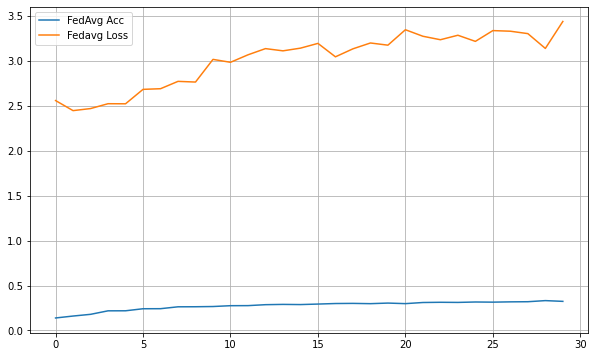

In [9]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

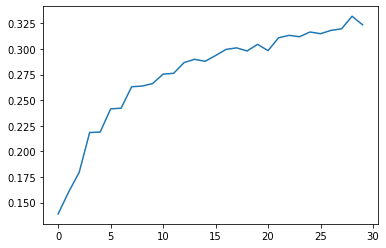

In [10]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [ ]:
print(average_acc_list,'\n') 
print(average_loss_list)